In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [89]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)
data = pd.read_csv("data_set.csv", low_memory = False)

In [90]:
data = data[['id','metroscubiertos','metrostotales','Distrito Federal','Apartamento','idzona','days_to_today','banos','antiguedad','habitaciones']]

In [91]:
train_df = train_df[['id','precio']]
train_df['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [92]:
features = pd.merge(train_df, data, on='id', how='inner')
features = features.fillna(0)
features['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [93]:
labels = features['precio']
features = features.drop(['id','precio'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
print("Train: ",len(x_train),"Test: ",len(x_test))

Train:  180000 Test:  60000


In [94]:
import catboost as cb
from catboost import CatBoostRegressor

    params = {'depth': [4, 7, 10],
              'learning_rate' : [0.03, 0.1, 0.15],
             'l2_leaf_reg': [1,4,9],
             'iterations': [300], }
    cb = CatBoostRegressor()
    cb_model = GridSearchCV(cb, params, scoring="neg_mean_absolute_error", cv = 3)
    cb_model.fit(x_train, y_train)

0:	learn: 2132555.2217721	total: 9.86ms	remaining: 2.95s
1:	learn: 2107430.1776755	total: 19ms	remaining: 2.82s
2:	learn: 2083691.7089050	total: 26.2ms	remaining: 2.6s
3:	learn: 2061329.0769627	total: 33ms	remaining: 2.44s
4:	learn: 2039358.1618741	total: 39.7ms	remaining: 2.34s
5:	learn: 2018683.2916703	total: 46.3ms	remaining: 2.27s
6:	learn: 1998430.5366388	total: 52.9ms	remaining: 2.21s
7:	learn: 1979332.0615418	total: 59.5ms	remaining: 2.17s
8:	learn: 1960706.9448736	total: 66.2ms	remaining: 2.14s
9:	learn: 1942828.7715938	total: 73ms	remaining: 2.12s
10:	learn: 1925329.2135459	total: 79.6ms	remaining: 2.09s
11:	learn: 1908316.4915743	total: 86.1ms	remaining: 2.07s
12:	learn: 1891873.3119303	total: 92.8ms	remaining: 2.05s
13:	learn: 1875635.2055631	total: 99.4ms	remaining: 2.03s
14:	learn: 1860534.1153939	total: 106ms	remaining: 2.01s
15:	learn: 1844724.3862946	total: 113ms	remaining: 2s
16:	learn: 1830623.1526533	total: 119ms	remaining: 1.99s
17:	learn: 1816967.7937437	total: 126

163:	learn: 1312878.9884925	total: 1.22s	remaining: 1.01s
164:	learn: 1311964.3572767	total: 1.23s	remaining: 1.01s
165:	learn: 1310871.7019675	total: 1.24s	remaining: 1s
166:	learn: 1309978.1510924	total: 1.25s	remaining: 997ms
167:	learn: 1308916.2854948	total: 1.26s	remaining: 989ms
168:	learn: 1308230.9440594	total: 1.26s	remaining: 981ms
169:	learn: 1307506.5361128	total: 1.27s	remaining: 973ms
170:	learn: 1306441.0126858	total: 1.28s	remaining: 965ms
171:	learn: 1305273.5633398	total: 1.29s	remaining: 957ms
172:	learn: 1304587.0675566	total: 1.29s	remaining: 949ms
173:	learn: 1303798.4638481	total: 1.3s	remaining: 941ms
174:	learn: 1303053.0868057	total: 1.31s	remaining: 933ms
175:	learn: 1302395.4322553	total: 1.31s	remaining: 925ms
176:	learn: 1301669.5626711	total: 1.32s	remaining: 917ms
177:	learn: 1300915.3707108	total: 1.33s	remaining: 909ms
178:	learn: 1300381.9342439	total: 1.33s	remaining: 901ms
179:	learn: 1299721.6429655	total: 1.34s	remaining: 893ms
180:	learn: 129913

28:	learn: 1685397.4280954	total: 213ms	remaining: 1.99s
29:	learn: 1675681.3190617	total: 224ms	remaining: 2.02s
30:	learn: 1666732.7438059	total: 234ms	remaining: 2.03s
31:	learn: 1657916.6002685	total: 241ms	remaining: 2.02s
32:	learn: 1648603.2055862	total: 251ms	remaining: 2.03s
33:	learn: 1640528.3073578	total: 258ms	remaining: 2.02s
34:	learn: 1632947.8773766	total: 266ms	remaining: 2.02s
35:	learn: 1625085.9332052	total: 273ms	remaining: 2s
36:	learn: 1616902.7227139	total: 281ms	remaining: 2s
37:	learn: 1609604.2440604	total: 288ms	remaining: 1.98s
38:	learn: 1602246.9799149	total: 295ms	remaining: 1.97s
39:	learn: 1595770.7614283	total: 303ms	remaining: 1.97s
40:	learn: 1588544.9409292	total: 310ms	remaining: 1.96s
41:	learn: 1582479.9275619	total: 317ms	remaining: 1.95s
42:	learn: 1576593.5346967	total: 324ms	remaining: 1.94s
43:	learn: 1570795.7377357	total: 332ms	remaining: 1.93s
44:	learn: 1565025.4292746	total: 339ms	remaining: 1.92s
45:	learn: 1558617.0613094	total: 346

188:	learn: 1289185.4911283	total: 1.43s	remaining: 837ms
189:	learn: 1288170.8066585	total: 1.43s	remaining: 831ms
190:	learn: 1287381.4829013	total: 1.44s	remaining: 825ms
191:	learn: 1286685.1659197	total: 1.45s	remaining: 817ms
192:	learn: 1286059.1295667	total: 1.46s	remaining: 809ms
193:	learn: 1285310.7534614	total: 1.47s	remaining: 801ms
194:	learn: 1284567.9239497	total: 1.47s	remaining: 793ms
195:	learn: 1284086.6023246	total: 1.48s	remaining: 784ms
196:	learn: 1283451.1422236	total: 1.49s	remaining: 777ms
197:	learn: 1282501.1763332	total: 1.49s	remaining: 769ms
198:	learn: 1282010.7566568	total: 1.5s	remaining: 761ms
199:	learn: 1281421.6631314	total: 1.5s	remaining: 753ms
200:	learn: 1280757.8606999	total: 1.51s	remaining: 745ms
201:	learn: 1280034.8954812	total: 1.52s	remaining: 737ms
202:	learn: 1279470.4880463	total: 1.52s	remaining: 729ms
203:	learn: 1278584.7942663	total: 1.53s	remaining: 721ms
204:	learn: 1278233.6381932	total: 1.54s	remaining: 713ms
205:	learn: 1277

52:	learn: 1517084.9509290	total: 420ms	remaining: 1.96s
53:	learn: 1512857.6925367	total: 430ms	remaining: 1.96s
54:	learn: 1507808.8870271	total: 437ms	remaining: 1.95s
55:	learn: 1503958.3988729	total: 447ms	remaining: 1.95s
56:	learn: 1500268.7106113	total: 453ms	remaining: 1.93s
57:	learn: 1496400.5313953	total: 460ms	remaining: 1.92s
58:	learn: 1491777.2855330	total: 467ms	remaining: 1.91s
59:	learn: 1487322.0916258	total: 474ms	remaining: 1.9s
60:	learn: 1483365.5982525	total: 481ms	remaining: 1.88s
61:	learn: 1480078.7993669	total: 488ms	remaining: 1.87s
62:	learn: 1475775.9690205	total: 495ms	remaining: 1.86s
63:	learn: 1472640.3911995	total: 501ms	remaining: 1.85s
64:	learn: 1469551.2201216	total: 508ms	remaining: 1.84s
65:	learn: 1465558.9598468	total: 515ms	remaining: 1.83s
66:	learn: 1462670.3908018	total: 522ms	remaining: 1.81s
67:	learn: 1459847.2873138	total: 528ms	remaining: 1.8s
68:	learn: 1456484.1753266	total: 535ms	remaining: 1.79s
69:	learn: 1452997.8425637	total:

207:	learn: 1270790.4613262	total: 1.64s	remaining: 727ms
208:	learn: 1270416.5218601	total: 1.66s	remaining: 721ms
209:	learn: 1269909.8519555	total: 1.66s	remaining: 713ms
210:	learn: 1269155.9820775	total: 1.67s	remaining: 705ms
211:	learn: 1268477.0725740	total: 1.68s	remaining: 697ms
212:	learn: 1268036.8309398	total: 1.69s	remaining: 689ms
213:	learn: 1267374.7241930	total: 1.69s	remaining: 681ms
214:	learn: 1266880.7463377	total: 1.7s	remaining: 672ms
215:	learn: 1266207.2902047	total: 1.71s	remaining: 666ms
216:	learn: 1265907.2779201	total: 1.72s	remaining: 659ms
217:	learn: 1265109.3145216	total: 1.73s	remaining: 653ms
218:	learn: 1264503.5854558	total: 1.74s	remaining: 644ms
219:	learn: 1263652.8216112	total: 1.75s	remaining: 637ms
220:	learn: 1262741.5001462	total: 1.76s	remaining: 629ms
221:	learn: 1262124.3961880	total: 1.76s	remaining: 620ms
222:	learn: 1261238.7232285	total: 1.77s	remaining: 612ms
223:	learn: 1260766.3155973	total: 1.78s	remaining: 604ms
224:	learn: 126

54:	learn: 1292958.6860914	total: 644ms	remaining: 2.87s
55:	learn: 1290770.2070758	total: 656ms	remaining: 2.86s
56:	learn: 1288206.8383179	total: 684ms	remaining: 2.92s
57:	learn: 1285758.4824241	total: 704ms	remaining: 2.94s
58:	learn: 1283277.9729504	total: 723ms	remaining: 2.95s
59:	learn: 1281763.6320580	total: 739ms	remaining: 2.96s
60:	learn: 1279151.0075699	total: 751ms	remaining: 2.94s
61:	learn: 1277056.6385325	total: 759ms	remaining: 2.91s
62:	learn: 1275479.0974045	total: 769ms	remaining: 2.89s
63:	learn: 1273881.5887121	total: 779ms	remaining: 2.87s
64:	learn: 1271303.2824657	total: 788ms	remaining: 2.85s
65:	learn: 1268696.0482913	total: 799ms	remaining: 2.83s
66:	learn: 1267398.2330589	total: 806ms	remaining: 2.8s
67:	learn: 1266044.5997686	total: 813ms	remaining: 2.77s
68:	learn: 1264235.3518619	total: 819ms	remaining: 2.74s
69:	learn: 1262480.6332118	total: 826ms	remaining: 2.71s
70:	learn: 1260707.0004222	total: 833ms	remaining: 2.69s
71:	learn: 1258628.1834977	total

209:	learn: 1165024.4154567	total: 2.07s	remaining: 887ms
210:	learn: 1164754.6776457	total: 2.08s	remaining: 878ms
211:	learn: 1164345.8209818	total: 2.09s	remaining: 869ms
212:	learn: 1164158.6477856	total: 2.1s	remaining: 858ms
213:	learn: 1163770.9682724	total: 2.11s	remaining: 848ms
214:	learn: 1163529.4457955	total: 2.12s	remaining: 837ms
215:	learn: 1163259.3145385	total: 2.12s	remaining: 826ms
216:	learn: 1162922.8506624	total: 2.13s	remaining: 816ms
217:	learn: 1162578.1496923	total: 2.14s	remaining: 805ms
218:	learn: 1161853.0984845	total: 2.15s	remaining: 795ms
219:	learn: 1161652.9913233	total: 2.16s	remaining: 784ms
220:	learn: 1161065.3259376	total: 2.17s	remaining: 774ms
221:	learn: 1160583.4549263	total: 2.17s	remaining: 764ms
222:	learn: 1160250.8833507	total: 2.18s	remaining: 753ms
223:	learn: 1159854.6589492	total: 2.19s	remaining: 743ms
224:	learn: 1159247.4760619	total: 2.2s	remaining: 733ms
225:	learn: 1158590.1342725	total: 2.21s	remaining: 722ms
226:	learn: 1158

64:	learn: 1271804.0973275	total: 632ms	remaining: 2.28s
65:	learn: 1269417.2086228	total: 646ms	remaining: 2.29s
66:	learn: 1268492.9193109	total: 658ms	remaining: 2.29s
67:	learn: 1267636.6772316	total: 667ms	remaining: 2.28s
68:	learn: 1265390.4425249	total: 677ms	remaining: 2.27s
69:	learn: 1262737.7367721	total: 685ms	remaining: 2.25s
70:	learn: 1261354.9159119	total: 694ms	remaining: 2.24s
71:	learn: 1259085.3828417	total: 702ms	remaining: 2.22s
72:	learn: 1258293.2460531	total: 709ms	remaining: 2.21s
73:	learn: 1256311.6128881	total: 717ms	remaining: 2.19s
74:	learn: 1254414.4133427	total: 726ms	remaining: 2.18s
75:	learn: 1253754.2944535	total: 734ms	remaining: 2.16s
76:	learn: 1252367.6874753	total: 742ms	remaining: 2.15s
77:	learn: 1251342.1331869	total: 749ms	remaining: 2.13s
78:	learn: 1250517.6158246	total: 757ms	remaining: 2.12s
79:	learn: 1248940.7556186	total: 764ms	remaining: 2.1s
80:	learn: 1247714.7961397	total: 773ms	remaining: 2.09s
81:	learn: 1246988.9515068	total

227:	learn: 1156822.6750770	total: 2.05s	remaining: 646ms
228:	learn: 1156615.0046032	total: 2.06s	remaining: 638ms
229:	learn: 1156363.2031790	total: 2.07s	remaining: 630ms
230:	learn: 1156110.2083208	total: 2.08s	remaining: 622ms
231:	learn: 1155900.5921303	total: 2.1s	remaining: 614ms
232:	learn: 1155544.1116939	total: 2.1s	remaining: 606ms
233:	learn: 1155148.3549831	total: 2.12s	remaining: 597ms
234:	learn: 1154917.5991073	total: 2.13s	remaining: 588ms
235:	learn: 1154355.6935304	total: 2.14s	remaining: 580ms
236:	learn: 1153739.1146322	total: 2.16s	remaining: 574ms
237:	learn: 1153259.1210852	total: 2.17s	remaining: 566ms
238:	learn: 1152973.3302282	total: 2.19s	remaining: 558ms
239:	learn: 1152418.3578716	total: 2.2s	remaining: 550ms
240:	learn: 1152061.6384883	total: 2.21s	remaining: 541ms
241:	learn: 1151621.5514932	total: 2.22s	remaining: 532ms
242:	learn: 1151190.9867002	total: 2.23s	remaining: 523ms
243:	learn: 1150984.1416659	total: 2.24s	remaining: 513ms
244:	learn: 11506

86:	learn: 1233804.4755011	total: 844ms	remaining: 2.07s
87:	learn: 1232698.9894426	total: 856ms	remaining: 2.06s
88:	learn: 1231808.8837397	total: 865ms	remaining: 2.05s
89:	learn: 1230533.0063633	total: 876ms	remaining: 2.04s
90:	learn: 1229510.1176047	total: 885ms	remaining: 2.03s
91:	learn: 1229096.7742875	total: 892ms	remaining: 2.02s
92:	learn: 1228029.0060149	total: 900ms	remaining: 2s
93:	learn: 1227204.8760373	total: 907ms	remaining: 1.99s
94:	learn: 1226571.7142381	total: 915ms	remaining: 1.97s
95:	learn: 1225877.4255203	total: 922ms	remaining: 1.96s
96:	learn: 1223354.8272262	total: 930ms	remaining: 1.95s
97:	learn: 1222362.8857249	total: 937ms	remaining: 1.93s
98:	learn: 1221474.0122990	total: 945ms	remaining: 1.92s
99:	learn: 1220398.6369929	total: 952ms	remaining: 1.9s
100:	learn: 1219277.4772077	total: 959ms	remaining: 1.89s
101:	learn: 1218671.6396614	total: 967ms	remaining: 1.88s
102:	learn: 1218100.6983400	total: 974ms	remaining: 1.86s
103:	learn: 1217441.7565487	tota

248:	learn: 1142697.5247725	total: 2.47s	remaining: 506ms
249:	learn: 1142496.8295514	total: 2.48s	remaining: 496ms
250:	learn: 1142290.9510692	total: 2.49s	remaining: 486ms
251:	learn: 1141894.1737326	total: 2.5s	remaining: 477ms
252:	learn: 1141645.0926288	total: 2.51s	remaining: 467ms
253:	learn: 1141377.3930056	total: 2.52s	remaining: 457ms
254:	learn: 1141087.9537785	total: 2.53s	remaining: 447ms
255:	learn: 1140898.3620272	total: 2.55s	remaining: 438ms
256:	learn: 1140534.1040369	total: 2.57s	remaining: 430ms
257:	learn: 1140111.2814977	total: 2.58s	remaining: 421ms
258:	learn: 1139752.0651616	total: 2.6s	remaining: 412ms
259:	learn: 1139395.9029049	total: 2.62s	remaining: 402ms
260:	learn: 1138958.9060636	total: 2.63s	remaining: 393ms
261:	learn: 1138710.8195818	total: 2.65s	remaining: 384ms
262:	learn: 1138462.0131367	total: 2.67s	remaining: 375ms
263:	learn: 1138158.8973541	total: 2.68s	remaining: 366ms
264:	learn: 1137947.7424782	total: 2.69s	remaining: 356ms
265:	learn: 1137

100:	learn: 1189803.4123168	total: 832ms	remaining: 1.64s
101:	learn: 1189150.3769129	total: 840ms	remaining: 1.63s
102:	learn: 1187729.9482833	total: 851ms	remaining: 1.63s
103:	learn: 1186127.7528493	total: 859ms	remaining: 1.62s
104:	learn: 1185177.0371484	total: 868ms	remaining: 1.61s
105:	learn: 1184187.2429145	total: 875ms	remaining: 1.6s
106:	learn: 1183644.2304668	total: 883ms	remaining: 1.59s
107:	learn: 1182583.8282369	total: 892ms	remaining: 1.58s
108:	learn: 1181885.2588321	total: 899ms	remaining: 1.58s
109:	learn: 1181281.9846768	total: 907ms	remaining: 1.57s
110:	learn: 1180684.9897209	total: 914ms	remaining: 1.56s
111:	learn: 1180021.0563702	total: 922ms	remaining: 1.55s
112:	learn: 1179098.9873407	total: 930ms	remaining: 1.54s
113:	learn: 1178141.8576760	total: 938ms	remaining: 1.53s
114:	learn: 1177380.4132499	total: 946ms	remaining: 1.52s
115:	learn: 1177073.4815071	total: 953ms	remaining: 1.51s
116:	learn: 1176670.5113394	total: 960ms	remaining: 1.5s
117:	learn: 1175

249:	learn: 1121121.9567363	total: 2.05s	remaining: 409ms
250:	learn: 1120722.4206773	total: 2.06s	remaining: 402ms
251:	learn: 1120337.9585882	total: 2.07s	remaining: 394ms
252:	learn: 1120038.7390108	total: 2.08s	remaining: 386ms
253:	learn: 1119806.7791646	total: 2.09s	remaining: 378ms
254:	learn: 1119628.3864694	total: 2.1s	remaining: 370ms
255:	learn: 1119270.3290976	total: 2.1s	remaining: 362ms
256:	learn: 1119098.1134059	total: 2.11s	remaining: 354ms
257:	learn: 1118899.5399221	total: 2.12s	remaining: 346ms
258:	learn: 1118694.6424593	total: 2.13s	remaining: 337ms
259:	learn: 1118490.3137953	total: 2.14s	remaining: 329ms
260:	learn: 1118266.5455689	total: 2.15s	remaining: 321ms
261:	learn: 1118010.8160294	total: 2.15s	remaining: 312ms
262:	learn: 1117746.7574980	total: 2.16s	remaining: 304ms
263:	learn: 1117490.9906075	total: 2.17s	remaining: 296ms
264:	learn: 1117361.1992478	total: 2.18s	remaining: 288ms
265:	learn: 1117062.4261209	total: 2.18s	remaining: 279ms
266:	learn: 1116

95:	learn: 1196671.5641282	total: 813ms	remaining: 1.73s
96:	learn: 1196200.9292516	total: 824ms	remaining: 1.72s
97:	learn: 1195634.9354271	total: 835ms	remaining: 1.72s
98:	learn: 1194951.4746390	total: 843ms	remaining: 1.71s
99:	learn: 1194356.4598162	total: 852ms	remaining: 1.7s
100:	learn: 1192591.3748715	total: 862ms	remaining: 1.7s
101:	learn: 1191741.1570366	total: 870ms	remaining: 1.69s
102:	learn: 1191102.7022895	total: 877ms	remaining: 1.68s
103:	learn: 1190329.2052462	total: 885ms	remaining: 1.67s
104:	learn: 1189965.8283613	total: 893ms	remaining: 1.66s
105:	learn: 1188277.7389541	total: 902ms	remaining: 1.65s
106:	learn: 1186542.9518390	total: 910ms	remaining: 1.64s
107:	learn: 1186025.3952007	total: 918ms	remaining: 1.63s
108:	learn: 1185058.6705896	total: 927ms	remaining: 1.62s
109:	learn: 1184274.3337064	total: 936ms	remaining: 1.61s
110:	learn: 1183686.3644079	total: 943ms	remaining: 1.6s
111:	learn: 1182423.6377897	total: 952ms	remaining: 1.6s
112:	learn: 1181490.544

242:	learn: 1121436.1712424	total: 2.46s	remaining: 578ms
243:	learn: 1121179.9424288	total: 2.48s	remaining: 568ms
244:	learn: 1120767.2955135	total: 2.48s	remaining: 558ms
245:	learn: 1120458.6332433	total: 2.49s	remaining: 547ms
246:	learn: 1120076.4816797	total: 2.5s	remaining: 537ms
247:	learn: 1119796.6763224	total: 2.51s	remaining: 526ms
248:	learn: 1119524.7405983	total: 2.52s	remaining: 516ms
249:	learn: 1119331.9752677	total: 2.53s	remaining: 505ms
250:	learn: 1118983.2876487	total: 2.53s	remaining: 495ms
251:	learn: 1118713.6404575	total: 2.54s	remaining: 484ms
252:	learn: 1118584.7206151	total: 2.55s	remaining: 474ms
253:	learn: 1118490.9447393	total: 2.56s	remaining: 463ms
254:	learn: 1118321.6586075	total: 2.56s	remaining: 453ms
255:	learn: 1118081.5950762	total: 2.57s	remaining: 442ms
256:	learn: 1117817.2986654	total: 2.58s	remaining: 432ms
257:	learn: 1117504.4519126	total: 2.59s	remaining: 422ms
258:	learn: 1117354.2185667	total: 2.6s	remaining: 411ms
259:	learn: 1117

90:	learn: 1193762.0808757	total: 823ms	remaining: 1.89s
91:	learn: 1192322.0464796	total: 835ms	remaining: 1.89s
92:	learn: 1191652.4645048	total: 847ms	remaining: 1.88s
93:	learn: 1191045.9353322	total: 858ms	remaining: 1.88s
94:	learn: 1190449.0808885	total: 868ms	remaining: 1.87s
95:	learn: 1190041.2211081	total: 876ms	remaining: 1.86s
96:	learn: 1189194.9665002	total: 884ms	remaining: 1.85s
97:	learn: 1188511.7500477	total: 891ms	remaining: 1.84s
98:	learn: 1187050.7913549	total: 901ms	remaining: 1.83s
99:	learn: 1186080.4522154	total: 909ms	remaining: 1.82s
100:	learn: 1183516.3327221	total: 917ms	remaining: 1.81s
101:	learn: 1182958.3269781	total: 925ms	remaining: 1.8s
102:	learn: 1182432.1289308	total: 933ms	remaining: 1.78s
103:	learn: 1181824.6549673	total: 940ms	remaining: 1.77s
104:	learn: 1181170.0953744	total: 948ms	remaining: 1.76s
105:	learn: 1180517.8188389	total: 956ms	remaining: 1.75s
106:	learn: 1178621.1213094	total: 966ms	remaining: 1.74s
107:	learn: 1177925.89747

237:	learn: 1116782.1663338	total: 2.26s	remaining: 589ms
238:	learn: 1116544.8346488	total: 2.28s	remaining: 581ms
239:	learn: 1116271.9965992	total: 2.29s	remaining: 571ms
240:	learn: 1115856.5864709	total: 2.29s	remaining: 562ms
241:	learn: 1115539.0421658	total: 2.3s	remaining: 552ms
242:	learn: 1115359.9162171	total: 2.31s	remaining: 542ms
243:	learn: 1115226.0467079	total: 2.32s	remaining: 532ms
244:	learn: 1115035.9169982	total: 2.33s	remaining: 523ms
245:	learn: 1114867.5399970	total: 2.33s	remaining: 513ms
246:	learn: 1114571.9846966	total: 2.34s	remaining: 503ms
247:	learn: 1113988.1973829	total: 2.35s	remaining: 493ms
248:	learn: 1113465.0320800	total: 2.36s	remaining: 483ms
249:	learn: 1113270.9566531	total: 2.37s	remaining: 474ms
250:	learn: 1113167.4511311	total: 2.38s	remaining: 464ms
251:	learn: 1112862.6891331	total: 2.38s	remaining: 454ms
252:	learn: 1112310.5693555	total: 2.39s	remaining: 444ms
253:	learn: 1112131.1024330	total: 2.4s	remaining: 434ms
254:	learn: 1111

85:	learn: 1422022.6010743	total: 855ms	remaining: 2.13s
86:	learn: 1419412.8542550	total: 864ms	remaining: 2.11s
87:	learn: 1416886.4605579	total: 875ms	remaining: 2.11s
88:	learn: 1414672.6239958	total: 884ms	remaining: 2.1s
89:	learn: 1412853.3021835	total: 892ms	remaining: 2.08s
90:	learn: 1410582.1958643	total: 901ms	remaining: 2.07s
91:	learn: 1408245.6972093	total: 909ms	remaining: 2.05s
92:	learn: 1406483.6941050	total: 916ms	remaining: 2.04s
93:	learn: 1404567.1701695	total: 924ms	remaining: 2.02s
94:	learn: 1402968.2913123	total: 931ms	remaining: 2.01s
95:	learn: 1400697.3941203	total: 939ms	remaining: 1.99s
96:	learn: 1398753.2076611	total: 946ms	remaining: 1.98s
97:	learn: 1396873.4975504	total: 954ms	remaining: 1.97s
98:	learn: 1394765.3761834	total: 962ms	remaining: 1.95s
99:	learn: 1392698.8978016	total: 969ms	remaining: 1.94s
100:	learn: 1390734.6050115	total: 978ms	remaining: 1.93s
101:	learn: 1389104.1494184	total: 986ms	remaining: 1.91s
102:	learn: 1386855.2660716	to

229:	learn: 1267728.8285501	total: 2.07s	remaining: 630ms
230:	learn: 1267275.3485310	total: 2.08s	remaining: 622ms
231:	learn: 1266841.9875599	total: 2.09s	remaining: 614ms
232:	learn: 1266433.2847265	total: 2.1s	remaining: 605ms
233:	learn: 1265816.9069992	total: 2.11s	remaining: 596ms
234:	learn: 1265494.4301715	total: 2.12s	remaining: 587ms
235:	learn: 1264956.6025264	total: 2.13s	remaining: 578ms
236:	learn: 1264568.8180828	total: 2.14s	remaining: 568ms
237:	learn: 1264245.0115810	total: 2.15s	remaining: 559ms
238:	learn: 1263678.5281017	total: 2.16s	remaining: 550ms
239:	learn: 1263133.8974055	total: 2.16s	remaining: 541ms
240:	learn: 1262733.1515391	total: 2.17s	remaining: 532ms
241:	learn: 1262292.5236556	total: 2.18s	remaining: 523ms
242:	learn: 1261905.3683183	total: 2.19s	remaining: 515ms
243:	learn: 1261296.8274977	total: 2.2s	remaining: 505ms
244:	learn: 1260867.9192824	total: 2.21s	remaining: 496ms
245:	learn: 1260320.2671154	total: 2.22s	remaining: 488ms
246:	learn: 1260

95:	learn: 1397302.8245995	total: 1.03s	remaining: 2.19s
96:	learn: 1395083.6465316	total: 1.04s	remaining: 2.18s
97:	learn: 1393131.3042036	total: 1.05s	remaining: 2.17s
98:	learn: 1391602.0031076	total: 1.06s	remaining: 2.16s
99:	learn: 1389556.7774610	total: 1.07s	remaining: 2.15s
100:	learn: 1387601.8342575	total: 1.08s	remaining: 2.13s
101:	learn: 1385761.5090392	total: 1.09s	remaining: 2.12s
102:	learn: 1384377.7000709	total: 1.1s	remaining: 2.1s
103:	learn: 1382809.9397155	total: 1.1s	remaining: 2.08s
104:	learn: 1381546.5303823	total: 1.11s	remaining: 2.07s
105:	learn: 1379984.8165245	total: 1.12s	remaining: 2.05s
106:	learn: 1378343.1423796	total: 1.13s	remaining: 2.04s
107:	learn: 1377010.1776781	total: 1.14s	remaining: 2.02s
108:	learn: 1374848.1560217	total: 1.14s	remaining: 2.01s
109:	learn: 1373125.2980986	total: 1.15s	remaining: 1.99s
110:	learn: 1371503.7984929	total: 1.16s	remaining: 1.98s
111:	learn: 1370120.6553041	total: 1.17s	remaining: 1.96s
112:	learn: 1368994.09

247:	learn: 1257634.1315821	total: 2.26s	remaining: 474ms
248:	learn: 1257418.0472998	total: 2.27s	remaining: 465ms
249:	learn: 1256925.9056281	total: 2.28s	remaining: 456ms
250:	learn: 1256304.9109628	total: 2.29s	remaining: 447ms
251:	learn: 1255895.9305687	total: 2.3s	remaining: 438ms
252:	learn: 1255356.5274323	total: 2.31s	remaining: 429ms
253:	learn: 1255180.0918737	total: 2.31s	remaining: 419ms
254:	learn: 1254621.7319143	total: 2.32s	remaining: 410ms
255:	learn: 1254311.0514105	total: 2.33s	remaining: 400ms
256:	learn: 1253825.7821906	total: 2.34s	remaining: 391ms
257:	learn: 1253447.1540215	total: 2.35s	remaining: 382ms
258:	learn: 1253043.8263549	total: 2.35s	remaining: 373ms
259:	learn: 1252532.8232232	total: 2.36s	remaining: 363ms
260:	learn: 1252198.8163748	total: 2.37s	remaining: 354ms
261:	learn: 1251779.2995796	total: 2.38s	remaining: 345ms
262:	learn: 1251573.4517658	total: 2.38s	remaining: 336ms
263:	learn: 1250984.1916846	total: 2.39s	remaining: 326ms
264:	learn: 125

96:	learn: 1390337.4614447	total: 820ms	remaining: 1.72s
97:	learn: 1388545.8458659	total: 837ms	remaining: 1.72s
98:	learn: 1386574.0260144	total: 851ms	remaining: 1.73s
99:	learn: 1384686.8321199	total: 861ms	remaining: 1.72s
100:	learn: 1382456.9140147	total: 868ms	remaining: 1.71s
101:	learn: 1380582.4225057	total: 877ms	remaining: 1.7s
102:	learn: 1379219.3085598	total: 885ms	remaining: 1.69s
103:	learn: 1377462.3145649	total: 893ms	remaining: 1.68s
104:	learn: 1376263.8675533	total: 901ms	remaining: 1.67s
105:	learn: 1374105.7748703	total: 908ms	remaining: 1.66s
106:	learn: 1372103.6884969	total: 920ms	remaining: 1.66s
107:	learn: 1370205.7350221	total: 932ms	remaining: 1.66s
108:	learn: 1368502.9118818	total: 944ms	remaining: 1.65s
109:	learn: 1366924.2694417	total: 953ms	remaining: 1.65s
110:	learn: 1365285.4628307	total: 961ms	remaining: 1.64s
111:	learn: 1363890.4206753	total: 968ms	remaining: 1.63s
112:	learn: 1362797.8584719	total: 977ms	remaining: 1.62s
113:	learn: 1361180

244:	learn: 1252358.1734733	total: 2.03s	remaining: 455ms
245:	learn: 1252107.4603966	total: 2.04s	remaining: 448ms
246:	learn: 1251835.2302072	total: 2.05s	remaining: 440ms
247:	learn: 1251457.3097731	total: 2.06s	remaining: 432ms
248:	learn: 1251278.8706050	total: 2.07s	remaining: 424ms
249:	learn: 1250821.6921120	total: 2.08s	remaining: 415ms
250:	learn: 1250225.3980446	total: 2.08s	remaining: 407ms
251:	learn: 1249752.6481086	total: 2.09s	remaining: 399ms
252:	learn: 1249236.4120749	total: 2.1s	remaining: 390ms
253:	learn: 1248819.3794111	total: 2.11s	remaining: 382ms
254:	learn: 1248511.0909814	total: 2.12s	remaining: 374ms
255:	learn: 1248205.6836736	total: 2.12s	remaining: 365ms
256:	learn: 1247794.4565611	total: 2.13s	remaining: 357ms
257:	learn: 1247202.9513329	total: 2.14s	remaining: 348ms
258:	learn: 1246740.6825047	total: 2.15s	remaining: 340ms
259:	learn: 1246238.7098938	total: 2.15s	remaining: 332ms
260:	learn: 1245888.8109740	total: 2.16s	remaining: 323ms
261:	learn: 124

106:	learn: 1226754.6195959	total: 840ms	remaining: 1.51s
107:	learn: 1226205.4457743	total: 852ms	remaining: 1.51s
108:	learn: 1224224.8764541	total: 860ms	remaining: 1.51s
109:	learn: 1223102.4744519	total: 868ms	remaining: 1.5s
110:	learn: 1222389.9628756	total: 876ms	remaining: 1.49s
111:	learn: 1221705.8724890	total: 883ms	remaining: 1.48s
112:	learn: 1221351.5286180	total: 891ms	remaining: 1.47s
113:	learn: 1219963.2816085	total: 898ms	remaining: 1.47s
114:	learn: 1219194.3430082	total: 906ms	remaining: 1.46s
115:	learn: 1218740.6229240	total: 913ms	remaining: 1.45s
116:	learn: 1217658.7486046	total: 920ms	remaining: 1.44s
117:	learn: 1216885.7811457	total: 927ms	remaining: 1.43s
118:	learn: 1216297.8666397	total: 934ms	remaining: 1.42s
119:	learn: 1214781.0784262	total: 942ms	remaining: 1.41s
120:	learn: 1214170.0493004	total: 950ms	remaining: 1.41s
121:	learn: 1212806.8716147	total: 957ms	remaining: 1.4s
122:	learn: 1211768.9405143	total: 965ms	remaining: 1.39s
123:	learn: 1210

258:	learn: 1150854.3110394	total: 2.07s	remaining: 327ms
259:	learn: 1150726.1683921	total: 2.08s	remaining: 319ms
260:	learn: 1150429.9046986	total: 2.09s	remaining: 312ms
261:	learn: 1149957.1485426	total: 2.1s	remaining: 304ms
262:	learn: 1149538.2523526	total: 2.11s	remaining: 296ms
263:	learn: 1149040.7815537	total: 2.11s	remaining: 288ms
264:	learn: 1148600.3308605	total: 2.12s	remaining: 280ms
265:	learn: 1148222.4562879	total: 2.13s	remaining: 272ms
266:	learn: 1147944.1877416	total: 2.14s	remaining: 264ms
267:	learn: 1147666.2163286	total: 2.15s	remaining: 256ms
268:	learn: 1147248.5809277	total: 2.15s	remaining: 248ms
269:	learn: 1146935.3801854	total: 2.16s	remaining: 240ms
270:	learn: 1146644.4750105	total: 2.17s	remaining: 232ms
271:	learn: 1146376.3896595	total: 2.18s	remaining: 224ms
272:	learn: 1146111.9010083	total: 2.19s	remaining: 216ms
273:	learn: 1145618.8090353	total: 2.19s	remaining: 208ms
274:	learn: 1145457.8250380	total: 2.2s	remaining: 200ms
275:	learn: 1145

104:	learn: 1222881.4385385	total: 833ms	remaining: 1.55s
105:	learn: 1221737.8088993	total: 843ms	remaining: 1.54s
106:	learn: 1221078.1188045	total: 853ms	remaining: 1.54s
107:	learn: 1220385.8292388	total: 861ms	remaining: 1.53s
108:	learn: 1219810.1324895	total: 869ms	remaining: 1.52s
109:	learn: 1218858.5062893	total: 877ms	remaining: 1.51s
110:	learn: 1217915.5294687	total: 884ms	remaining: 1.5s
111:	learn: 1217458.8672215	total: 892ms	remaining: 1.5s
112:	learn: 1217048.5563358	total: 899ms	remaining: 1.49s
113:	learn: 1216556.3911103	total: 907ms	remaining: 1.48s
114:	learn: 1215642.7851774	total: 915ms	remaining: 1.47s
115:	learn: 1215226.7912110	total: 923ms	remaining: 1.46s
116:	learn: 1214058.2234243	total: 931ms	remaining: 1.46s
117:	learn: 1213436.4835742	total: 938ms	remaining: 1.45s
118:	learn: 1212752.2136807	total: 946ms	remaining: 1.44s
119:	learn: 1211837.4609786	total: 953ms	remaining: 1.43s
120:	learn: 1211134.8499298	total: 961ms	remaining: 1.42s
121:	learn: 1210

255:	learn: 1147299.2388398	total: 2.06s	remaining: 354ms
256:	learn: 1146951.0310135	total: 2.07s	remaining: 347ms
257:	learn: 1146656.8524467	total: 2.08s	remaining: 339ms
258:	learn: 1146190.1683092	total: 2.09s	remaining: 331ms
259:	learn: 1145747.7151988	total: 2.1s	remaining: 323ms
260:	learn: 1144942.3025626	total: 2.11s	remaining: 315ms
261:	learn: 1144815.9951899	total: 2.11s	remaining: 307ms
262:	learn: 1144621.0434019	total: 2.12s	remaining: 298ms
263:	learn: 1144208.5671339	total: 2.13s	remaining: 290ms
264:	learn: 1143991.7055293	total: 2.14s	remaining: 282ms
265:	learn: 1143805.3492803	total: 2.14s	remaining: 274ms
266:	learn: 1143564.0468230	total: 2.15s	remaining: 266ms
267:	learn: 1143330.1148522	total: 2.16s	remaining: 258ms
268:	learn: 1143055.8286513	total: 2.17s	remaining: 250ms
269:	learn: 1142802.9260320	total: 2.17s	remaining: 242ms
270:	learn: 1142433.7984142	total: 2.18s	remaining: 234ms
271:	learn: 1142174.1811226	total: 2.19s	remaining: 225ms
272:	learn: 114

101:	learn: 1218313.3528638	total: 812ms	remaining: 1.58s
102:	learn: 1217669.4871949	total: 823ms	remaining: 1.57s
103:	learn: 1216937.7032872	total: 833ms	remaining: 1.57s
104:	learn: 1215959.9574586	total: 841ms	remaining: 1.56s
105:	learn: 1214907.4246579	total: 850ms	remaining: 1.55s
106:	learn: 1214457.0449082	total: 858ms	remaining: 1.55s
107:	learn: 1213877.9988235	total: 865ms	remaining: 1.54s
108:	learn: 1213068.8806507	total: 873ms	remaining: 1.53s
109:	learn: 1212434.9693814	total: 881ms	remaining: 1.52s
110:	learn: 1211746.9181227	total: 889ms	remaining: 1.51s
111:	learn: 1211349.3804257	total: 896ms	remaining: 1.5s
112:	learn: 1210900.5280125	total: 903ms	remaining: 1.5s
113:	learn: 1210003.6050589	total: 912ms	remaining: 1.49s
114:	learn: 1208858.7825278	total: 920ms	remaining: 1.48s
115:	learn: 1208384.4862085	total: 927ms	remaining: 1.47s
116:	learn: 1207886.0126825	total: 934ms	remaining: 1.46s
117:	learn: 1206959.8368743	total: 942ms	remaining: 1.45s
118:	learn: 1206

264:	learn: 1139191.3544289	total: 2.24s	remaining: 295ms
265:	learn: 1138910.6198920	total: 2.25s	remaining: 287ms
266:	learn: 1138753.9433951	total: 2.26s	remaining: 279ms
267:	learn: 1138350.2236504	total: 2.27s	remaining: 271ms
268:	learn: 1138016.6377247	total: 2.27s	remaining: 262ms
269:	learn: 1137555.4061718	total: 2.28s	remaining: 254ms
270:	learn: 1137304.7965083	total: 2.29s	remaining: 245ms
271:	learn: 1136976.0211771	total: 2.3s	remaining: 236ms
272:	learn: 1136787.2894413	total: 2.3s	remaining: 228ms
273:	learn: 1136487.3427665	total: 2.31s	remaining: 219ms
274:	learn: 1136238.1895648	total: 2.32s	remaining: 211ms
275:	learn: 1135811.1242704	total: 2.33s	remaining: 202ms
276:	learn: 1135590.0767596	total: 2.33s	remaining: 194ms
277:	learn: 1135120.9399259	total: 2.34s	remaining: 185ms
278:	learn: 1134857.8110366	total: 2.35s	remaining: 177ms
279:	learn: 1134749.8498806	total: 2.36s	remaining: 168ms
280:	learn: 1134553.8144392	total: 2.37s	remaining: 160ms
281:	learn: 1134

129:	learn: 1167699.7325002	total: 1.02s	remaining: 1.33s
130:	learn: 1167227.5535479	total: 1.03s	remaining: 1.33s
131:	learn: 1166553.5559613	total: 1.04s	remaining: 1.32s
132:	learn: 1166083.9942645	total: 1.05s	remaining: 1.32s
133:	learn: 1165636.1195912	total: 1.06s	remaining: 1.31s
134:	learn: 1165075.8146146	total: 1.07s	remaining: 1.31s
135:	learn: 1164571.9689882	total: 1.08s	remaining: 1.3s
136:	learn: 1163591.8190948	total: 1.08s	remaining: 1.29s
137:	learn: 1163302.8105111	total: 1.09s	remaining: 1.28s
138:	learn: 1162518.2419666	total: 1.1s	remaining: 1.27s
139:	learn: 1162205.2633878	total: 1.11s	remaining: 1.26s
140:	learn: 1161777.9960141	total: 1.11s	remaining: 1.26s
141:	learn: 1161329.1093737	total: 1.12s	remaining: 1.25s
142:	learn: 1160209.4162894	total: 1.13s	remaining: 1.24s
143:	learn: 1159670.7701372	total: 1.14s	remaining: 1.23s
144:	learn: 1158648.9467909	total: 1.14s	remaining: 1.22s
145:	learn: 1158102.1455937	total: 1.15s	remaining: 1.21s
146:	learn: 1157

277:	learn: 1115139.6145526	total: 2.25s	remaining: 178ms
278:	learn: 1114876.3525229	total: 2.26s	remaining: 170ms
279:	learn: 1114605.5921322	total: 2.27s	remaining: 162ms
280:	learn: 1114462.1363523	total: 2.28s	remaining: 154ms
281:	learn: 1114246.6586473	total: 2.29s	remaining: 146ms
282:	learn: 1114080.9748175	total: 2.29s	remaining: 138ms
283:	learn: 1113953.4441610	total: 2.3s	remaining: 130ms
284:	learn: 1113847.7507148	total: 2.31s	remaining: 122ms
285:	learn: 1113692.7758406	total: 2.32s	remaining: 113ms
286:	learn: 1113333.5376180	total: 2.32s	remaining: 105ms
287:	learn: 1113245.2741991	total: 2.33s	remaining: 97.1ms
288:	learn: 1112991.3723283	total: 2.34s	remaining: 89ms
289:	learn: 1112704.5656646	total: 2.35s	remaining: 80.9ms
290:	learn: 1112550.0029622	total: 2.35s	remaining: 72.8ms
291:	learn: 1112372.0228732	total: 2.36s	remaining: 64.7ms
292:	learn: 1112246.8060235	total: 2.37s	remaining: 56.6ms
293:	learn: 1112151.1474666	total: 2.38s	remaining: 48.5ms
294:	learn

128:	learn: 1168823.6033885	total: 1.01s	remaining: 1.34s
129:	learn: 1168385.2160519	total: 1.02s	remaining: 1.34s
130:	learn: 1167727.0534596	total: 1.03s	remaining: 1.33s
131:	learn: 1167452.7124657	total: 1.04s	remaining: 1.33s
132:	learn: 1167003.2035600	total: 1.05s	remaining: 1.32s
133:	learn: 1166446.1966568	total: 1.06s	remaining: 1.32s
134:	learn: 1165852.2768974	total: 1.07s	remaining: 1.31s
135:	learn: 1165471.8285647	total: 1.08s	remaining: 1.3s
136:	learn: 1164815.0434630	total: 1.09s	remaining: 1.29s
137:	learn: 1163367.4198256	total: 1.09s	remaining: 1.28s
138:	learn: 1162874.2625655	total: 1.1s	remaining: 1.28s
139:	learn: 1162536.5757601	total: 1.11s	remaining: 1.27s
140:	learn: 1162070.0196148	total: 1.12s	remaining: 1.26s
141:	learn: 1161756.2421818	total: 1.13s	remaining: 1.25s
142:	learn: 1161396.2183977	total: 1.13s	remaining: 1.24s
143:	learn: 1159939.2732485	total: 1.14s	remaining: 1.23s
144:	learn: 1159482.4106141	total: 1.15s	remaining: 1.23s
145:	learn: 1159

281:	learn: 1112950.8773375	total: 2.25s	remaining: 144ms
282:	learn: 1112815.4826859	total: 2.26s	remaining: 136ms
283:	learn: 1112545.4308131	total: 2.27s	remaining: 128ms
284:	learn: 1112413.7636889	total: 2.28s	remaining: 120ms
285:	learn: 1112266.1896019	total: 2.29s	remaining: 112ms
286:	learn: 1112166.5061136	total: 2.29s	remaining: 104ms
287:	learn: 1112003.2055252	total: 2.3s	remaining: 95.9ms
288:	learn: 1111731.7234037	total: 2.31s	remaining: 87.9ms
289:	learn: 1111597.6597105	total: 2.32s	remaining: 79.9ms
290:	learn: 1111416.7849524	total: 2.32s	remaining: 71.9ms
291:	learn: 1110984.3089704	total: 2.33s	remaining: 63.9ms
292:	learn: 1110805.3505184	total: 2.35s	remaining: 56.1ms
293:	learn: 1110579.2825499	total: 2.35s	remaining: 48ms
294:	learn: 1110247.4136673	total: 2.36s	remaining: 40ms
295:	learn: 1110111.3632544	total: 2.37s	remaining: 32ms
296:	learn: 1109827.9312113	total: 2.38s	remaining: 24ms
297:	learn: 1109686.1978262	total: 2.38s	remaining: 16ms
298:	learn: 11

129:	learn: 1164526.8567964	total: 1.01s	remaining: 1.33s
130:	learn: 1164131.7716635	total: 1.03s	remaining: 1.32s
131:	learn: 1163751.3288500	total: 1.03s	remaining: 1.32s
132:	learn: 1163496.9462227	total: 1.04s	remaining: 1.31s
133:	learn: 1162612.5061677	total: 1.05s	remaining: 1.3s
134:	learn: 1162008.1429051	total: 1.06s	remaining: 1.3s
135:	learn: 1161507.2876846	total: 1.07s	remaining: 1.29s
136:	learn: 1161258.8539722	total: 1.08s	remaining: 1.28s
137:	learn: 1160558.6927694	total: 1.08s	remaining: 1.27s
138:	learn: 1160071.0884116	total: 1.09s	remaining: 1.26s
139:	learn: 1159732.6826830	total: 1.1s	remaining: 1.26s
140:	learn: 1159227.0411991	total: 1.11s	remaining: 1.25s
141:	learn: 1158351.0756930	total: 1.12s	remaining: 1.24s
142:	learn: 1157516.5751785	total: 1.12s	remaining: 1.23s
143:	learn: 1156588.7892473	total: 1.13s	remaining: 1.23s
144:	learn: 1155577.8138410	total: 1.14s	remaining: 1.22s
145:	learn: 1155157.5675744	total: 1.15s	remaining: 1.21s
146:	learn: 11548

280:	learn: 1107987.1567207	total: 2.24s	remaining: 151ms
281:	learn: 1107727.8900054	total: 2.25s	remaining: 144ms
282:	learn: 1107416.2034649	total: 2.26s	remaining: 136ms
283:	learn: 1107256.7453734	total: 2.27s	remaining: 128ms
284:	learn: 1107003.6010233	total: 2.27s	remaining: 120ms
285:	learn: 1106721.4053560	total: 2.28s	remaining: 112ms
286:	learn: 1106560.3890033	total: 2.29s	remaining: 104ms
287:	learn: 1106345.0265676	total: 2.3s	remaining: 95.8ms
288:	learn: 1106189.2213874	total: 2.31s	remaining: 87.8ms
289:	learn: 1105921.8867854	total: 2.31s	remaining: 79.8ms
290:	learn: 1105722.5447133	total: 2.32s	remaining: 71.8ms
291:	learn: 1105552.9549983	total: 2.33s	remaining: 63.8ms
292:	learn: 1105236.5107794	total: 2.34s	remaining: 55.9ms
293:	learn: 1105104.8161638	total: 2.35s	remaining: 47.9ms
294:	learn: 1104936.1243799	total: 2.35s	remaining: 39.9ms
295:	learn: 1104758.8322588	total: 2.36s	remaining: 31.9ms
296:	learn: 1104505.6536344	total: 2.37s	remaining: 23.9ms
297:	

128:	learn: 1350815.6498929	total: 1.01s	remaining: 1.34s
129:	learn: 1349425.1384070	total: 1.02s	remaining: 1.34s
130:	learn: 1348171.5747116	total: 1.03s	remaining: 1.33s
131:	learn: 1346893.7609549	total: 1.04s	remaining: 1.33s
132:	learn: 1345845.2065478	total: 1.05s	remaining: 1.32s
133:	learn: 1344626.0148077	total: 1.06s	remaining: 1.31s
134:	learn: 1343603.6785242	total: 1.07s	remaining: 1.3s
135:	learn: 1342656.7247107	total: 1.07s	remaining: 1.29s
136:	learn: 1341646.0455618	total: 1.08s	remaining: 1.29s
137:	learn: 1340415.9553432	total: 1.09s	remaining: 1.28s
138:	learn: 1339407.5952462	total: 1.1s	remaining: 1.27s
139:	learn: 1338500.0291957	total: 1.1s	remaining: 1.26s
140:	learn: 1337600.9219699	total: 1.11s	remaining: 1.25s
141:	learn: 1336551.9646491	total: 1.12s	remaining: 1.25s
142:	learn: 1335624.3336090	total: 1.13s	remaining: 1.24s
143:	learn: 1334751.3532344	total: 1.13s	remaining: 1.23s
144:	learn: 1333872.8069930	total: 1.14s	remaining: 1.22s
145:	learn: 13328

276:	learn: 1249694.7981127	total: 2.22s	remaining: 184ms
277:	learn: 1249253.8911310	total: 2.23s	remaining: 176ms
278:	learn: 1248983.2428225	total: 2.24s	remaining: 169ms
279:	learn: 1248649.6583946	total: 2.25s	remaining: 161ms
280:	learn: 1248374.3619923	total: 2.26s	remaining: 153ms
281:	learn: 1248149.8191553	total: 2.27s	remaining: 145ms
282:	learn: 1247814.1933484	total: 2.27s	remaining: 137ms
283:	learn: 1247582.1727053	total: 2.28s	remaining: 128ms
284:	learn: 1247067.8336979	total: 2.29s	remaining: 120ms
285:	learn: 1246575.1498540	total: 2.29s	remaining: 112ms
286:	learn: 1246356.8849428	total: 2.3s	remaining: 104ms
287:	learn: 1246066.8597128	total: 2.31s	remaining: 96.3ms
288:	learn: 1245715.9465294	total: 2.32s	remaining: 88.2ms
289:	learn: 1245243.2577742	total: 2.33s	remaining: 80.2ms
290:	learn: 1244793.1561033	total: 2.33s	remaining: 72.2ms
291:	learn: 1244500.6512576	total: 2.34s	remaining: 64.1ms
292:	learn: 1244261.3765329	total: 2.35s	remaining: 56.1ms
293:	lear

130:	learn: 1345542.9590257	total: 1.03s	remaining: 1.33s
131:	learn: 1344396.2866832	total: 1.04s	remaining: 1.33s
132:	learn: 1343375.6248822	total: 1.05s	remaining: 1.32s
133:	learn: 1342047.9183762	total: 1.06s	remaining: 1.32s
134:	learn: 1340684.9863802	total: 1.07s	remaining: 1.31s
135:	learn: 1339683.4093765	total: 1.08s	remaining: 1.3s
136:	learn: 1338434.2222027	total: 1.09s	remaining: 1.29s
137:	learn: 1337293.4564098	total: 1.09s	remaining: 1.28s
138:	learn: 1336240.5497071	total: 1.1s	remaining: 1.28s
139:	learn: 1335172.0276876	total: 1.11s	remaining: 1.27s
140:	learn: 1334107.5487808	total: 1.12s	remaining: 1.26s
141:	learn: 1332778.4463243	total: 1.13s	remaining: 1.25s
142:	learn: 1331111.1448532	total: 1.13s	remaining: 1.24s
143:	learn: 1330259.1925548	total: 1.14s	remaining: 1.24s
144:	learn: 1329351.7663600	total: 1.15s	remaining: 1.23s
145:	learn: 1328337.8799158	total: 1.16s	remaining: 1.22s
146:	learn: 1327304.1977077	total: 1.16s	remaining: 1.21s
147:	learn: 1326

282:	learn: 1243976.7210758	total: 2.25s	remaining: 135ms
283:	learn: 1243736.2404358	total: 2.26s	remaining: 127ms
284:	learn: 1243592.5576003	total: 2.27s	remaining: 119ms
285:	learn: 1243354.4435256	total: 2.28s	remaining: 112ms
286:	learn: 1243141.9702915	total: 2.29s	remaining: 104ms
287:	learn: 1242832.8095951	total: 2.29s	remaining: 95.6ms
288:	learn: 1242512.0315845	total: 2.3s	remaining: 87.6ms
289:	learn: 1241997.9434026	total: 2.31s	remaining: 79.7ms
290:	learn: 1241597.3217861	total: 2.32s	remaining: 71.7ms
291:	learn: 1241333.3279653	total: 2.33s	remaining: 63.7ms
292:	learn: 1240876.9495960	total: 2.33s	remaining: 55.8ms
293:	learn: 1240605.3617096	total: 2.34s	remaining: 47.8ms
294:	learn: 1240135.2091579	total: 2.35s	remaining: 39.8ms
295:	learn: 1239708.4815026	total: 2.36s	remaining: 31.9ms
296:	learn: 1239395.1484016	total: 2.37s	remaining: 23.9ms
297:	learn: 1239084.1864916	total: 2.37s	remaining: 15.9ms
298:	learn: 1238790.5087040	total: 2.38s	remaining: 7.96ms
299

130:	learn: 1337917.4068016	total: 1.03s	remaining: 1.32s
131:	learn: 1336640.7242534	total: 1.04s	remaining: 1.32s
132:	learn: 1335344.2043856	total: 1.05s	remaining: 1.31s
133:	learn: 1334485.4719145	total: 1.06s	remaining: 1.31s
134:	learn: 1332949.7719285	total: 1.07s	remaining: 1.3s
135:	learn: 1331940.9973527	total: 1.07s	remaining: 1.3s
136:	learn: 1331018.2165983	total: 1.08s	remaining: 1.29s
137:	learn: 1329975.7099050	total: 1.09s	remaining: 1.28s
138:	learn: 1328666.4783567	total: 1.1s	remaining: 1.27s
139:	learn: 1327602.3569373	total: 1.11s	remaining: 1.26s
140:	learn: 1326789.0546672	total: 1.11s	remaining: 1.26s
141:	learn: 1325540.4821523	total: 1.12s	remaining: 1.25s
142:	learn: 1324762.3593058	total: 1.13s	remaining: 1.24s
143:	learn: 1323519.6442657	total: 1.14s	remaining: 1.23s
144:	learn: 1322670.4662959	total: 1.14s	remaining: 1.22s
145:	learn: 1321595.9965539	total: 1.15s	remaining: 1.22s
146:	learn: 1320487.4544172	total: 1.16s	remaining: 1.21s
147:	learn: 13196

284:	learn: 1236281.2500678	total: 2.26s	remaining: 119ms
285:	learn: 1235742.4584397	total: 2.27s	remaining: 111ms
286:	learn: 1235447.5398451	total: 2.28s	remaining: 103ms
287:	learn: 1235160.1908109	total: 2.29s	remaining: 95.3ms
288:	learn: 1234952.9394503	total: 2.29s	remaining: 87.4ms
289:	learn: 1234750.8385818	total: 2.3s	remaining: 79.4ms
290:	learn: 1234476.3729747	total: 2.31s	remaining: 71.4ms
291:	learn: 1234183.3430840	total: 2.32s	remaining: 63.5ms
292:	learn: 1233954.8724376	total: 2.32s	remaining: 55.5ms
293:	learn: 1233711.6384129	total: 2.33s	remaining: 47.6ms
294:	learn: 1233269.0218771	total: 2.34s	remaining: 39.7ms
295:	learn: 1232876.9419725	total: 2.35s	remaining: 31.7ms
296:	learn: 1232529.0834949	total: 2.35s	remaining: 23.8ms
297:	learn: 1232218.6514708	total: 2.36s	remaining: 15.9ms
298:	learn: 1231927.6875286	total: 2.37s	remaining: 7.93ms
299:	learn: 1231495.7431460	total: 2.38s	remaining: 0us
0:	learn: 2074496.6563670	total: 7.14ms	remaining: 2.13s
1:	lea

128:	learn: 1208130.3844887	total: 1.01s	remaining: 1.34s
129:	learn: 1207413.8987103	total: 1.02s	remaining: 1.33s
130:	learn: 1206766.7085025	total: 1.03s	remaining: 1.33s
131:	learn: 1206272.0257454	total: 1.04s	remaining: 1.32s
132:	learn: 1205101.0838072	total: 1.05s	remaining: 1.32s
133:	learn: 1204701.6815427	total: 1.06s	remaining: 1.31s
134:	learn: 1204200.4147469	total: 1.06s	remaining: 1.3s
135:	learn: 1202893.5357468	total: 1.07s	remaining: 1.29s
136:	learn: 1201467.7993747	total: 1.08s	remaining: 1.28s
137:	learn: 1200818.7845183	total: 1.09s	remaining: 1.28s
138:	learn: 1200142.1810951	total: 1.09s	remaining: 1.27s
139:	learn: 1198943.5461068	total: 1.1s	remaining: 1.26s
140:	learn: 1198318.4019994	total: 1.11s	remaining: 1.25s
141:	learn: 1197596.8840975	total: 1.12s	remaining: 1.24s
142:	learn: 1196703.1902822	total: 1.13s	remaining: 1.24s
143:	learn: 1196200.6753967	total: 1.13s	remaining: 1.23s
144:	learn: 1195694.2210435	total: 1.14s	remaining: 1.22s
145:	learn: 1195

271:	learn: 1147923.6405252	total: 2.24s	remaining: 231ms
272:	learn: 1147569.2082966	total: 2.26s	remaining: 223ms
273:	learn: 1147320.2399869	total: 2.27s	remaining: 215ms
274:	learn: 1147172.6053284	total: 2.28s	remaining: 207ms
275:	learn: 1146887.0845469	total: 2.29s	remaining: 199ms
276:	learn: 1146674.9330266	total: 2.29s	remaining: 191ms
277:	learn: 1146434.2272882	total: 2.3s	remaining: 182ms
278:	learn: 1146279.2369098	total: 2.31s	remaining: 174ms
279:	learn: 1145954.2252179	total: 2.32s	remaining: 166ms
280:	learn: 1145848.7149591	total: 2.33s	remaining: 157ms
281:	learn: 1145650.5515027	total: 2.33s	remaining: 149ms
282:	learn: 1145286.2657074	total: 2.34s	remaining: 141ms
283:	learn: 1145201.5935373	total: 2.35s	remaining: 132ms
284:	learn: 1145010.8987585	total: 2.35s	remaining: 124ms
285:	learn: 1144903.0055086	total: 2.36s	remaining: 116ms
286:	learn: 1144646.9340866	total: 2.37s	remaining: 107ms
287:	learn: 1144437.2207259	total: 2.38s	remaining: 99.1ms
288:	learn: 11

131:	learn: 1203713.2445432	total: 1.02s	remaining: 1.3s
132:	learn: 1203122.4267804	total: 1.04s	remaining: 1.3s
133:	learn: 1202497.0855220	total: 1.05s	remaining: 1.3s
134:	learn: 1201919.0167476	total: 1.06s	remaining: 1.29s
135:	learn: 1201428.6635332	total: 1.06s	remaining: 1.28s
136:	learn: 1200720.7971280	total: 1.07s	remaining: 1.27s
137:	learn: 1199798.9715587	total: 1.08s	remaining: 1.27s
138:	learn: 1199305.6919095	total: 1.09s	remaining: 1.26s
139:	learn: 1198817.1155611	total: 1.09s	remaining: 1.25s
140:	learn: 1197966.8686747	total: 1.1s	remaining: 1.25s
141:	learn: 1197464.6673617	total: 1.11s	remaining: 1.24s
142:	learn: 1196889.4001594	total: 1.12s	remaining: 1.23s
143:	learn: 1196459.0196110	total: 1.13s	remaining: 1.22s
144:	learn: 1196049.6253643	total: 1.13s	remaining: 1.21s
145:	learn: 1195320.8135173	total: 1.14s	remaining: 1.2s
146:	learn: 1194681.4337908	total: 1.15s	remaining: 1.2s
147:	learn: 1193847.0962475	total: 1.16s	remaining: 1.19s
148:	learn: 1193442.

283:	learn: 1141337.9421108	total: 2.25s	remaining: 127ms
284:	learn: 1141141.5365667	total: 2.26s	remaining: 119ms
285:	learn: 1140748.5938501	total: 2.27s	remaining: 111ms
286:	learn: 1140590.1815446	total: 2.28s	remaining: 103ms
287:	learn: 1140306.3475789	total: 2.29s	remaining: 95.3ms
288:	learn: 1140164.4634330	total: 2.29s	remaining: 87.3ms
289:	learn: 1139834.2202095	total: 2.3s	remaining: 79.4ms
290:	learn: 1139424.2615005	total: 2.31s	remaining: 71.4ms
291:	learn: 1139105.0870166	total: 2.32s	remaining: 63.5ms
292:	learn: 1138749.7018855	total: 2.33s	remaining: 55.5ms
293:	learn: 1138582.9017205	total: 2.33s	remaining: 47.6ms
294:	learn: 1138412.3106272	total: 2.34s	remaining: 39.7ms
295:	learn: 1138282.4233761	total: 2.35s	remaining: 31.7ms
296:	learn: 1138073.2216024	total: 2.35s	remaining: 23.8ms
297:	learn: 1137896.3247121	total: 2.36s	remaining: 15.9ms
298:	learn: 1137740.9758739	total: 2.37s	remaining: 7.92ms
299:	learn: 1137528.2568246	total: 2.38s	remaining: 0us
0:	le

130:	learn: 1196883.0074037	total: 1.02s	remaining: 1.32s
131:	learn: 1196386.4076707	total: 1.04s	remaining: 1.32s
132:	learn: 1195878.7504255	total: 1.05s	remaining: 1.31s
133:	learn: 1195360.3072129	total: 1.06s	remaining: 1.31s
134:	learn: 1194356.6162357	total: 1.06s	remaining: 1.3s
135:	learn: 1192896.7015968	total: 1.07s	remaining: 1.29s
136:	learn: 1192478.4577760	total: 1.08s	remaining: 1.28s
137:	learn: 1190871.7137431	total: 1.09s	remaining: 1.28s
138:	learn: 1189782.6902496	total: 1.1s	remaining: 1.27s
139:	learn: 1189376.6314128	total: 1.1s	remaining: 1.26s
140:	learn: 1188835.2784958	total: 1.11s	remaining: 1.25s
141:	learn: 1188452.0631544	total: 1.12s	remaining: 1.25s
142:	learn: 1187969.8851684	total: 1.13s	remaining: 1.24s
143:	learn: 1187509.7845208	total: 1.13s	remaining: 1.23s
144:	learn: 1187071.9418678	total: 1.14s	remaining: 1.22s
145:	learn: 1186559.2732566	total: 1.15s	remaining: 1.21s
146:	learn: 1185750.7398560	total: 1.16s	remaining: 1.2s
147:	learn: 118504

283:	learn: 1136237.1886108	total: 2.26s	remaining: 127ms
284:	learn: 1136053.9610693	total: 2.27s	remaining: 119ms
285:	learn: 1135672.6547257	total: 2.28s	remaining: 112ms
286:	learn: 1135426.7017336	total: 2.29s	remaining: 104ms
287:	learn: 1135182.6899255	total: 2.3s	remaining: 95.7ms
288:	learn: 1134966.8650160	total: 2.3s	remaining: 87.7ms
289:	learn: 1134485.3774573	total: 2.31s	remaining: 79.8ms
290:	learn: 1134137.7590198	total: 2.32s	remaining: 71.8ms
291:	learn: 1133775.7732490	total: 2.33s	remaining: 63.8ms
292:	learn: 1133414.0554211	total: 2.34s	remaining: 55.9ms
293:	learn: 1133238.2488694	total: 2.35s	remaining: 47.9ms
294:	learn: 1133152.1608406	total: 2.35s	remaining: 39.9ms
295:	learn: 1133036.2744555	total: 2.36s	remaining: 31.9ms
296:	learn: 1132848.4069835	total: 2.37s	remaining: 23.9ms
297:	learn: 1132641.2727711	total: 2.38s	remaining: 15.9ms
298:	learn: 1132446.2822648	total: 2.38s	remaining: 7.97ms
299:	learn: 1132216.2915747	total: 2.39s	remaining: 0us
0:	lea

129:	learn: 1170070.8115324	total: 1.02s	remaining: 1.33s
130:	learn: 1169376.7988196	total: 1.03s	remaining: 1.33s
131:	learn: 1168209.5511040	total: 1.04s	remaining: 1.32s
132:	learn: 1167722.5892265	total: 1.05s	remaining: 1.32s
133:	learn: 1167367.9503809	total: 1.06s	remaining: 1.31s
134:	learn: 1166871.2388578	total: 1.07s	remaining: 1.3s
135:	learn: 1166068.1482653	total: 1.07s	remaining: 1.3s
136:	learn: 1165802.4474415	total: 1.08s	remaining: 1.29s
137:	learn: 1165488.0837432	total: 1.09s	remaining: 1.28s
138:	learn: 1164850.0377814	total: 1.1s	remaining: 1.27s
139:	learn: 1164240.9267930	total: 1.11s	remaining: 1.27s
140:	learn: 1163771.9756355	total: 1.12s	remaining: 1.26s
141:	learn: 1163540.9555563	total: 1.13s	remaining: 1.26s
142:	learn: 1163040.8984025	total: 1.14s	remaining: 1.25s
143:	learn: 1162697.1620243	total: 1.15s	remaining: 1.25s
144:	learn: 1162483.3905540	total: 1.16s	remaining: 1.24s
145:	learn: 1160913.9548281	total: 1.17s	remaining: 1.24s
146:	learn: 11604

271:	learn: 1118776.5156160	total: 2.24s	remaining: 230ms
272:	learn: 1118640.1890575	total: 2.25s	remaining: 222ms
273:	learn: 1118409.3009239	total: 2.26s	remaining: 215ms
274:	learn: 1118231.9637817	total: 2.27s	remaining: 206ms
275:	learn: 1118082.0375921	total: 2.28s	remaining: 198ms
276:	learn: 1117805.1160330	total: 2.29s	remaining: 190ms
277:	learn: 1117651.1660764	total: 2.29s	remaining: 182ms
278:	learn: 1117365.4439055	total: 2.3s	remaining: 173ms
279:	learn: 1117304.0403928	total: 2.31s	remaining: 165ms
280:	learn: 1117233.0579489	total: 2.31s	remaining: 157ms
281:	learn: 1116966.5028077	total: 2.32s	remaining: 148ms
282:	learn: 1116900.5317352	total: 2.33s	remaining: 140ms
283:	learn: 1116778.2905607	total: 2.34s	remaining: 132ms
284:	learn: 1116535.2262123	total: 2.35s	remaining: 123ms
285:	learn: 1116528.2560546	total: 2.35s	remaining: 115ms
286:	learn: 1116331.3426125	total: 2.36s	remaining: 107ms
287:	learn: 1116186.4138926	total: 2.37s	remaining: 98.7ms
288:	learn: 11

124:	learn: 1169618.1490496	total: 1.03s	remaining: 1.44s
125:	learn: 1169346.7870782	total: 1.04s	remaining: 1.43s
126:	learn: 1168798.6983915	total: 1.05s	remaining: 1.43s
127:	learn: 1168419.4001070	total: 1.05s	remaining: 1.42s
128:	learn: 1167851.9695734	total: 1.06s	remaining: 1.41s
129:	learn: 1167246.1739876	total: 1.07s	remaining: 1.4s
130:	learn: 1166883.8203687	total: 1.08s	remaining: 1.39s
131:	learn: 1166455.3973461	total: 1.09s	remaining: 1.38s
132:	learn: 1166048.4991126	total: 1.09s	remaining: 1.37s
133:	learn: 1165446.8428346	total: 1.1s	remaining: 1.36s
134:	learn: 1164612.9237550	total: 1.11s	remaining: 1.36s
135:	learn: 1163752.8803121	total: 1.12s	remaining: 1.35s
136:	learn: 1163237.0652128	total: 1.13s	remaining: 1.34s
137:	learn: 1162756.5934367	total: 1.13s	remaining: 1.33s
138:	learn: 1162341.4587680	total: 1.14s	remaining: 1.32s
139:	learn: 1161868.1952590	total: 1.15s	remaining: 1.31s
140:	learn: 1160862.5061669	total: 1.16s	remaining: 1.3s
141:	learn: 11603

275:	learn: 1114934.8540560	total: 2.25s	remaining: 195ms
276:	learn: 1114431.5826747	total: 2.26s	remaining: 188ms
277:	learn: 1114115.4080852	total: 2.27s	remaining: 180ms
278:	learn: 1113954.6650442	total: 2.28s	remaining: 172ms
279:	learn: 1113589.1505701	total: 2.29s	remaining: 163ms
280:	learn: 1113456.1120946	total: 2.3s	remaining: 155ms
281:	learn: 1113300.4907415	total: 2.3s	remaining: 147ms
282:	learn: 1113237.7799529	total: 2.31s	remaining: 139ms
283:	learn: 1113065.0540617	total: 2.32s	remaining: 131ms
284:	learn: 1112927.9767006	total: 2.33s	remaining: 122ms
285:	learn: 1112776.6853934	total: 2.33s	remaining: 114ms
286:	learn: 1112721.3700663	total: 2.34s	remaining: 106ms
287:	learn: 1112638.6931918	total: 2.35s	remaining: 97.8ms
288:	learn: 1112399.3788190	total: 2.35s	remaining: 89.7ms
289:	learn: 1111993.4774513	total: 2.36s	remaining: 81.5ms
290:	learn: 1111742.6446664	total: 2.37s	remaining: 73.3ms
291:	learn: 1111595.2694564	total: 2.38s	remaining: 65.2ms
292:	learn:

128:	learn: 1164075.4498363	total: 1.02s	remaining: 1.35s
129:	learn: 1163508.9858189	total: 1.03s	remaining: 1.35s
130:	learn: 1162715.2690519	total: 1.04s	remaining: 1.34s
131:	learn: 1162493.7511658	total: 1.05s	remaining: 1.33s
132:	learn: 1162172.0532417	total: 1.06s	remaining: 1.33s
133:	learn: 1161981.5624264	total: 1.06s	remaining: 1.32s
134:	learn: 1161707.4816725	total: 1.07s	remaining: 1.31s
135:	learn: 1160769.0230010	total: 1.08s	remaining: 1.3s
136:	learn: 1160285.2020091	total: 1.09s	remaining: 1.29s
137:	learn: 1159770.1957115	total: 1.1s	remaining: 1.29s
138:	learn: 1158682.7296684	total: 1.1s	remaining: 1.28s
139:	learn: 1158298.3690452	total: 1.11s	remaining: 1.27s
140:	learn: 1157462.9415338	total: 1.12s	remaining: 1.26s
141:	learn: 1156930.4679306	total: 1.13s	remaining: 1.25s
142:	learn: 1156416.6823729	total: 1.13s	remaining: 1.25s
143:	learn: 1155794.7155597	total: 1.14s	remaining: 1.24s
144:	learn: 1155388.0071608	total: 1.15s	remaining: 1.23s
145:	learn: 11550

279:	learn: 1107530.0038894	total: 2.24s	remaining: 160ms
280:	learn: 1107411.4981202	total: 2.25s	remaining: 152ms
281:	learn: 1107301.2685606	total: 2.26s	remaining: 144ms
282:	learn: 1107059.4938842	total: 2.27s	remaining: 136ms
283:	learn: 1106810.7519908	total: 2.28s	remaining: 128ms
284:	learn: 1106534.2735909	total: 2.29s	remaining: 120ms
285:	learn: 1106333.6021427	total: 2.29s	remaining: 112ms
286:	learn: 1106194.7986883	total: 2.3s	remaining: 104ms
287:	learn: 1106059.5207650	total: 2.31s	remaining: 96.3ms
288:	learn: 1105730.4836047	total: 2.32s	remaining: 88.2ms
289:	learn: 1105593.8054510	total: 2.33s	remaining: 80.2ms
290:	learn: 1105420.4997812	total: 2.33s	remaining: 72.2ms
291:	learn: 1105338.4490605	total: 2.34s	remaining: 64.1ms
292:	learn: 1105077.4856270	total: 2.35s	remaining: 56.1ms
293:	learn: 1104775.1791283	total: 2.36s	remaining: 48.1ms
294:	learn: 1104616.1874532	total: 2.37s	remaining: 40.1ms
295:	learn: 1103783.7077069	total: 2.37s	remaining: 32.1ms
296:	l

127:	learn: 1236271.3440852	total: 1.47s	remaining: 1.97s
128:	learn: 1235336.7412305	total: 1.48s	remaining: 1.97s
129:	learn: 1234472.1079050	total: 1.5s	remaining: 1.96s
130:	learn: 1233422.1599028	total: 1.51s	remaining: 1.94s
131:	learn: 1232128.7890871	total: 1.52s	remaining: 1.93s
132:	learn: 1231275.7965912	total: 1.53s	remaining: 1.92s
133:	learn: 1230541.8737119	total: 1.54s	remaining: 1.91s
134:	learn: 1229763.7630973	total: 1.55s	remaining: 1.89s
135:	learn: 1228995.1426629	total: 1.56s	remaining: 1.88s
136:	learn: 1228300.4100113	total: 1.57s	remaining: 1.87s
137:	learn: 1227374.6715124	total: 1.58s	remaining: 1.86s
138:	learn: 1226639.2155059	total: 1.59s	remaining: 1.85s
139:	learn: 1225468.6745148	total: 1.6s	remaining: 1.83s
140:	learn: 1224616.5409803	total: 1.62s	remaining: 1.82s
141:	learn: 1223745.6497500	total: 1.63s	remaining: 1.81s
142:	learn: 1222976.8886174	total: 1.64s	remaining: 1.8s
143:	learn: 1222103.6752850	total: 1.65s	remaining: 1.79s
144:	learn: 12210

271:	learn: 1160975.5630930	total: 3.13s	remaining: 322ms
272:	learn: 1160661.2968230	total: 3.15s	remaining: 311ms
273:	learn: 1160338.5275214	total: 3.16s	remaining: 300ms
274:	learn: 1159882.2418679	total: 3.17s	remaining: 288ms
275:	learn: 1159466.6614243	total: 3.18s	remaining: 277ms
276:	learn: 1159097.6901898	total: 3.19s	remaining: 265ms
277:	learn: 1158840.2937169	total: 3.2s	remaining: 254ms
278:	learn: 1158627.6642071	total: 3.21s	remaining: 242ms
279:	learn: 1158224.1781845	total: 3.23s	remaining: 230ms
280:	learn: 1157954.2696388	total: 3.24s	remaining: 219ms
281:	learn: 1157728.8759380	total: 3.25s	remaining: 207ms
282:	learn: 1157417.3570046	total: 3.26s	remaining: 196ms
283:	learn: 1157129.5433527	total: 3.27s	remaining: 184ms
284:	learn: 1156888.0074682	total: 3.28s	remaining: 173ms
285:	learn: 1156248.6975339	total: 3.29s	remaining: 161ms
286:	learn: 1155860.5900405	total: 3.3s	remaining: 150ms
287:	learn: 1155484.6659720	total: 3.31s	remaining: 138ms
288:	learn: 1155

125:	learn: 1237237.7868612	total: 1.45s	remaining: 2s
126:	learn: 1235823.0846323	total: 1.47s	remaining: 2s
127:	learn: 1234873.4495324	total: 1.48s	remaining: 1.99s
128:	learn: 1233863.9945635	total: 1.49s	remaining: 1.98s
129:	learn: 1233008.8312323	total: 1.5s	remaining: 1.96s
130:	learn: 1232367.8239773	total: 1.51s	remaining: 1.95s
131:	learn: 1231385.0913228	total: 1.52s	remaining: 1.94s
132:	learn: 1229861.0938136	total: 1.53s	remaining: 1.93s
133:	learn: 1228953.7869379	total: 1.55s	remaining: 1.92s
134:	learn: 1228119.2895633	total: 1.56s	remaining: 1.9s
135:	learn: 1227400.2911137	total: 1.57s	remaining: 1.89s
136:	learn: 1226155.5872210	total: 1.58s	remaining: 1.88s
137:	learn: 1225158.2267606	total: 1.59s	remaining: 1.87s
138:	learn: 1224523.1299702	total: 1.6s	remaining: 1.85s
139:	learn: 1223900.7268001	total: 1.61s	remaining: 1.84s
140:	learn: 1222947.0251100	total: 1.62s	remaining: 1.83s
141:	learn: 1222099.3433680	total: 1.63s	remaining: 1.82s
142:	learn: 1221485.878

271:	learn: 1156723.4723044	total: 3.14s	remaining: 323ms
272:	learn: 1156311.7793710	total: 3.16s	remaining: 312ms
273:	learn: 1156039.1954395	total: 3.17s	remaining: 301ms
274:	learn: 1155298.6846919	total: 3.18s	remaining: 289ms
275:	learn: 1154859.3119478	total: 3.19s	remaining: 278ms
276:	learn: 1154477.0020819	total: 3.21s	remaining: 266ms
277:	learn: 1154225.6928047	total: 3.22s	remaining: 255ms
278:	learn: 1153980.2070510	total: 3.23s	remaining: 243ms
279:	learn: 1153634.6971683	total: 3.24s	remaining: 231ms
280:	learn: 1153257.4082283	total: 3.25s	remaining: 220ms
281:	learn: 1153083.1584804	total: 3.26s	remaining: 208ms
282:	learn: 1152774.5731663	total: 3.27s	remaining: 196ms
283:	learn: 1152566.8849078	total: 3.28s	remaining: 185ms
284:	learn: 1152348.1498204	total: 3.29s	remaining: 173ms
285:	learn: 1152189.9240338	total: 3.3s	remaining: 162ms
286:	learn: 1151780.0986971	total: 3.31s	remaining: 150ms
287:	learn: 1151304.5200571	total: 3.32s	remaining: 139ms
288:	learn: 115

127:	learn: 1227276.3714767	total: 1.49s	remaining: 2s
128:	learn: 1226557.5517138	total: 1.5s	remaining: 1.99s
129:	learn: 1225854.2335639	total: 1.51s	remaining: 1.98s
130:	learn: 1225233.2176684	total: 1.52s	remaining: 1.97s
131:	learn: 1223931.9402838	total: 1.53s	remaining: 1.95s
132:	learn: 1222690.5617374	total: 1.55s	remaining: 1.94s
133:	learn: 1221713.2809975	total: 1.56s	remaining: 1.93s
134:	learn: 1220861.7466162	total: 1.57s	remaining: 1.92s
135:	learn: 1219874.6580480	total: 1.58s	remaining: 1.91s
136:	learn: 1218793.4157076	total: 1.59s	remaining: 1.89s
137:	learn: 1217913.7424994	total: 1.6s	remaining: 1.88s
138:	learn: 1216706.9188925	total: 1.61s	remaining: 1.87s
139:	learn: 1215701.5061150	total: 1.62s	remaining: 1.86s
140:	learn: 1214610.0353953	total: 1.64s	remaining: 1.84s
141:	learn: 1213791.4466809	total: 1.65s	remaining: 1.83s
142:	learn: 1212639.4136207	total: 1.66s	remaining: 1.82s
143:	learn: 1211771.9214494	total: 1.67s	remaining: 1.81s
144:	learn: 1210948

270:	learn: 1152075.8098099	total: 3.15s	remaining: 337ms
271:	learn: 1151698.5971085	total: 3.16s	remaining: 326ms
272:	learn: 1151431.6524831	total: 3.17s	remaining: 314ms
273:	learn: 1151046.1468042	total: 3.19s	remaining: 302ms
274:	learn: 1150599.7737246	total: 3.2s	remaining: 291ms
275:	learn: 1150329.7808815	total: 3.21s	remaining: 279ms
276:	learn: 1150003.3404092	total: 3.22s	remaining: 267ms
277:	learn: 1149640.7075093	total: 3.23s	remaining: 256ms
278:	learn: 1149388.3238517	total: 3.24s	remaining: 244ms
279:	learn: 1149003.3701262	total: 3.25s	remaining: 232ms
280:	learn: 1148656.9918873	total: 3.26s	remaining: 221ms
281:	learn: 1148341.1755360	total: 3.27s	remaining: 209ms
282:	learn: 1148019.0023872	total: 3.28s	remaining: 197ms
283:	learn: 1147560.2341739	total: 3.29s	remaining: 186ms
284:	learn: 1147334.5580869	total: 3.31s	remaining: 174ms
285:	learn: 1146936.7270033	total: 3.32s	remaining: 162ms
286:	learn: 1146645.8572613	total: 3.33s	remaining: 151ms
287:	learn: 114

127:	learn: 1119479.5196775	total: 1.47s	remaining: 1.98s
128:	learn: 1119111.8729575	total: 1.48s	remaining: 1.97s
129:	learn: 1118523.1209210	total: 1.5s	remaining: 1.96s
130:	learn: 1118007.7024385	total: 1.51s	remaining: 1.95s
131:	learn: 1117416.2090335	total: 1.52s	remaining: 1.93s
132:	learn: 1116854.5595311	total: 1.53s	remaining: 1.92s
133:	learn: 1116371.9178023	total: 1.54s	remaining: 1.91s
134:	learn: 1115356.8790455	total: 1.55s	remaining: 1.9s
135:	learn: 1114992.5698885	total: 1.56s	remaining: 1.88s
136:	learn: 1114568.2648383	total: 1.57s	remaining: 1.87s
137:	learn: 1113871.3062472	total: 1.58s	remaining: 1.86s
138:	learn: 1112951.1308794	total: 1.59s	remaining: 1.85s
139:	learn: 1112414.8149372	total: 1.6s	remaining: 1.83s
140:	learn: 1111492.0309173	total: 1.62s	remaining: 1.82s
141:	learn: 1110882.3355484	total: 1.63s	remaining: 1.81s
142:	learn: 1110065.1455628	total: 1.64s	remaining: 1.8s
143:	learn: 1109444.3288830	total: 1.65s	remaining: 1.79s
144:	learn: 110899

269:	learn: 1057839.2035080	total: 3.12s	remaining: 347ms
270:	learn: 1057447.1150100	total: 3.14s	remaining: 336ms
271:	learn: 1057099.5716539	total: 3.15s	remaining: 324ms
272:	learn: 1056801.9118835	total: 3.16s	remaining: 313ms
273:	learn: 1056339.9903418	total: 3.17s	remaining: 301ms
274:	learn: 1056032.6797160	total: 3.18s	remaining: 289ms
275:	learn: 1055799.0907465	total: 3.19s	remaining: 278ms
276:	learn: 1055436.4345886	total: 3.2s	remaining: 266ms
277:	learn: 1055132.5701749	total: 3.21s	remaining: 254ms
278:	learn: 1054879.7717053	total: 3.22s	remaining: 243ms
279:	learn: 1054715.5102026	total: 3.23s	remaining: 231ms
280:	learn: 1054384.1650514	total: 3.25s	remaining: 220ms
281:	learn: 1054078.0331601	total: 3.27s	remaining: 209ms
282:	learn: 1053889.0092214	total: 3.28s	remaining: 197ms
283:	learn: 1053627.9377309	total: 3.29s	remaining: 185ms
284:	learn: 1053446.5089355	total: 3.3s	remaining: 174ms
285:	learn: 1053223.7473915	total: 3.31s	remaining: 162ms
286:	learn: 1053

127:	learn: 1119061.3999423	total: 1.47s	remaining: 1.97s
128:	learn: 1118527.8840501	total: 1.48s	remaining: 1.96s
129:	learn: 1117869.8813323	total: 1.49s	remaining: 1.95s
130:	learn: 1117200.0976275	total: 1.51s	remaining: 1.94s
131:	learn: 1116293.1985392	total: 1.52s	remaining: 1.93s
132:	learn: 1115586.3191949	total: 1.53s	remaining: 1.92s
133:	learn: 1114734.2134758	total: 1.54s	remaining: 1.91s
134:	learn: 1114177.9796975	total: 1.55s	remaining: 1.9s
135:	learn: 1113644.0916861	total: 1.56s	remaining: 1.88s
136:	learn: 1112775.0458191	total: 1.57s	remaining: 1.87s
137:	learn: 1112073.8061647	total: 1.58s	remaining: 1.86s
138:	learn: 1111677.0961458	total: 1.59s	remaining: 1.85s
139:	learn: 1111254.4741397	total: 1.61s	remaining: 1.83s
140:	learn: 1110807.0290268	total: 1.62s	remaining: 1.82s
141:	learn: 1110140.7420040	total: 1.63s	remaining: 1.81s
142:	learn: 1108646.4389286	total: 1.64s	remaining: 1.8s
143:	learn: 1107744.6774537	total: 1.65s	remaining: 1.79s
144:	learn: 1106

271:	learn: 1056178.6596476	total: 3.15s	remaining: 324ms
272:	learn: 1055952.0249682	total: 3.17s	remaining: 313ms
273:	learn: 1055747.6292073	total: 3.18s	remaining: 302ms
274:	learn: 1055568.5029762	total: 3.19s	remaining: 290ms
275:	learn: 1055289.4136973	total: 3.2s	remaining: 278ms
276:	learn: 1054991.4498203	total: 3.21s	remaining: 266ms
277:	learn: 1054757.8010884	total: 3.22s	remaining: 255ms
278:	learn: 1054540.6126072	total: 3.23s	remaining: 243ms
279:	learn: 1054178.8424860	total: 3.24s	remaining: 232ms
280:	learn: 1053938.6582492	total: 3.25s	remaining: 220ms
281:	learn: 1053607.0944943	total: 3.26s	remaining: 208ms
282:	learn: 1053339.5511226	total: 3.27s	remaining: 197ms
283:	learn: 1053220.3057310	total: 3.29s	remaining: 185ms
284:	learn: 1053048.3196349	total: 3.29s	remaining: 173ms
285:	learn: 1052688.1405902	total: 3.31s	remaining: 162ms
286:	learn: 1052496.8544975	total: 3.32s	remaining: 150ms
287:	learn: 1052195.6256178	total: 3.33s	remaining: 139ms
288:	learn: 105

128:	learn: 1114124.3099643	total: 1.47s	remaining: 1.95s
129:	learn: 1112855.7112859	total: 1.49s	remaining: 1.94s
130:	learn: 1111933.7872752	total: 1.5s	remaining: 1.93s
131:	learn: 1111316.7968782	total: 1.51s	remaining: 1.92s
132:	learn: 1110562.7696472	total: 1.52s	remaining: 1.91s
133:	learn: 1109976.2594736	total: 1.53s	remaining: 1.9s
134:	learn: 1109402.4573327	total: 1.54s	remaining: 1.89s
135:	learn: 1108820.6276320	total: 1.55s	remaining: 1.87s
136:	learn: 1108276.7839958	total: 1.56s	remaining: 1.86s
137:	learn: 1107575.0749285	total: 1.57s	remaining: 1.85s
138:	learn: 1107052.7551614	total: 1.59s	remaining: 1.84s
139:	learn: 1106595.8223890	total: 1.6s	remaining: 1.82s
140:	learn: 1105977.1756664	total: 1.61s	remaining: 1.81s
141:	learn: 1105482.8284480	total: 1.62s	remaining: 1.8s
142:	learn: 1104571.0795940	total: 1.63s	remaining: 1.79s
143:	learn: 1103577.6377863	total: 1.64s	remaining: 1.78s
144:	learn: 1103049.2545822	total: 1.65s	remaining: 1.77s
145:	learn: 110252

271:	learn: 1050403.4280862	total: 3.13s	remaining: 323ms
272:	learn: 1050243.5213695	total: 3.15s	remaining: 312ms
273:	learn: 1049963.3430955	total: 3.16s	remaining: 300ms
274:	learn: 1049708.5392460	total: 3.17s	remaining: 289ms
275:	learn: 1049338.7008775	total: 3.19s	remaining: 277ms
276:	learn: 1049095.8647436	total: 3.2s	remaining: 265ms
277:	learn: 1048785.0518481	total: 3.21s	remaining: 254ms
278:	learn: 1048595.3157353	total: 3.22s	remaining: 242ms
279:	learn: 1048332.4040087	total: 3.23s	remaining: 231ms
280:	learn: 1048112.7803348	total: 3.24s	remaining: 219ms
281:	learn: 1047904.3860531	total: 3.25s	remaining: 208ms
282:	learn: 1047548.6412472	total: 3.26s	remaining: 196ms
283:	learn: 1047320.8738519	total: 3.27s	remaining: 185ms
284:	learn: 1047157.7850384	total: 3.29s	remaining: 173ms
285:	learn: 1047003.6614376	total: 3.3s	remaining: 161ms
286:	learn: 1046777.3258453	total: 3.31s	remaining: 150ms
287:	learn: 1046546.0027198	total: 3.32s	remaining: 138ms
288:	learn: 1046

126:	learn: 1090436.5702326	total: 1.46s	remaining: 1.99s
127:	learn: 1089656.0793776	total: 1.48s	remaining: 1.98s
128:	learn: 1089155.4641588	total: 1.49s	remaining: 1.98s
129:	learn: 1088581.3754005	total: 1.5s	remaining: 1.97s
130:	learn: 1088087.5177795	total: 1.51s	remaining: 1.95s
131:	learn: 1087248.8393817	total: 1.53s	remaining: 1.94s
132:	learn: 1086459.6547976	total: 1.54s	remaining: 1.93s
133:	learn: 1085842.0655031	total: 1.55s	remaining: 1.92s
134:	learn: 1085155.8813545	total: 1.56s	remaining: 1.9s
135:	learn: 1084192.5632445	total: 1.57s	remaining: 1.89s
136:	learn: 1083791.5362613	total: 1.58s	remaining: 1.88s
137:	learn: 1082917.2627772	total: 1.59s	remaining: 1.87s
138:	learn: 1082340.9733009	total: 1.6s	remaining: 1.85s
139:	learn: 1081588.8603838	total: 1.61s	remaining: 1.84s
140:	learn: 1081099.0268665	total: 1.62s	remaining: 1.83s
141:	learn: 1080787.6821198	total: 1.63s	remaining: 1.82s
142:	learn: 1080152.9549698	total: 1.65s	remaining: 1.81s
143:	learn: 10793

268:	learn: 1028002.2060821	total: 3.12s	remaining: 360ms
269:	learn: 1027764.9948657	total: 3.13s	remaining: 348ms
270:	learn: 1027539.8121310	total: 3.15s	remaining: 337ms
271:	learn: 1027108.3321588	total: 3.16s	remaining: 325ms
272:	learn: 1026731.0689524	total: 3.17s	remaining: 314ms
273:	learn: 1026509.8579715	total: 3.18s	remaining: 302ms
274:	learn: 1026308.7267883	total: 3.19s	remaining: 290ms
275:	learn: 1025900.5085187	total: 3.2s	remaining: 278ms
276:	learn: 1025529.0933857	total: 3.21s	remaining: 267ms
277:	learn: 1025050.4019888	total: 3.22s	remaining: 255ms
278:	learn: 1024766.7696667	total: 3.24s	remaining: 244ms
279:	learn: 1024491.3935837	total: 3.25s	remaining: 232ms
280:	learn: 1024274.1669828	total: 3.26s	remaining: 220ms
281:	learn: 1024007.3810740	total: 3.27s	remaining: 209ms
282:	learn: 1023770.0612985	total: 3.28s	remaining: 197ms
283:	learn: 1023334.0196784	total: 3.29s	remaining: 185ms
284:	learn: 1023086.7862118	total: 3.3s	remaining: 174ms
285:	learn: 1022

129:	learn: 1083753.9814574	total: 1.47s	remaining: 1.93s
130:	learn: 1083026.7053492	total: 1.49s	remaining: 1.92s
131:	learn: 1082438.8339141	total: 1.5s	remaining: 1.91s
132:	learn: 1081979.9020852	total: 1.51s	remaining: 1.9s
133:	learn: 1081668.8543457	total: 1.52s	remaining: 1.89s
134:	learn: 1081255.0426268	total: 1.53s	remaining: 1.87s
135:	learn: 1080649.1571409	total: 1.54s	remaining: 1.86s
136:	learn: 1079985.6253046	total: 1.55s	remaining: 1.85s
137:	learn: 1079176.5788569	total: 1.57s	remaining: 1.84s
138:	learn: 1078479.1521596	total: 1.58s	remaining: 1.83s
139:	learn: 1078107.2781697	total: 1.59s	remaining: 1.82s
140:	learn: 1077398.8474152	total: 1.6s	remaining: 1.81s
141:	learn: 1076827.5410441	total: 1.61s	remaining: 1.79s
142:	learn: 1076181.5047688	total: 1.62s	remaining: 1.78s
143:	learn: 1075738.8954910	total: 1.63s	remaining: 1.77s
144:	learn: 1075139.3696718	total: 1.64s	remaining: 1.76s
145:	learn: 1074566.8748609	total: 1.65s	remaining: 1.75s
146:	learn: 10740

273:	learn: 1023732.0825258	total: 3.15s	remaining: 299ms
274:	learn: 1023383.0906740	total: 3.16s	remaining: 288ms
275:	learn: 1023173.7864182	total: 3.18s	remaining: 276ms
276:	learn: 1022942.9237252	total: 3.19s	remaining: 265ms
277:	learn: 1022608.3285940	total: 3.2s	remaining: 253ms
278:	learn: 1022271.7769439	total: 3.21s	remaining: 241ms
279:	learn: 1021955.5823366	total: 3.22s	remaining: 230ms
280:	learn: 1021742.6344989	total: 3.23s	remaining: 218ms
281:	learn: 1021271.9037983	total: 3.24s	remaining: 207ms
282:	learn: 1021121.8303191	total: 3.25s	remaining: 195ms
283:	learn: 1020770.0167353	total: 3.27s	remaining: 184ms
284:	learn: 1020547.9135387	total: 3.28s	remaining: 172ms
285:	learn: 1020288.2440468	total: 3.29s	remaining: 161ms
286:	learn: 1020036.2320977	total: 3.3s	remaining: 149ms
287:	learn: 1019699.0420204	total: 3.31s	remaining: 138ms
288:	learn: 1019436.7929515	total: 3.32s	remaining: 126ms
289:	learn: 1019145.1115826	total: 3.33s	remaining: 115ms
290:	learn: 1018

125:	learn: 1080703.8904575	total: 1.44s	remaining: 1.99s
126:	learn: 1080022.7745213	total: 1.46s	remaining: 1.99s
127:	learn: 1079446.9168162	total: 1.47s	remaining: 1.98s
128:	learn: 1079067.7963472	total: 1.48s	remaining: 1.97s
129:	learn: 1078428.6463615	total: 1.5s	remaining: 1.96s
130:	learn: 1077795.8552783	total: 1.51s	remaining: 1.95s
131:	learn: 1077210.3537351	total: 1.52s	remaining: 1.93s
132:	learn: 1076065.9645825	total: 1.53s	remaining: 1.92s
133:	learn: 1074910.4410873	total: 1.54s	remaining: 1.91s
134:	learn: 1074387.5852924	total: 1.55s	remaining: 1.9s
135:	learn: 1073712.3823944	total: 1.56s	remaining: 1.89s
136:	learn: 1072822.0177396	total: 1.57s	remaining: 1.87s
137:	learn: 1072396.8708118	total: 1.59s	remaining: 1.86s
138:	learn: 1071849.7537847	total: 1.6s	remaining: 1.85s
139:	learn: 1070761.8325309	total: 1.61s	remaining: 1.84s
140:	learn: 1070291.8256893	total: 1.62s	remaining: 1.83s
141:	learn: 1069505.6850541	total: 1.63s	remaining: 1.81s
142:	learn: 10690

267:	learn: 1019994.3963960	total: 3.1s	remaining: 370ms
268:	learn: 1019628.2612716	total: 3.11s	remaining: 359ms
269:	learn: 1019391.6128021	total: 3.13s	remaining: 347ms
270:	learn: 1019016.3159916	total: 3.14s	remaining: 336ms
271:	learn: 1018660.2975760	total: 3.15s	remaining: 324ms
272:	learn: 1018397.0488651	total: 3.16s	remaining: 313ms
273:	learn: 1018062.6255932	total: 3.17s	remaining: 301ms
274:	learn: 1017703.2095067	total: 3.18s	remaining: 289ms
275:	learn: 1017375.9104252	total: 3.19s	remaining: 278ms
276:	learn: 1017127.1586220	total: 3.2s	remaining: 266ms
277:	learn: 1017000.2557538	total: 3.21s	remaining: 254ms
278:	learn: 1016706.8818501	total: 3.23s	remaining: 243ms
279:	learn: 1016405.3248907	total: 3.24s	remaining: 231ms
280:	learn: 1016072.3910922	total: 3.25s	remaining: 220ms
281:	learn: 1015758.5127695	total: 3.26s	remaining: 208ms
282:	learn: 1015395.9587081	total: 3.27s	remaining: 196ms
283:	learn: 1015238.7864035	total: 3.28s	remaining: 185ms
284:	learn: 1014

126:	learn: 1238813.7649973	total: 1.45s	remaining: 1.98s
127:	learn: 1237921.0138577	total: 1.47s	remaining: 1.97s
128:	learn: 1237247.1162131	total: 1.48s	remaining: 1.96s
129:	learn: 1236444.8421957	total: 1.49s	remaining: 1.95s
130:	learn: 1235369.1797442	total: 1.5s	remaining: 1.94s
131:	learn: 1234049.8383973	total: 1.52s	remaining: 1.93s
132:	learn: 1233015.5823208	total: 1.53s	remaining: 1.92s
133:	learn: 1232367.0030721	total: 1.54s	remaining: 1.91s
134:	learn: 1231331.2385404	total: 1.55s	remaining: 1.89s
135:	learn: 1230669.9033921	total: 1.56s	remaining: 1.88s
136:	learn: 1229787.6795277	total: 1.57s	remaining: 1.87s
137:	learn: 1228600.6057105	total: 1.58s	remaining: 1.86s
138:	learn: 1227491.0391651	total: 1.59s	remaining: 1.84s
139:	learn: 1226302.4847649	total: 1.6s	remaining: 1.83s
140:	learn: 1225474.3575040	total: 1.62s	remaining: 1.82s
141:	learn: 1224706.7176598	total: 1.63s	remaining: 1.81s
142:	learn: 1223507.5490034	total: 1.64s	remaining: 1.8s
143:	learn: 12225

269:	learn: 1162679.0623400	total: 3.12s	remaining: 346ms
270:	learn: 1162266.3944385	total: 3.13s	remaining: 335ms
271:	learn: 1162114.6040933	total: 3.14s	remaining: 323ms
272:	learn: 1161823.3193988	total: 3.15s	remaining: 311ms
273:	learn: 1161494.4269568	total: 3.16s	remaining: 300ms
274:	learn: 1161073.7125697	total: 3.17s	remaining: 288ms
275:	learn: 1160821.8380864	total: 3.18s	remaining: 277ms
276:	learn: 1160564.6583221	total: 3.19s	remaining: 265ms
277:	learn: 1160318.6570760	total: 3.2s	remaining: 254ms
278:	learn: 1159937.8021712	total: 3.21s	remaining: 242ms
279:	learn: 1159609.8340992	total: 3.23s	remaining: 230ms
280:	learn: 1159342.4748508	total: 3.24s	remaining: 219ms
281:	learn: 1159059.0622548	total: 3.25s	remaining: 207ms
282:	learn: 1158765.5431937	total: 3.26s	remaining: 196ms
283:	learn: 1158519.0687000	total: 3.27s	remaining: 184ms
284:	learn: 1158302.5560061	total: 3.28s	remaining: 173ms
285:	learn: 1157792.2574430	total: 3.29s	remaining: 161ms
286:	learn: 115

127:	learn: 1234767.0116741	total: 1.48s	remaining: 1.99s
128:	learn: 1233879.5031598	total: 1.49s	remaining: 1.98s
129:	learn: 1232873.8333519	total: 1.51s	remaining: 1.97s
130:	learn: 1231737.4849890	total: 1.52s	remaining: 1.96s
131:	learn: 1230748.5034290	total: 1.53s	remaining: 1.95s
132:	learn: 1229644.2246633	total: 1.54s	remaining: 1.93s
133:	learn: 1228837.7341448	total: 1.55s	remaining: 1.92s
134:	learn: 1227959.2204191	total: 1.56s	remaining: 1.91s
135:	learn: 1227129.7764046	total: 1.57s	remaining: 1.9s
136:	learn: 1226067.4708623	total: 1.58s	remaining: 1.89s
137:	learn: 1225087.8753475	total: 1.59s	remaining: 1.87s
138:	learn: 1224493.5386897	total: 1.61s	remaining: 1.86s
139:	learn: 1223695.4155494	total: 1.62s	remaining: 1.85s
140:	learn: 1222997.1901750	total: 1.63s	remaining: 1.84s
141:	learn: 1222175.9300480	total: 1.64s	remaining: 1.82s
142:	learn: 1221264.5480968	total: 1.65s	remaining: 1.81s
143:	learn: 1220251.2331904	total: 1.66s	remaining: 1.8s
144:	learn: 1219

271:	learn: 1157564.3178108	total: 3.14s	remaining: 323ms
272:	learn: 1157261.3986009	total: 3.15s	remaining: 312ms
273:	learn: 1156958.5878124	total: 3.17s	remaining: 301ms
274:	learn: 1156749.5848741	total: 3.18s	remaining: 289ms
275:	learn: 1156543.3319440	total: 3.19s	remaining: 277ms
276:	learn: 1156324.7661879	total: 3.2s	remaining: 266ms
277:	learn: 1156148.0908208	total: 3.21s	remaining: 254ms
278:	learn: 1155931.1837482	total: 3.22s	remaining: 243ms
279:	learn: 1155498.2715393	total: 3.23s	remaining: 231ms
280:	learn: 1155198.9652525	total: 3.24s	remaining: 219ms
281:	learn: 1154703.7704927	total: 3.25s	remaining: 208ms
282:	learn: 1154397.6473344	total: 3.27s	remaining: 196ms
283:	learn: 1154187.8094370	total: 3.28s	remaining: 185ms
284:	learn: 1153979.3770822	total: 3.29s	remaining: 173ms
285:	learn: 1153805.0163898	total: 3.3s	remaining: 161ms
286:	learn: 1153317.3477538	total: 3.31s	remaining: 150ms
287:	learn: 1153082.7868777	total: 3.32s	remaining: 138ms
288:	learn: 1152

127:	learn: 1226439.8459498	total: 1.47s	remaining: 1.98s
128:	learn: 1225723.5674738	total: 1.49s	remaining: 1.98s
129:	learn: 1224712.1547155	total: 1.5s	remaining: 1.97s
130:	learn: 1223822.2331037	total: 1.51s	remaining: 1.95s
131:	learn: 1222971.4006240	total: 1.52s	remaining: 1.94s
132:	learn: 1221897.0336729	total: 1.53s	remaining: 1.93s
133:	learn: 1220927.4157196	total: 1.55s	remaining: 1.92s
134:	learn: 1220083.4227351	total: 1.56s	remaining: 1.9s
135:	learn: 1219300.2461172	total: 1.57s	remaining: 1.89s
136:	learn: 1218271.6784572	total: 1.58s	remaining: 1.88s
137:	learn: 1217261.5864644	total: 1.59s	remaining: 1.86s
138:	learn: 1216228.3833063	total: 1.6s	remaining: 1.85s
139:	learn: 1215145.4542367	total: 1.61s	remaining: 1.84s
140:	learn: 1214357.7002967	total: 1.62s	remaining: 1.83s
141:	learn: 1213510.9122168	total: 1.63s	remaining: 1.82s
142:	learn: 1212694.6127456	total: 1.64s	remaining: 1.8s
143:	learn: 1211883.1959527	total: 1.65s	remaining: 1.79s
144:	learn: 121122

271:	learn: 1154349.8331125	total: 3.14s	remaining: 323ms
272:	learn: 1154156.7105340	total: 3.15s	remaining: 312ms
273:	learn: 1153851.9185802	total: 3.17s	remaining: 300ms
274:	learn: 1153507.9695221	total: 3.18s	remaining: 289ms
275:	learn: 1153252.5681215	total: 3.19s	remaining: 277ms
276:	learn: 1152880.1244828	total: 3.2s	remaining: 266ms
277:	learn: 1152683.3148187	total: 3.21s	remaining: 254ms
278:	learn: 1152330.4843933	total: 3.22s	remaining: 242ms
279:	learn: 1151828.3588100	total: 3.23s	remaining: 231ms
280:	learn: 1151465.4777025	total: 3.24s	remaining: 219ms
281:	learn: 1151190.9250457	total: 3.25s	remaining: 208ms
282:	learn: 1150868.3664429	total: 3.26s	remaining: 196ms
283:	learn: 1150207.5101824	total: 3.27s	remaining: 184ms
284:	learn: 1149994.0618765	total: 3.29s	remaining: 173ms
285:	learn: 1149839.2833254	total: 3.29s	remaining: 161ms
286:	learn: 1149548.1749391	total: 3.31s	remaining: 150ms
287:	learn: 1149351.1228683	total: 3.32s	remaining: 138ms
288:	learn: 114

125:	learn: 1122438.3991212	total: 1.44s	remaining: 1.99s
126:	learn: 1122048.7186865	total: 1.45s	remaining: 1.98s
127:	learn: 1121178.0470228	total: 1.47s	remaining: 1.98s
128:	learn: 1120663.7641992	total: 1.48s	remaining: 1.96s
129:	learn: 1120022.4620733	total: 1.49s	remaining: 1.95s
130:	learn: 1119345.2555211	total: 1.5s	remaining: 1.94s
131:	learn: 1119010.0009072	total: 1.51s	remaining: 1.93s
132:	learn: 1118412.3265255	total: 1.52s	remaining: 1.92s
133:	learn: 1117729.2436868	total: 1.54s	remaining: 1.9s
134:	learn: 1117053.1415150	total: 1.55s	remaining: 1.89s
135:	learn: 1116703.1590728	total: 1.56s	remaining: 1.88s
136:	learn: 1116127.5952212	total: 1.57s	remaining: 1.86s
137:	learn: 1115677.8652198	total: 1.58s	remaining: 1.85s
138:	learn: 1115108.5068841	total: 1.59s	remaining: 1.84s
139:	learn: 1114491.7543652	total: 1.6s	remaining: 1.83s
140:	learn: 1114211.4753347	total: 1.61s	remaining: 1.82s
141:	learn: 1113753.4707295	total: 1.62s	remaining: 1.8s
142:	learn: 111303

269:	learn: 1064175.3404043	total: 3.11s	remaining: 345ms
270:	learn: 1063966.6098724	total: 3.12s	remaining: 334ms
271:	learn: 1063693.0176860	total: 3.13s	remaining: 323ms
272:	learn: 1063485.3447445	total: 3.15s	remaining: 311ms
273:	learn: 1063061.9259317	total: 3.16s	remaining: 300ms
274:	learn: 1062767.3106506	total: 3.17s	remaining: 288ms
275:	learn: 1062553.0927807	total: 3.18s	remaining: 276ms
276:	learn: 1062340.1017152	total: 3.19s	remaining: 265ms
277:	learn: 1062213.2280788	total: 3.2s	remaining: 253ms
278:	learn: 1061758.3189303	total: 3.21s	remaining: 242ms
279:	learn: 1061466.0807713	total: 3.22s	remaining: 230ms
280:	learn: 1061237.1985067	total: 3.23s	remaining: 219ms
281:	learn: 1060923.4687556	total: 3.25s	remaining: 207ms
282:	learn: 1060522.4136506	total: 3.26s	remaining: 196ms
283:	learn: 1060129.4943156	total: 3.27s	remaining: 184ms
284:	learn: 1059962.6861215	total: 3.28s	remaining: 172ms
285:	learn: 1059715.3060960	total: 3.29s	remaining: 161ms
286:	learn: 105

128:	learn: 1120421.7717003	total: 1.47s	remaining: 1.95s
129:	learn: 1119488.8290266	total: 1.49s	remaining: 1.95s
130:	learn: 1119013.9585809	total: 1.5s	remaining: 1.94s
131:	learn: 1118418.9920003	total: 1.51s	remaining: 1.93s
132:	learn: 1117904.8349693	total: 1.52s	remaining: 1.92s
133:	learn: 1116951.3213902	total: 1.54s	remaining: 1.9s
134:	learn: 1116515.3583039	total: 1.55s	remaining: 1.89s
135:	learn: 1115845.2655311	total: 1.56s	remaining: 1.88s
136:	learn: 1115345.3836311	total: 1.57s	remaining: 1.87s
137:	learn: 1114569.2289473	total: 1.58s	remaining: 1.86s
138:	learn: 1113233.6703447	total: 1.59s	remaining: 1.84s
139:	learn: 1112464.4098677	total: 1.6s	remaining: 1.83s
140:	learn: 1111573.1719733	total: 1.61s	remaining: 1.82s
141:	learn: 1111099.9810687	total: 1.63s	remaining: 1.81s
142:	learn: 1110635.1477994	total: 1.64s	remaining: 1.8s
143:	learn: 1109980.3776891	total: 1.65s	remaining: 1.79s
144:	learn: 1109608.5934012	total: 1.66s	remaining: 1.77s
145:	learn: 110918

272:	learn: 1062373.9680008	total: 3.15s	remaining: 311ms
273:	learn: 1062139.9916844	total: 3.16s	remaining: 300ms
274:	learn: 1061959.1774254	total: 3.18s	remaining: 289ms
275:	learn: 1061645.7872523	total: 3.19s	remaining: 277ms
276:	learn: 1061229.9473919	total: 3.2s	remaining: 266ms
277:	learn: 1060886.6859727	total: 3.21s	remaining: 254ms
278:	learn: 1060589.1869460	total: 3.22s	remaining: 242ms
279:	learn: 1060337.4711018	total: 3.23s	remaining: 231ms
280:	learn: 1060147.7461937	total: 3.24s	remaining: 219ms
281:	learn: 1059769.7623769	total: 3.25s	remaining: 208ms
282:	learn: 1059539.4987118	total: 3.27s	remaining: 196ms
283:	learn: 1059460.2259714	total: 3.27s	remaining: 185ms
284:	learn: 1059170.5458124	total: 3.29s	remaining: 173ms
285:	learn: 1059084.2530669	total: 3.3s	remaining: 161ms
286:	learn: 1058827.8977277	total: 3.31s	remaining: 150ms
287:	learn: 1058530.6433526	total: 3.32s	remaining: 138ms
288:	learn: 1058295.5447561	total: 3.33s	remaining: 127ms
289:	learn: 1058

125:	learn: 1117974.7095875	total: 1.47s	remaining: 2.03s
126:	learn: 1116690.4558339	total: 1.48s	remaining: 2.02s
127:	learn: 1115707.7186131	total: 1.5s	remaining: 2.01s
128:	learn: 1115161.2292288	total: 1.51s	remaining: 2s
129:	learn: 1114439.8815392	total: 1.52s	remaining: 1.98s
130:	learn: 1113784.4149782	total: 1.53s	remaining: 1.97s
131:	learn: 1113152.0098457	total: 1.54s	remaining: 1.96s
132:	learn: 1112725.1368426	total: 1.55s	remaining: 1.95s
133:	learn: 1112124.6243037	total: 1.56s	remaining: 1.94s
134:	learn: 1111554.8631479	total: 1.57s	remaining: 1.92s
135:	learn: 1111100.1789298	total: 1.58s	remaining: 1.91s
136:	learn: 1110623.7567272	total: 1.59s	remaining: 1.9s
137:	learn: 1110062.0045935	total: 1.61s	remaining: 1.89s
138:	learn: 1109320.0208688	total: 1.62s	remaining: 1.87s
139:	learn: 1108635.5312799	total: 1.63s	remaining: 1.86s
140:	learn: 1107906.3578307	total: 1.64s	remaining: 1.85s
141:	learn: 1107249.0504354	total: 1.65s	remaining: 1.83s
142:	learn: 1106722

268:	learn: 1058677.3781394	total: 3.12s	remaining: 360ms
269:	learn: 1058331.3522306	total: 3.14s	remaining: 349ms
270:	learn: 1058056.3523616	total: 3.15s	remaining: 337ms
271:	learn: 1057867.6710024	total: 3.16s	remaining: 326ms
272:	learn: 1057321.7656050	total: 3.17s	remaining: 314ms
273:	learn: 1057086.0338088	total: 3.19s	remaining: 302ms
274:	learn: 1056799.1499851	total: 3.2s	remaining: 291ms
275:	learn: 1056540.0294536	total: 3.21s	remaining: 279ms
276:	learn: 1056312.7361047	total: 3.22s	remaining: 267ms
277:	learn: 1056033.9626926	total: 3.23s	remaining: 255ms
278:	learn: 1055546.3457946	total: 3.24s	remaining: 244ms
279:	learn: 1055240.2958943	total: 3.25s	remaining: 232ms
280:	learn: 1054980.3682869	total: 3.26s	remaining: 221ms
281:	learn: 1054803.7462355	total: 3.27s	remaining: 209ms
282:	learn: 1054559.1789914	total: 3.28s	remaining: 197ms
283:	learn: 1054307.9143896	total: 3.29s	remaining: 186ms
284:	learn: 1054100.3313097	total: 3.31s	remaining: 174ms
285:	learn: 105

128:	learn: 1092114.8820664	total: 1.47s	remaining: 1.95s
129:	learn: 1091492.9141267	total: 1.48s	remaining: 1.94s
130:	learn: 1090825.1285267	total: 1.5s	remaining: 1.93s
131:	learn: 1090291.6055054	total: 1.51s	remaining: 1.92s
132:	learn: 1089766.0915536	total: 1.52s	remaining: 1.91s
133:	learn: 1089442.8293727	total: 1.53s	remaining: 1.9s
134:	learn: 1089100.8571763	total: 1.54s	remaining: 1.89s
135:	learn: 1088619.1620492	total: 1.55s	remaining: 1.87s
136:	learn: 1088064.6292112	total: 1.56s	remaining: 1.86s
137:	learn: 1087626.1445118	total: 1.58s	remaining: 1.85s
138:	learn: 1086789.3522226	total: 1.59s	remaining: 1.84s
139:	learn: 1086095.0978959	total: 1.6s	remaining: 1.83s
140:	learn: 1085475.8369354	total: 1.61s	remaining: 1.81s
141:	learn: 1084482.4365991	total: 1.62s	remaining: 1.8s
142:	learn: 1083948.8873055	total: 1.63s	remaining: 1.79s
143:	learn: 1083455.3386746	total: 1.64s	remaining: 1.78s
144:	learn: 1082745.3459727	total: 1.65s	remaining: 1.76s
145:	learn: 108204

271:	learn: 1033388.6878264	total: 3.13s	remaining: 323ms
272:	learn: 1033122.1798519	total: 3.15s	remaining: 312ms
273:	learn: 1032890.2451725	total: 3.17s	remaining: 300ms
274:	learn: 1032523.5874807	total: 3.18s	remaining: 289ms
275:	learn: 1032317.7639869	total: 3.19s	remaining: 277ms
276:	learn: 1031934.5380570	total: 3.2s	remaining: 266ms
277:	learn: 1031734.6158795	total: 3.21s	remaining: 254ms
278:	learn: 1031460.6448980	total: 3.22s	remaining: 242ms
279:	learn: 1031218.2779427	total: 3.23s	remaining: 231ms
280:	learn: 1030896.3647238	total: 3.24s	remaining: 219ms
281:	learn: 1030558.7936149	total: 3.25s	remaining: 208ms
282:	learn: 1030227.9488703	total: 3.27s	remaining: 196ms
283:	learn: 1029861.7900138	total: 3.28s	remaining: 185ms
284:	learn: 1029714.0867055	total: 3.29s	remaining: 173ms
285:	learn: 1029280.1981658	total: 3.3s	remaining: 162ms
286:	learn: 1028919.0121086	total: 3.31s	remaining: 150ms
287:	learn: 1028580.4260212	total: 3.32s	remaining: 138ms
288:	learn: 1028

126:	learn: 1089099.9996682	total: 1.47s	remaining: 2s
127:	learn: 1088521.0724971	total: 1.49s	remaining: 2s
128:	learn: 1087791.1007478	total: 1.5s	remaining: 1.99s
129:	learn: 1087415.9321769	total: 1.51s	remaining: 1.98s
130:	learn: 1086747.2179803	total: 1.52s	remaining: 1.97s
131:	learn: 1085751.8528320	total: 1.54s	remaining: 1.96s
132:	learn: 1084773.4428544	total: 1.55s	remaining: 1.94s
133:	learn: 1084455.7135571	total: 1.56s	remaining: 1.93s
134:	learn: 1083294.1068030	total: 1.57s	remaining: 1.92s
135:	learn: 1082968.6219642	total: 1.58s	remaining: 1.9s
136:	learn: 1082492.0795965	total: 1.59s	remaining: 1.89s
137:	learn: 1081962.1668279	total: 1.6s	remaining: 1.88s
138:	learn: 1081558.4280399	total: 1.61s	remaining: 1.87s
139:	learn: 1081131.2356581	total: 1.62s	remaining: 1.85s
140:	learn: 1080804.1176188	total: 1.63s	remaining: 1.84s
141:	learn: 1080539.9486818	total: 1.64s	remaining: 1.83s
142:	learn: 1080057.1496286	total: 1.65s	remaining: 1.82s
143:	learn: 1079330.812

270:	learn: 1031806.0013268	total: 3.15s	remaining: 337ms
271:	learn: 1031517.6882766	total: 3.16s	remaining: 325ms
272:	learn: 1031321.3547925	total: 3.17s	remaining: 314ms
273:	learn: 1031049.5503365	total: 3.19s	remaining: 302ms
274:	learn: 1030720.4390310	total: 3.2s	remaining: 291ms
275:	learn: 1030342.9029350	total: 3.21s	remaining: 279ms
276:	learn: 1030101.1455683	total: 3.22s	remaining: 267ms
277:	learn: 1029862.3427045	total: 3.23s	remaining: 256ms
278:	learn: 1029494.0259187	total: 3.24s	remaining: 244ms
279:	learn: 1029224.8662328	total: 3.25s	remaining: 232ms
280:	learn: 1029003.2202124	total: 3.26s	remaining: 221ms
281:	learn: 1028856.7428964	total: 3.27s	remaining: 209ms
282:	learn: 1028630.4482664	total: 3.29s	remaining: 197ms
283:	learn: 1028240.3942148	total: 3.3s	remaining: 186ms
284:	learn: 1027897.0037350	total: 3.31s	remaining: 174ms
285:	learn: 1027676.3373914	total: 3.32s	remaining: 162ms
286:	learn: 1027449.7879883	total: 3.33s	remaining: 151ms
287:	learn: 1027

129:	learn: 1082577.0983429	total: 1.49s	remaining: 1.94s
130:	learn: 1082335.0094024	total: 1.5s	remaining: 1.94s
131:	learn: 1081832.1890707	total: 1.51s	remaining: 1.93s
132:	learn: 1081167.4815756	total: 1.52s	remaining: 1.92s
133:	learn: 1080785.8645385	total: 1.54s	remaining: 1.9s
134:	learn: 1079973.5779289	total: 1.55s	remaining: 1.89s
135:	learn: 1079571.4801723	total: 1.56s	remaining: 1.88s
136:	learn: 1078828.1645411	total: 1.57s	remaining: 1.87s
137:	learn: 1078193.0682907	total: 1.58s	remaining: 1.85s
138:	learn: 1077586.1537320	total: 1.59s	remaining: 1.84s
139:	learn: 1077092.7247266	total: 1.6s	remaining: 1.83s
140:	learn: 1076729.1912900	total: 1.61s	remaining: 1.82s
141:	learn: 1076334.8323358	total: 1.63s	remaining: 1.81s
142:	learn: 1075752.6796736	total: 1.64s	remaining: 1.8s
143:	learn: 1075115.1579284	total: 1.65s	remaining: 1.78s
144:	learn: 1074616.3238809	total: 1.66s	remaining: 1.77s
145:	learn: 1074093.0347956	total: 1.67s	remaining: 1.76s
146:	learn: 107357

272:	learn: 1026810.9989065	total: 3.15s	remaining: 312ms
273:	learn: 1026547.7199412	total: 3.17s	remaining: 301ms
274:	learn: 1026385.9478525	total: 3.18s	remaining: 289ms
275:	learn: 1025994.2533470	total: 3.19s	remaining: 278ms
276:	learn: 1025732.3010447	total: 3.21s	remaining: 266ms
277:	learn: 1025462.9775061	total: 3.22s	remaining: 255ms
278:	learn: 1025316.8176369	total: 3.23s	remaining: 243ms
279:	learn: 1025097.5384614	total: 3.24s	remaining: 231ms
280:	learn: 1024820.9234591	total: 3.25s	remaining: 220ms
281:	learn: 1024609.4425924	total: 3.26s	remaining: 208ms
282:	learn: 1024238.2876614	total: 3.27s	remaining: 196ms
283:	learn: 1023982.3046414	total: 3.28s	remaining: 185ms
284:	learn: 1023851.8218151	total: 3.29s	remaining: 173ms
285:	learn: 1023583.7679566	total: 3.3s	remaining: 162ms
286:	learn: 1023339.1582351	total: 3.31s	remaining: 150ms
287:	learn: 1023092.5630956	total: 3.32s	remaining: 138ms
288:	learn: 1022881.3154684	total: 3.33s	remaining: 127ms
289:	learn: 102

124:	learn: 1243298.0426599	total: 1.45s	remaining: 2.03s
125:	learn: 1242152.7368941	total: 1.47s	remaining: 2.02s
126:	learn: 1241366.9205353	total: 1.48s	remaining: 2.02s
127:	learn: 1240261.4143435	total: 1.49s	remaining: 2s
128:	learn: 1239244.2538689	total: 1.5s	remaining: 1.99s
129:	learn: 1238464.2758657	total: 1.51s	remaining: 1.98s
130:	learn: 1236948.2515053	total: 1.52s	remaining: 1.97s
131:	learn: 1235708.4883353	total: 1.53s	remaining: 1.95s
132:	learn: 1234937.9212067	total: 1.55s	remaining: 1.94s
133:	learn: 1233972.4274058	total: 1.56s	remaining: 1.93s
134:	learn: 1233206.3163243	total: 1.57s	remaining: 1.92s
135:	learn: 1232427.4398587	total: 1.58s	remaining: 1.9s
136:	learn: 1231544.8882558	total: 1.59s	remaining: 1.89s
137:	learn: 1230508.8018379	total: 1.6s	remaining: 1.88s
138:	learn: 1229814.9903582	total: 1.61s	remaining: 1.86s
139:	learn: 1228791.6556300	total: 1.62s	remaining: 1.85s
140:	learn: 1227687.0954516	total: 1.63s	remaining: 1.84s
141:	learn: 1226788.

268:	learn: 1165061.1147236	total: 3.13s	remaining: 360ms
269:	learn: 1164517.7027778	total: 3.14s	remaining: 349ms
270:	learn: 1164255.8308667	total: 3.15s	remaining: 337ms
271:	learn: 1163815.5849886	total: 3.16s	remaining: 326ms
272:	learn: 1163525.2656978	total: 3.17s	remaining: 314ms
273:	learn: 1163311.9314371	total: 3.18s	remaining: 302ms
274:	learn: 1162922.1405384	total: 3.19s	remaining: 291ms
275:	learn: 1162555.7240980	total: 3.21s	remaining: 279ms
276:	learn: 1162381.5657581	total: 3.22s	remaining: 267ms
277:	learn: 1162168.0436858	total: 3.23s	remaining: 255ms
278:	learn: 1161741.8718655	total: 3.24s	remaining: 244ms
279:	learn: 1161370.5758016	total: 3.25s	remaining: 232ms
280:	learn: 1160992.4830911	total: 3.26s	remaining: 221ms
281:	learn: 1160710.3324150	total: 3.27s	remaining: 209ms
282:	learn: 1160420.3482964	total: 3.28s	remaining: 197ms
283:	learn: 1160120.2089986	total: 3.29s	remaining: 186ms
284:	learn: 1159853.5046912	total: 3.31s	remaining: 174ms
285:	learn: 11

123:	learn: 1242174.7165387	total: 1.43s	remaining: 2.03s
124:	learn: 1240887.1332482	total: 1.45s	remaining: 2.03s
125:	learn: 1239992.1855812	total: 1.46s	remaining: 2.02s
126:	learn: 1239144.2418469	total: 1.47s	remaining: 2.01s
127:	learn: 1238273.9761782	total: 1.48s	remaining: 1.99s
128:	learn: 1237471.6000813	total: 1.49s	remaining: 1.98s
129:	learn: 1236649.5086576	total: 1.5s	remaining: 1.97s
130:	learn: 1235369.1699083	total: 1.52s	remaining: 1.96s
131:	learn: 1234705.5509138	total: 1.53s	remaining: 1.94s
132:	learn: 1233824.2993662	total: 1.54s	remaining: 1.93s
133:	learn: 1232376.6853116	total: 1.55s	remaining: 1.92s
134:	learn: 1231541.6643963	total: 1.56s	remaining: 1.91s
135:	learn: 1230618.9692963	total: 1.57s	remaining: 1.9s
136:	learn: 1229682.9112173	total: 1.58s	remaining: 1.88s
137:	learn: 1228865.7051269	total: 1.59s	remaining: 1.87s
138:	learn: 1228134.4239050	total: 1.6s	remaining: 1.86s
139:	learn: 1226999.1727983	total: 1.61s	remaining: 1.85s
140:	learn: 12257

266:	learn: 1162425.1638642	total: 3.09s	remaining: 382ms
267:	learn: 1161858.3843789	total: 3.1s	remaining: 371ms
268:	learn: 1161384.0923437	total: 3.12s	remaining: 359ms
269:	learn: 1160979.0320258	total: 3.13s	remaining: 347ms
270:	learn: 1160640.6416222	total: 3.14s	remaining: 336ms
271:	learn: 1160314.9721624	total: 3.15s	remaining: 324ms
272:	learn: 1159939.3394256	total: 3.16s	remaining: 312ms
273:	learn: 1159650.8460362	total: 3.17s	remaining: 301ms
274:	learn: 1158922.0759983	total: 3.18s	remaining: 289ms
275:	learn: 1158620.7392854	total: 3.19s	remaining: 278ms
276:	learn: 1158270.9112499	total: 3.2s	remaining: 266ms
277:	learn: 1158100.4254759	total: 3.21s	remaining: 254ms
278:	learn: 1157888.5645713	total: 3.23s	remaining: 243ms
279:	learn: 1157540.7219355	total: 3.24s	remaining: 231ms
280:	learn: 1157265.6070562	total: 3.25s	remaining: 220ms
281:	learn: 1156766.5699105	total: 3.26s	remaining: 208ms
282:	learn: 1156476.2233968	total: 3.27s	remaining: 196ms
283:	learn: 1156

127:	learn: 1230011.4635937	total: 1.49s	remaining: 2s
128:	learn: 1229163.1911391	total: 1.5s	remaining: 1.99s
129:	learn: 1228323.9510609	total: 1.52s	remaining: 1.99s
130:	learn: 1227710.0018334	total: 1.53s	remaining: 1.97s
131:	learn: 1226676.1643585	total: 1.54s	remaining: 1.96s
132:	learn: 1225953.4989483	total: 1.55s	remaining: 1.95s
133:	learn: 1224906.6671508	total: 1.56s	remaining: 1.93s
134:	learn: 1223870.3073718	total: 1.57s	remaining: 1.92s
135:	learn: 1222891.1245605	total: 1.58s	remaining: 1.91s
136:	learn: 1221858.2141127	total: 1.59s	remaining: 1.9s
137:	learn: 1221157.5320207	total: 1.61s	remaining: 1.89s
138:	learn: 1220362.6648268	total: 1.62s	remaining: 1.87s
139:	learn: 1219652.7660887	total: 1.63s	remaining: 1.86s
140:	learn: 1218582.6573950	total: 1.64s	remaining: 1.85s
141:	learn: 1217755.9439051	total: 1.65s	remaining: 1.83s
142:	learn: 1216673.0596994	total: 1.66s	remaining: 1.82s
143:	learn: 1215712.6157283	total: 1.67s	remaining: 1.81s
144:	learn: 1215090

272:	learn: 1156188.1635155	total: 3.17s	remaining: 314ms
273:	learn: 1155849.2792653	total: 3.19s	remaining: 303ms
274:	learn: 1155050.7969394	total: 3.2s	remaining: 291ms
275:	learn: 1154814.4041081	total: 3.21s	remaining: 279ms
276:	learn: 1154483.3666051	total: 3.22s	remaining: 268ms
277:	learn: 1154302.3919224	total: 3.23s	remaining: 256ms
278:	learn: 1153955.1221801	total: 3.24s	remaining: 244ms
279:	learn: 1153508.1968044	total: 3.25s	remaining: 233ms
280:	learn: 1153224.4421234	total: 3.27s	remaining: 221ms
281:	learn: 1152860.0933781	total: 3.28s	remaining: 209ms
282:	learn: 1152546.2922597	total: 3.29s	remaining: 198ms
283:	learn: 1152026.8872096	total: 3.3s	remaining: 186ms
284:	learn: 1151759.3262315	total: 3.31s	remaining: 174ms
285:	learn: 1151253.7010827	total: 3.32s	remaining: 163ms
286:	learn: 1150857.9348753	total: 3.33s	remaining: 151ms
287:	learn: 1150721.5158637	total: 3.34s	remaining: 139ms
288:	learn: 1150338.9191435	total: 3.36s	remaining: 128ms
289:	learn: 1150

127:	learn: 1127765.0944448	total: 1.47s	remaining: 1.98s
128:	learn: 1127459.5073611	total: 1.49s	remaining: 1.97s
129:	learn: 1127000.1312679	total: 1.5s	remaining: 1.96s
130:	learn: 1126612.6369228	total: 1.51s	remaining: 1.95s
131:	learn: 1125511.8372683	total: 1.52s	remaining: 1.94s
132:	learn: 1125152.0870120	total: 1.53s	remaining: 1.92s
133:	learn: 1124756.4654725	total: 1.54s	remaining: 1.91s
134:	learn: 1123904.6607428	total: 1.55s	remaining: 1.9s
135:	learn: 1123374.3431202	total: 1.57s	remaining: 1.89s
136:	learn: 1122437.0651989	total: 1.58s	remaining: 1.88s
137:	learn: 1122194.5487443	total: 1.59s	remaining: 1.87s
138:	learn: 1121334.0358395	total: 1.6s	remaining: 1.86s
139:	learn: 1120528.1669670	total: 1.61s	remaining: 1.84s
140:	learn: 1120315.6650858	total: 1.62s	remaining: 1.83s
141:	learn: 1119757.9629922	total: 1.63s	remaining: 1.82s
142:	learn: 1119340.5102811	total: 1.65s	remaining: 1.81s
143:	learn: 1118483.6470028	total: 1.66s	remaining: 1.79s
144:	learn: 11182

271:	learn: 1072225.8326888	total: 3.13s	remaining: 322ms
272:	learn: 1072024.0259231	total: 3.15s	remaining: 311ms
273:	learn: 1071804.8929056	total: 3.16s	remaining: 300ms
274:	learn: 1071689.7504468	total: 3.17s	remaining: 288ms
275:	learn: 1071470.5772159	total: 3.18s	remaining: 277ms
276:	learn: 1071234.1921593	total: 3.19s	remaining: 265ms
277:	learn: 1071062.2639094	total: 3.2s	remaining: 254ms
278:	learn: 1070780.6556144	total: 3.21s	remaining: 242ms
279:	learn: 1070320.0887543	total: 3.22s	remaining: 230ms
280:	learn: 1070105.2856255	total: 3.23s	remaining: 219ms
281:	learn: 1069734.2331531	total: 3.25s	remaining: 207ms
282:	learn: 1069411.4517111	total: 3.26s	remaining: 196ms
283:	learn: 1069305.0315340	total: 3.27s	remaining: 184ms
284:	learn: 1069112.6665366	total: 3.28s	remaining: 173ms
285:	learn: 1068567.0080604	total: 3.29s	remaining: 161ms
286:	learn: 1068282.8055147	total: 3.3s	remaining: 150ms
287:	learn: 1068022.6608972	total: 3.31s	remaining: 138ms
288:	learn: 1067

127:	learn: 1126630.2153583	total: 1.47s	remaining: 1.98s
128:	learn: 1125892.4945816	total: 1.48s	remaining: 1.97s
129:	learn: 1125413.4916246	total: 1.5s	remaining: 1.96s
130:	learn: 1125003.6676488	total: 1.51s	remaining: 1.95s
131:	learn: 1124437.9852269	total: 1.52s	remaining: 1.93s
132:	learn: 1123162.7467799	total: 1.53s	remaining: 1.92s
133:	learn: 1122520.7131422	total: 1.54s	remaining: 1.91s
134:	learn: 1121904.8274026	total: 1.55s	remaining: 1.9s
135:	learn: 1120740.8402717	total: 1.56s	remaining: 1.88s
136:	learn: 1119629.6858829	total: 1.57s	remaining: 1.87s
137:	learn: 1118603.2065911	total: 1.58s	remaining: 1.86s
138:	learn: 1118131.9679787	total: 1.59s	remaining: 1.85s
139:	learn: 1117588.7443099	total: 1.61s	remaining: 1.84s
140:	learn: 1117216.1580736	total: 1.62s	remaining: 1.83s
141:	learn: 1116625.4573851	total: 1.63s	remaining: 1.81s
142:	learn: 1116154.5532935	total: 1.64s	remaining: 1.8s
143:	learn: 1115189.6263119	total: 1.65s	remaining: 1.79s
144:	learn: 11146

272:	learn: 1066635.2089602	total: 3.15s	remaining: 312ms
273:	learn: 1066337.1920907	total: 3.17s	remaining: 301ms
274:	learn: 1066208.2441628	total: 3.18s	remaining: 289ms
275:	learn: 1065900.4100846	total: 3.19s	remaining: 278ms
276:	learn: 1065717.3897285	total: 3.2s	remaining: 266ms
277:	learn: 1065492.8888297	total: 3.21s	remaining: 254ms
278:	learn: 1065269.0889687	total: 3.22s	remaining: 243ms
279:	learn: 1065043.6960669	total: 3.23s	remaining: 231ms
280:	learn: 1064739.3963087	total: 3.25s	remaining: 220ms
281:	learn: 1064571.2384260	total: 3.26s	remaining: 208ms
282:	learn: 1064390.1031394	total: 3.27s	remaining: 196ms
283:	learn: 1064244.8177628	total: 3.28s	remaining: 185ms
284:	learn: 1064121.3544591	total: 3.29s	remaining: 173ms
285:	learn: 1063896.1518151	total: 3.3s	remaining: 162ms
286:	learn: 1063652.2988191	total: 3.31s	remaining: 150ms
287:	learn: 1063501.9462585	total: 3.32s	remaining: 138ms
288:	learn: 1063337.5873980	total: 3.33s	remaining: 127ms
289:	learn: 1063

130:	learn: 1114575.1022427	total: 1.67s	remaining: 2.15s
131:	learn: 1114089.4674160	total: 1.68s	remaining: 2.14s
132:	learn: 1113160.1824100	total: 1.69s	remaining: 2.13s
133:	learn: 1112564.2561492	total: 1.71s	remaining: 2.11s
134:	learn: 1112015.6601165	total: 1.72s	remaining: 2.1s
135:	learn: 1111438.9861784	total: 1.73s	remaining: 2.08s
136:	learn: 1110989.9765064	total: 1.74s	remaining: 2.07s
137:	learn: 1110241.8428087	total: 1.75s	remaining: 2.05s
138:	learn: 1109675.9242214	total: 1.76s	remaining: 2.04s
139:	learn: 1109204.1643888	total: 1.77s	remaining: 2.02s
140:	learn: 1108736.9518487	total: 1.78s	remaining: 2.01s
141:	learn: 1108234.6114925	total: 1.79s	remaining: 1.99s
142:	learn: 1107488.4213229	total: 1.8s	remaining: 1.98s
143:	learn: 1107189.3138235	total: 1.81s	remaining: 1.96s
144:	learn: 1106477.9350589	total: 1.82s	remaining: 1.95s
145:	learn: 1105759.9058920	total: 1.83s	remaining: 1.94s
146:	learn: 1105328.0085134	total: 1.85s	remaining: 1.92s
147:	learn: 1104

288:	learn: 1056864.3666660	total: 3.53s	remaining: 134ms
289:	learn: 1056656.5279776	total: 3.55s	remaining: 122ms
290:	learn: 1056529.4481860	total: 3.56s	remaining: 110ms
291:	learn: 1056305.2798588	total: 3.57s	remaining: 97.9ms
292:	learn: 1056035.7599922	total: 3.58s	remaining: 85.7ms
293:	learn: 1055703.6094820	total: 3.6s	remaining: 73.4ms
294:	learn: 1055252.9409336	total: 3.61s	remaining: 61.1ms
295:	learn: 1054972.0955693	total: 3.62s	remaining: 48.9ms
296:	learn: 1054808.3341895	total: 3.63s	remaining: 36.7ms
297:	learn: 1054657.9535295	total: 3.64s	remaining: 24.4ms
298:	learn: 1054515.8510021	total: 3.65s	remaining: 12.2ms
299:	learn: 1054309.8560715	total: 3.66s	remaining: 0us
0:	learn: 1998136.1392818	total: 10.4ms	remaining: 3.1s
1:	learn: 1870790.3355205	total: 23.3ms	remaining: 3.48s
2:	learn: 1766938.4514777	total: 34ms	remaining: 3.36s
3:	learn: 1681749.1718499	total: 44ms	remaining: 3.25s
4:	learn: 1611674.5104641	total: 54.1ms	remaining: 3.19s
5:	learn: 1552385.5

145:	learn: 1091835.7204846	total: 1.66s	remaining: 1.75s
146:	learn: 1090988.1308398	total: 1.68s	remaining: 1.75s
147:	learn: 1090374.8001643	total: 1.69s	remaining: 1.73s
148:	learn: 1090010.2134640	total: 1.7s	remaining: 1.72s
149:	learn: 1089153.4591826	total: 1.71s	remaining: 1.71s
150:	learn: 1088665.4923315	total: 1.72s	remaining: 1.7s
151:	learn: 1088111.3796313	total: 1.73s	remaining: 1.69s
152:	learn: 1087636.8967349	total: 1.74s	remaining: 1.68s
153:	learn: 1086925.8646149	total: 1.76s	remaining: 1.67s
154:	learn: 1086533.6184388	total: 1.77s	remaining: 1.65s
155:	learn: 1085890.5755503	total: 1.78s	remaining: 1.64s
156:	learn: 1085340.5162207	total: 1.79s	remaining: 1.63s
157:	learn: 1085001.4403346	total: 1.8s	remaining: 1.62s
158:	learn: 1084440.0788025	total: 1.81s	remaining: 1.61s
159:	learn: 1083847.0388147	total: 1.82s	remaining: 1.6s
160:	learn: 1083376.3293413	total: 1.83s	remaining: 1.58s
161:	learn: 1083101.3044819	total: 1.84s	remaining: 1.57s
162:	learn: 108254

291:	learn: 1040332.4697535	total: 3.35s	remaining: 91.8ms
292:	learn: 1040125.4677638	total: 3.37s	remaining: 80.5ms
293:	learn: 1039826.4584721	total: 3.38s	remaining: 69ms
294:	learn: 1039650.2479280	total: 3.39s	remaining: 57.5ms
295:	learn: 1039448.0051490	total: 3.4s	remaining: 46ms
296:	learn: 1039193.3334333	total: 3.41s	remaining: 34.5ms
297:	learn: 1038993.4370265	total: 3.42s	remaining: 23ms
298:	learn: 1038774.1769174	total: 3.43s	remaining: 11.5ms
299:	learn: 1038452.0137832	total: 3.44s	remaining: 0us
0:	learn: 1998386.4915949	total: 12.8ms	remaining: 3.83s
1:	learn: 1868172.8215062	total: 23.6ms	remaining: 3.51s
2:	learn: 1763625.1822995	total: 33.4ms	remaining: 3.31s
3:	learn: 1679113.8466781	total: 43.8ms	remaining: 3.24s
4:	learn: 1605992.0307507	total: 53.9ms	remaining: 3.18s
5:	learn: 1550542.7891293	total: 64ms	remaining: 3.14s
6:	learn: 1502086.8547584	total: 73.9ms	remaining: 3.09s
7:	learn: 1462134.2928240	total: 84ms	remaining: 3.06s
8:	learn: 1431800.6827960	t

144:	learn: 1083325.9177969	total: 1.66s	remaining: 1.77s
145:	learn: 1083022.8867969	total: 1.68s	remaining: 1.77s
146:	learn: 1082657.7139695	total: 1.69s	remaining: 1.75s
147:	learn: 1082197.0515298	total: 1.7s	remaining: 1.75s
148:	learn: 1081715.0713129	total: 1.71s	remaining: 1.73s
149:	learn: 1081365.8668866	total: 1.72s	remaining: 1.72s
150:	learn: 1080868.1821455	total: 1.73s	remaining: 1.71s
151:	learn: 1080480.8363149	total: 1.74s	remaining: 1.7s
152:	learn: 1079923.4011079	total: 1.75s	remaining: 1.68s
153:	learn: 1079521.2348780	total: 1.76s	remaining: 1.67s
154:	learn: 1078896.1533847	total: 1.77s	remaining: 1.66s
155:	learn: 1078455.0492031	total: 1.79s	remaining: 1.65s
156:	learn: 1078102.0845707	total: 1.8s	remaining: 1.64s
157:	learn: 1077634.7503105	total: 1.81s	remaining: 1.62s
158:	learn: 1077153.5826589	total: 1.82s	remaining: 1.61s
159:	learn: 1076640.2357392	total: 1.83s	remaining: 1.6s
160:	learn: 1076339.5238177	total: 1.84s	remaining: 1.59s
161:	learn: 107606

287:	learn: 1036746.4860471	total: 3.31s	remaining: 138ms
288:	learn: 1036614.6756628	total: 3.33s	remaining: 127ms
289:	learn: 1036181.2866160	total: 3.34s	remaining: 115ms
290:	learn: 1035909.5900758	total: 3.35s	remaining: 104ms
291:	learn: 1035678.7465067	total: 3.36s	remaining: 92.2ms
292:	learn: 1035505.3182090	total: 3.37s	remaining: 80.6ms
293:	learn: 1035276.5045864	total: 3.39s	remaining: 69.1ms
294:	learn: 1035081.0559945	total: 3.4s	remaining: 57.6ms
295:	learn: 1034851.5449724	total: 3.41s	remaining: 46.1ms
296:	learn: 1034567.3577208	total: 3.42s	remaining: 34.5ms
297:	learn: 1034359.5434940	total: 3.43s	remaining: 23ms
298:	learn: 1034147.0488175	total: 3.44s	remaining: 11.5ms
299:	learn: 1033918.0732883	total: 3.45s	remaining: 0us
0:	learn: 1988226.7291990	total: 13.8ms	remaining: 4.12s
1:	learn: 1861417.3614065	total: 23.9ms	remaining: 3.55s
2:	learn: 1757942.1902444	total: 34.1ms	remaining: 3.37s
3:	learn: 1672952.8366320	total: 44.2ms	remaining: 3.27s
4:	learn: 16019

142:	learn: 1080807.2479751	total: 1.65s	remaining: 1.81s
143:	learn: 1080298.8336465	total: 1.67s	remaining: 1.81s
144:	learn: 1079998.4673003	total: 1.68s	remaining: 1.8s
145:	learn: 1079753.0813869	total: 1.7s	remaining: 1.79s
146:	learn: 1079395.3932512	total: 1.71s	remaining: 1.78s
147:	learn: 1079049.4198530	total: 1.72s	remaining: 1.76s
148:	learn: 1078588.9812414	total: 1.73s	remaining: 1.75s
149:	learn: 1077897.9255962	total: 1.74s	remaining: 1.74s
150:	learn: 1077346.6205502	total: 1.75s	remaining: 1.73s
151:	learn: 1076928.1455544	total: 1.76s	remaining: 1.72s
152:	learn: 1076358.2152525	total: 1.77s	remaining: 1.7s
153:	learn: 1075521.7578802	total: 1.78s	remaining: 1.69s
154:	learn: 1075017.0346032	total: 1.8s	remaining: 1.68s
155:	learn: 1074707.3537947	total: 1.81s	remaining: 1.67s
156:	learn: 1074393.8211884	total: 1.82s	remaining: 1.66s
157:	learn: 1073613.4262006	total: 1.83s	remaining: 1.64s
158:	learn: 1073015.6756050	total: 1.84s	remaining: 1.63s
159:	learn: 107261

286:	learn: 1033427.5724179	total: 3.33s	remaining: 151ms
287:	learn: 1032953.0840043	total: 3.35s	remaining: 140ms
288:	learn: 1032685.6189686	total: 3.36s	remaining: 128ms
289:	learn: 1032395.0094358	total: 3.37s	remaining: 116ms
290:	learn: 1031851.6835443	total: 3.38s	remaining: 105ms
291:	learn: 1031713.0676592	total: 3.39s	remaining: 93ms
292:	learn: 1031396.6334173	total: 3.4s	remaining: 81.3ms
293:	learn: 1031307.0731283	total: 3.42s	remaining: 69.7ms
294:	learn: 1031061.7299087	total: 3.42s	remaining: 58.1ms
295:	learn: 1030782.3341912	total: 3.44s	remaining: 46.4ms
296:	learn: 1030603.5135014	total: 3.45s	remaining: 34.8ms
297:	learn: 1030278.0486202	total: 3.46s	remaining: 23.2ms
298:	learn: 1029933.7088451	total: 3.47s	remaining: 11.6ms
299:	learn: 1029538.8421222	total: 3.48s	remaining: 0us
0:	learn: 2122030.1686655	total: 22.9ms	remaining: 6.85s
1:	learn: 2086797.4273474	total: 43.5ms	remaining: 6.47s
2:	learn: 2053491.1792668	total: 63.1ms	remaining: 6.25s
3:	learn: 2020

136:	learn: 1158164.8790140	total: 3.14s	remaining: 3.74s
137:	learn: 1157290.8493456	total: 3.17s	remaining: 3.72s
138:	learn: 1156607.8573680	total: 3.19s	remaining: 3.7s
139:	learn: 1155908.4186158	total: 3.21s	remaining: 3.67s
140:	learn: 1155231.0342811	total: 3.23s	remaining: 3.65s
141:	learn: 1154434.1829689	total: 3.26s	remaining: 3.62s
142:	learn: 1153803.2922365	total: 3.28s	remaining: 3.6s
143:	learn: 1153251.4600388	total: 3.3s	remaining: 3.58s
144:	learn: 1152614.8130001	total: 3.32s	remaining: 3.55s
145:	learn: 1151931.5922757	total: 3.35s	remaining: 3.53s
146:	learn: 1151387.6745433	total: 3.37s	remaining: 3.51s
147:	learn: 1150676.0992194	total: 3.4s	remaining: 3.49s
148:	learn: 1149660.2393843	total: 3.42s	remaining: 3.46s
149:	learn: 1148949.7384800	total: 3.44s	remaining: 3.44s
150:	learn: 1148301.2216509	total: 3.46s	remaining: 3.42s
151:	learn: 1147728.2000313	total: 3.48s	remaining: 3.39s
152:	learn: 1146805.4124710	total: 3.5s	remaining: 3.37s
153:	learn: 1146264

282:	learn: 1085464.0518700	total: 6.49s	remaining: 390ms
283:	learn: 1084907.9282007	total: 6.51s	remaining: 367ms
284:	learn: 1084622.1200208	total: 6.54s	remaining: 344ms
285:	learn: 1084340.0647084	total: 6.56s	remaining: 321ms
286:	learn: 1084031.4445047	total: 6.58s	remaining: 298ms
287:	learn: 1083720.6819244	total: 6.6s	remaining: 275ms
288:	learn: 1083324.6670667	total: 6.63s	remaining: 252ms
289:	learn: 1082986.8593415	total: 6.65s	remaining: 229ms
290:	learn: 1082654.8019816	total: 6.67s	remaining: 206ms
291:	learn: 1082246.0844826	total: 6.69s	remaining: 183ms
292:	learn: 1081915.1124223	total: 6.72s	remaining: 160ms
293:	learn: 1081556.1859393	total: 6.74s	remaining: 138ms
294:	learn: 1081273.8609955	total: 6.76s	remaining: 115ms
295:	learn: 1080901.0364752	total: 6.78s	remaining: 91.7ms
296:	learn: 1080505.4774108	total: 6.8s	remaining: 68.7ms
297:	learn: 1080304.7532663	total: 6.83s	remaining: 45.8ms
298:	learn: 1080008.2334031	total: 6.85s	remaining: 22.9ms
299:	learn: 

132:	learn: 1159159.3789132	total: 3.06s	remaining: 3.84s
133:	learn: 1158197.8843261	total: 3.08s	remaining: 3.82s
134:	learn: 1157328.2291278	total: 3.1s	remaining: 3.79s
135:	learn: 1156609.7065914	total: 3.13s	remaining: 3.77s
136:	learn: 1155978.7239136	total: 3.15s	remaining: 3.75s
137:	learn: 1155060.0730551	total: 3.17s	remaining: 3.72s
138:	learn: 1154311.5796258	total: 3.19s	remaining: 3.69s
139:	learn: 1153699.3231405	total: 3.21s	remaining: 3.67s
140:	learn: 1153019.6547661	total: 3.23s	remaining: 3.65s
141:	learn: 1152252.4464709	total: 3.25s	remaining: 3.62s
142:	learn: 1151337.5043254	total: 3.29s	remaining: 3.61s
143:	learn: 1150770.5153108	total: 3.31s	remaining: 3.58s
144:	learn: 1150273.2569753	total: 3.33s	remaining: 3.56s
145:	learn: 1149511.4280685	total: 3.35s	remaining: 3.54s
146:	learn: 1148935.1458161	total: 3.38s	remaining: 3.51s
147:	learn: 1148237.6911759	total: 3.4s	remaining: 3.49s
148:	learn: 1147612.4451182	total: 3.42s	remaining: 3.47s
149:	learn: 1146

277:	learn: 1085611.1800343	total: 6.4s	remaining: 506ms
278:	learn: 1085312.4166181	total: 6.43s	remaining: 484ms
279:	learn: 1085056.5345833	total: 6.45s	remaining: 461ms
280:	learn: 1084768.8226271	total: 6.47s	remaining: 438ms
281:	learn: 1084378.0741895	total: 6.5s	remaining: 415ms
282:	learn: 1083824.2113567	total: 6.52s	remaining: 391ms
283:	learn: 1083324.3456374	total: 6.54s	remaining: 368ms
284:	learn: 1083075.6885571	total: 6.56s	remaining: 345ms
285:	learn: 1082823.2708282	total: 6.58s	remaining: 322ms
286:	learn: 1082426.6668481	total: 6.6s	remaining: 299ms
287:	learn: 1082086.2143988	total: 6.63s	remaining: 276ms
288:	learn: 1081792.5612743	total: 6.66s	remaining: 253ms
289:	learn: 1081510.9756762	total: 6.68s	remaining: 230ms
290:	learn: 1081172.3642570	total: 6.7s	remaining: 207ms
291:	learn: 1080972.3466940	total: 6.72s	remaining: 184ms
292:	learn: 1080730.9896785	total: 6.74s	remaining: 161ms
293:	learn: 1080471.8441109	total: 6.76s	remaining: 138ms
294:	learn: 108017

128:	learn: 1155507.4573722	total: 2.96s	remaining: 3.92s
129:	learn: 1154802.3380780	total: 2.98s	remaining: 3.9s
130:	learn: 1153998.5244070	total: 3.01s	remaining: 3.88s
131:	learn: 1153219.3900341	total: 3.03s	remaining: 3.86s
132:	learn: 1152396.7731902	total: 3.05s	remaining: 3.83s
133:	learn: 1151772.5103009	total: 3.07s	remaining: 3.81s
134:	learn: 1150999.9009996	total: 3.09s	remaining: 3.78s
135:	learn: 1150274.5061149	total: 3.12s	remaining: 3.76s
136:	learn: 1149400.5187081	total: 3.14s	remaining: 3.73s
137:	learn: 1148607.1665636	total: 3.16s	remaining: 3.71s
138:	learn: 1147809.0708750	total: 3.19s	remaining: 3.69s
139:	learn: 1147190.3484742	total: 3.21s	remaining: 3.67s
140:	learn: 1146376.8081501	total: 3.23s	remaining: 3.65s
141:	learn: 1145531.4840348	total: 3.25s	remaining: 3.62s
142:	learn: 1144871.5229447	total: 3.27s	remaining: 3.6s
143:	learn: 1144350.3305697	total: 3.3s	remaining: 3.57s
144:	learn: 1143650.8524129	total: 3.33s	remaining: 3.56s
145:	learn: 11430

277:	learn: 1078285.7321881	total: 6.38s	remaining: 505ms
278:	learn: 1078042.6425463	total: 6.4s	remaining: 482ms
279:	learn: 1077754.8677827	total: 6.42s	remaining: 459ms
280:	learn: 1077440.9519252	total: 6.45s	remaining: 436ms
281:	learn: 1077048.7241856	total: 6.47s	remaining: 413ms
282:	learn: 1076825.0829218	total: 6.49s	remaining: 390ms
283:	learn: 1076317.0577865	total: 6.51s	remaining: 367ms
284:	learn: 1075936.7339045	total: 6.54s	remaining: 344ms
285:	learn: 1075660.0925450	total: 6.56s	remaining: 321ms
286:	learn: 1075301.2784104	total: 6.58s	remaining: 298ms
287:	learn: 1074878.7686046	total: 6.61s	remaining: 276ms
288:	learn: 1074438.8462571	total: 6.63s	remaining: 252ms
289:	learn: 1074087.7806065	total: 6.66s	remaining: 229ms
290:	learn: 1073761.1366941	total: 6.68s	remaining: 207ms
291:	learn: 1073511.9765543	total: 6.7s	remaining: 184ms
292:	learn: 1073204.6365824	total: 6.72s	remaining: 161ms
293:	learn: 1072824.9904196	total: 6.74s	remaining: 138ms
294:	learn: 1072

122:	learn: 1050889.9489583	total: 2.78s	remaining: 4s
123:	learn: 1049954.7905701	total: 2.81s	remaining: 3.99s
124:	learn: 1048931.3635698	total: 2.83s	remaining: 3.96s
125:	learn: 1048240.9924915	total: 2.85s	remaining: 3.94s
126:	learn: 1047521.9300325	total: 2.87s	remaining: 3.92s
127:	learn: 1046682.5649761	total: 2.9s	remaining: 3.89s
128:	learn: 1046105.3071001	total: 2.92s	remaining: 3.87s
129:	learn: 1045299.9298440	total: 2.94s	remaining: 3.85s
130:	learn: 1044544.9373239	total: 2.96s	remaining: 3.82s
131:	learn: 1043801.7375921	total: 2.99s	remaining: 3.81s
132:	learn: 1042681.5129434	total: 3.02s	remaining: 3.79s
133:	learn: 1042171.0388149	total: 3.04s	remaining: 3.77s
134:	learn: 1041395.0217608	total: 3.06s	remaining: 3.74s
135:	learn: 1040834.0992508	total: 3.08s	remaining: 3.72s
136:	learn: 1040135.6974296	total: 3.1s	remaining: 3.69s
137:	learn: 1039187.9500763	total: 3.13s	remaining: 3.67s
138:	learn: 1038614.0805935	total: 3.15s	remaining: 3.64s
139:	learn: 1037720

267:	learn: 966523.9383283	total: 6.08s	remaining: 726ms
268:	learn: 966113.7883346	total: 6.11s	remaining: 704ms
269:	learn: 965819.2155177	total: 6.13s	remaining: 682ms
270:	learn: 965452.2639866	total: 6.16s	remaining: 659ms
271:	learn: 964977.4259128	total: 6.18s	remaining: 636ms
272:	learn: 964628.5292325	total: 6.2s	remaining: 613ms
273:	learn: 964161.7624850	total: 6.22s	remaining: 590ms
274:	learn: 963716.6060175	total: 6.24s	remaining: 568ms
275:	learn: 963247.0025952	total: 6.26s	remaining: 545ms
276:	learn: 962761.2762732	total: 6.29s	remaining: 522ms
277:	learn: 962424.8495202	total: 6.32s	remaining: 500ms
278:	learn: 961785.4957543	total: 6.34s	remaining: 477ms
279:	learn: 961344.1653740	total: 6.36s	remaining: 454ms
280:	learn: 960748.0736111	total: 6.38s	remaining: 432ms
281:	learn: 960446.9095456	total: 6.41s	remaining: 409ms
282:	learn: 959993.0126775	total: 6.43s	remaining: 386ms
283:	learn: 959478.9221176	total: 6.45s	remaining: 363ms
284:	learn: 959124.9886499	total

115:	learn: 1056160.9370691	total: 2.65s	remaining: 4.21s
116:	learn: 1055593.1831822	total: 2.68s	remaining: 4.19s
117:	learn: 1054727.3664613	total: 2.7s	remaining: 4.16s
118:	learn: 1053926.7180353	total: 2.72s	remaining: 4.14s
119:	learn: 1052423.2497049	total: 2.74s	remaining: 4.11s
120:	learn: 1051722.3583763	total: 2.76s	remaining: 4.09s
121:	learn: 1050447.2358747	total: 2.79s	remaining: 4.06s
122:	learn: 1049219.5791483	total: 2.81s	remaining: 4.04s
123:	learn: 1048550.0208644	total: 2.83s	remaining: 4.02s
124:	learn: 1047746.8321931	total: 2.85s	remaining: 3.99s
125:	learn: 1047037.2342117	total: 2.89s	remaining: 3.99s
126:	learn: 1046190.7803661	total: 2.91s	remaining: 3.96s
127:	learn: 1045624.5492345	total: 2.93s	remaining: 3.94s
128:	learn: 1044937.0913287	total: 2.95s	remaining: 3.91s
129:	learn: 1044279.8742640	total: 2.97s	remaining: 3.89s
130:	learn: 1043212.0737475	total: 2.99s	remaining: 3.86s
131:	learn: 1042712.3380545	total: 3.01s	remaining: 3.84s
132:	learn: 104

265:	learn: 968782.8583427	total: 6.09s	remaining: 778ms
266:	learn: 968229.7685187	total: 6.12s	remaining: 756ms
267:	learn: 967978.5819029	total: 6.14s	remaining: 733ms
268:	learn: 967600.7636424	total: 6.16s	remaining: 710ms
269:	learn: 967197.4501591	total: 6.18s	remaining: 687ms
270:	learn: 966792.5086407	total: 6.2s	remaining: 664ms
271:	learn: 966399.6314919	total: 6.22s	remaining: 641ms
272:	learn: 965817.5676103	total: 6.24s	remaining: 618ms
273:	learn: 965385.9917473	total: 6.26s	remaining: 595ms
274:	learn: 965056.2230198	total: 6.29s	remaining: 572ms
275:	learn: 964412.8729488	total: 6.32s	remaining: 549ms
276:	learn: 963926.6356875	total: 6.34s	remaining: 526ms
277:	learn: 963597.5409630	total: 6.36s	remaining: 503ms
278:	learn: 963217.3535148	total: 6.38s	remaining: 480ms
279:	learn: 962889.8448457	total: 6.41s	remaining: 458ms
280:	learn: 962439.5723293	total: 6.43s	remaining: 435ms
281:	learn: 961861.3425144	total: 6.45s	remaining: 412ms
282:	learn: 961501.5296879	total

116:	learn: 1044600.1859969	total: 2.67s	remaining: 4.18s
117:	learn: 1043944.8334317	total: 2.69s	remaining: 4.15s
118:	learn: 1043274.1723011	total: 2.71s	remaining: 4.13s
119:	learn: 1042753.0728264	total: 2.74s	remaining: 4.1s
120:	learn: 1041652.1846293	total: 2.76s	remaining: 4.08s
121:	learn: 1040689.5928061	total: 2.78s	remaining: 4.05s
122:	learn: 1039914.5969818	total: 2.8s	remaining: 4.03s
123:	learn: 1039204.0804776	total: 2.82s	remaining: 4s
124:	learn: 1038561.9906016	total: 2.84s	remaining: 3.98s
125:	learn: 1037966.6772884	total: 2.86s	remaining: 3.95s
126:	learn: 1037164.0772459	total: 2.89s	remaining: 3.94s
127:	learn: 1036349.3989798	total: 2.92s	remaining: 3.92s
128:	learn: 1035484.9268727	total: 2.94s	remaining: 3.9s
129:	learn: 1034287.2955287	total: 2.96s	remaining: 3.87s
130:	learn: 1033634.8345862	total: 2.98s	remaining: 3.85s
131:	learn: 1033162.2784406	total: 3s	remaining: 3.82s
132:	learn: 1032487.4888379	total: 3.03s	remaining: 3.8s
133:	learn: 1031879.5377

264:	learn: 962407.2958289	total: 6.05s	remaining: 799ms
265:	learn: 962053.6619127	total: 6.08s	remaining: 777ms
266:	learn: 961600.1362120	total: 6.1s	remaining: 754ms
267:	learn: 961074.4328546	total: 6.12s	remaining: 731ms
268:	learn: 960383.6074996	total: 6.14s	remaining: 708ms
269:	learn: 959938.7699090	total: 6.16s	remaining: 685ms
270:	learn: 959337.6127672	total: 6.18s	remaining: 662ms
271:	learn: 958861.7235873	total: 6.21s	remaining: 639ms
272:	learn: 958364.4304720	total: 6.23s	remaining: 616ms
273:	learn: 957773.6196269	total: 6.25s	remaining: 593ms
274:	learn: 957417.1971516	total: 6.28s	remaining: 571ms
275:	learn: 957051.9449247	total: 6.3s	remaining: 548ms
276:	learn: 956588.6265579	total: 6.32s	remaining: 525ms
277:	learn: 955955.6868289	total: 6.34s	remaining: 502ms
278:	learn: 955570.8460527	total: 6.37s	remaining: 479ms
279:	learn: 955148.8016880	total: 6.39s	remaining: 456ms
280:	learn: 954466.7476148	total: 6.41s	remaining: 433ms
281:	learn: 954238.2604572	total:

111:	learn: 1017908.9129008	total: 2.55s	remaining: 4.29s
112:	learn: 1017079.8596129	total: 2.58s	remaining: 4.28s
113:	learn: 1015647.4097674	total: 2.61s	remaining: 4.25s
114:	learn: 1015125.9168059	total: 2.63s	remaining: 4.23s
115:	learn: 1013980.2234014	total: 2.65s	remaining: 4.2s
116:	learn: 1013291.0199529	total: 2.67s	remaining: 4.18s
117:	learn: 1012384.8024383	total: 2.69s	remaining: 4.16s
118:	learn: 1011260.5310339	total: 2.71s	remaining: 4.13s
119:	learn: 1010198.1883754	total: 2.73s	remaining: 4.1s
120:	learn: 1008991.2654537	total: 2.76s	remaining: 4.08s
121:	learn: 1008368.1708452	total: 2.79s	remaining: 4.07s
122:	learn: 1007456.7812368	total: 2.81s	remaining: 4.04s
123:	learn: 1006597.1772206	total: 2.83s	remaining: 4.02s
124:	learn: 1005985.8156116	total: 2.85s	remaining: 4s
125:	learn: 1004870.4975777	total: 2.88s	remaining: 3.97s
126:	learn: 1004364.4064425	total: 2.9s	remaining: 3.95s
127:	learn: 1003541.6490070	total: 2.92s	remaining: 3.92s
128:	learn: 1002930.

258:	learn: 920807.6178792	total: 5.92s	remaining: 938ms
259:	learn: 920336.0682823	total: 5.95s	remaining: 916ms
260:	learn: 919667.8170891	total: 5.98s	remaining: 893ms
261:	learn: 919449.2117001	total: 6s	remaining: 870ms
262:	learn: 918691.8554813	total: 6.02s	remaining: 847ms
263:	learn: 918088.3800636	total: 6.04s	remaining: 824ms
264:	learn: 917604.4270601	total: 6.06s	remaining: 801ms
265:	learn: 917019.1878107	total: 6.09s	remaining: 778ms
266:	learn: 916579.8753449	total: 6.11s	remaining: 755ms
267:	learn: 916088.9456773	total: 6.14s	remaining: 733ms
268:	learn: 915700.9052119	total: 6.16s	remaining: 710ms
269:	learn: 915125.5446868	total: 6.18s	remaining: 687ms
270:	learn: 914667.8492268	total: 6.2s	remaining: 664ms
271:	learn: 914308.9587392	total: 6.22s	remaining: 641ms
272:	learn: 914025.4891180	total: 6.25s	remaining: 618ms
273:	learn: 913749.9368007	total: 6.27s	remaining: 595ms
274:	learn: 913402.6451822	total: 6.29s	remaining: 572ms
275:	learn: 912976.7161733	total: 6

104:	learn: 1026108.0515572	total: 2.4s	remaining: 4.46s
105:	learn: 1025124.1222571	total: 2.43s	remaining: 4.44s
106:	learn: 1024101.2926027	total: 2.45s	remaining: 4.41s
107:	learn: 1022796.5324021	total: 2.47s	remaining: 4.39s
108:	learn: 1021531.3839876	total: 2.49s	remaining: 4.37s
109:	learn: 1020517.2526562	total: 2.51s	remaining: 4.34s
110:	learn: 1019725.9563529	total: 2.54s	remaining: 4.32s
111:	learn: 1018482.5441949	total: 2.56s	remaining: 4.29s
112:	learn: 1017686.1596668	total: 2.58s	remaining: 4.27s
113:	learn: 1017017.3902976	total: 2.6s	remaining: 4.25s
114:	learn: 1016392.5950468	total: 2.63s	remaining: 4.23s
115:	learn: 1015411.0080383	total: 2.65s	remaining: 4.21s
116:	learn: 1014310.4894043	total: 2.67s	remaining: 4.18s
117:	learn: 1013591.0986267	total: 2.7s	remaining: 4.16s
118:	learn: 1012618.9269826	total: 2.72s	remaining: 4.13s
119:	learn: 1012013.9955227	total: 2.74s	remaining: 4.11s
120:	learn: 1011249.5970087	total: 2.76s	remaining: 4.09s
121:	learn: 10104

251:	learn: 925780.1411825	total: 5.8s	remaining: 1.1s
252:	learn: 925335.3632302	total: 5.82s	remaining: 1.08s
253:	learn: 924872.0729592	total: 5.84s	remaining: 1.06s
254:	learn: 924472.9165066	total: 5.87s	remaining: 1.03s
255:	learn: 924091.8207158	total: 5.89s	remaining: 1.01s
256:	learn: 923451.0008398	total: 5.91s	remaining: 989ms
257:	learn: 922699.6957271	total: 5.93s	remaining: 966ms
258:	learn: 922191.1539869	total: 5.95s	remaining: 943ms
259:	learn: 921725.9692358	total: 5.98s	remaining: 919ms
260:	learn: 921401.1298759	total: 6s	remaining: 896ms
261:	learn: 920768.9749371	total: 6.03s	remaining: 875ms
262:	learn: 920330.1687744	total: 6.05s	remaining: 851ms
263:	learn: 919937.2274097	total: 6.07s	remaining: 828ms
264:	learn: 919410.1618000	total: 6.09s	remaining: 805ms
265:	learn: 918961.2484693	total: 6.12s	remaining: 782ms
266:	learn: 918394.1059057	total: 6.14s	remaining: 758ms
267:	learn: 918018.4388265	total: 6.16s	remaining: 735ms
268:	learn: 917553.5687376	total: 6.

102:	learn: 1019092.2972638	total: 2.34s	remaining: 4.47s
103:	learn: 1018144.1064297	total: 2.37s	remaining: 4.46s
104:	learn: 1017279.9976999	total: 2.39s	remaining: 4.44s
105:	learn: 1016454.8485054	total: 2.41s	remaining: 4.41s
106:	learn: 1015667.0901610	total: 2.43s	remaining: 4.39s
107:	learn: 1014792.3125220	total: 2.45s	remaining: 4.36s
108:	learn: 1014015.9779451	total: 2.47s	remaining: 4.33s
109:	learn: 1013302.9827277	total: 2.5s	remaining: 4.31s
110:	learn: 1012669.6359896	total: 2.52s	remaining: 4.29s
111:	learn: 1011843.6672260	total: 2.54s	remaining: 4.26s
112:	learn: 1010934.3119424	total: 2.57s	remaining: 4.25s
113:	learn: 1010180.8190903	total: 2.59s	remaining: 4.23s
114:	learn: 1008832.0108396	total: 2.61s	remaining: 4.2s
115:	learn: 1007682.3626959	total: 2.63s	remaining: 4.18s
116:	learn: 1007111.4452647	total: 2.66s	remaining: 4.16s
117:	learn: 1006272.0581090	total: 2.68s	remaining: 4.13s
118:	learn: 1005033.6994766	total: 2.7s	remaining: 4.11s
119:	learn: 10036

248:	learn: 921415.8872817	total: 5.67s	remaining: 1.16s
249:	learn: 921182.7315385	total: 5.69s	remaining: 1.14s
250:	learn: 920740.9373552	total: 5.71s	remaining: 1.11s
251:	learn: 920381.6679108	total: 5.74s	remaining: 1.09s
252:	learn: 919851.2594209	total: 5.76s	remaining: 1.07s
253:	learn: 919179.8357135	total: 5.78s	remaining: 1.05s
254:	learn: 918845.8249534	total: 5.8s	remaining: 1.02s
255:	learn: 918427.3254925	total: 5.82s	remaining: 1s
256:	learn: 917676.9556558	total: 5.85s	remaining: 978ms
257:	learn: 917249.3965470	total: 5.87s	remaining: 956ms
258:	learn: 916840.7021704	total: 5.9s	remaining: 934ms
259:	learn: 916457.0870363	total: 5.92s	remaining: 911ms
260:	learn: 915767.8236406	total: 5.94s	remaining: 888ms
261:	learn: 915257.1647550	total: 5.96s	remaining: 865ms
262:	learn: 914717.4430642	total: 5.99s	remaining: 842ms
263:	learn: 914362.1279336	total: 6.01s	remaining: 819ms
264:	learn: 914120.3251757	total: 6.03s	remaining: 796ms
265:	learn: 913790.2440069	total: 6.

100:	learn: 1202084.5639333	total: 2.32s	remaining: 4.58s
101:	learn: 1200718.2261773	total: 2.35s	remaining: 4.57s
102:	learn: 1199487.2621828	total: 2.38s	remaining: 4.55s
103:	learn: 1198016.0388881	total: 2.4s	remaining: 4.53s
104:	learn: 1197004.0894477	total: 2.42s	remaining: 4.5s
105:	learn: 1195622.9618880	total: 2.45s	remaining: 4.48s
106:	learn: 1194565.0598808	total: 2.47s	remaining: 4.45s
107:	learn: 1193451.3147041	total: 2.49s	remaining: 4.42s
108:	learn: 1192421.7882982	total: 2.51s	remaining: 4.4s
109:	learn: 1191360.7099348	total: 2.53s	remaining: 4.38s
110:	learn: 1189986.3307011	total: 2.56s	remaining: 4.36s
111:	learn: 1188809.7293157	total: 2.58s	remaining: 4.33s
112:	learn: 1187939.0869399	total: 2.6s	remaining: 4.31s
113:	learn: 1186822.0460322	total: 2.63s	remaining: 4.28s
114:	learn: 1185916.5984539	total: 2.65s	remaining: 4.26s
115:	learn: 1184706.3918374	total: 2.67s	remaining: 4.23s
116:	learn: 1183867.8320766	total: 2.69s	remaining: 4.21s
117:	learn: 118281

248:	learn: 1109650.6056488	total: 5.72s	remaining: 1.17s
249:	learn: 1109361.6688956	total: 5.75s	remaining: 1.15s
250:	learn: 1108839.9491321	total: 5.77s	remaining: 1.13s
251:	learn: 1108402.4427371	total: 5.79s	remaining: 1.1s
252:	learn: 1107948.7453682	total: 5.82s	remaining: 1.08s
253:	learn: 1107359.5713196	total: 5.84s	remaining: 1.06s
254:	learn: 1107078.8189798	total: 5.86s	remaining: 1.03s
255:	learn: 1106606.2012343	total: 5.88s	remaining: 1.01s
256:	learn: 1106284.2958156	total: 5.9s	remaining: 988ms
257:	learn: 1106065.9752666	total: 5.93s	remaining: 966ms
258:	learn: 1105782.2877581	total: 5.96s	remaining: 943ms
259:	learn: 1105228.4731802	total: 5.98s	remaining: 920ms
260:	learn: 1104941.3187423	total: 6s	remaining: 897ms
261:	learn: 1104326.7106217	total: 6.02s	remaining: 874ms
262:	learn: 1104107.0868705	total: 6.04s	remaining: 851ms
263:	learn: 1103842.7359935	total: 6.07s	remaining: 827ms
264:	learn: 1103530.4711425	total: 6.09s	remaining: 804ms
265:	learn: 1103145

93:	learn: 1207564.3446262	total: 2.18s	remaining: 4.78s
94:	learn: 1206193.6292669	total: 2.21s	remaining: 4.76s
95:	learn: 1204315.6440459	total: 2.23s	remaining: 4.74s
96:	learn: 1202863.2101679	total: 2.25s	remaining: 4.72s
97:	learn: 1201125.9495305	total: 2.28s	remaining: 4.69s
98:	learn: 1199912.9314019	total: 2.3s	remaining: 4.67s
99:	learn: 1198792.9416694	total: 2.32s	remaining: 4.64s
100:	learn: 1197324.3803476	total: 2.34s	remaining: 4.62s
101:	learn: 1195906.0297946	total: 2.36s	remaining: 4.59s
102:	learn: 1194421.8390834	total: 2.39s	remaining: 4.57s
103:	learn: 1193131.2283950	total: 2.42s	remaining: 4.56s
104:	learn: 1191872.6139527	total: 2.44s	remaining: 4.53s
105:	learn: 1190413.1081794	total: 2.46s	remaining: 4.5s
106:	learn: 1189299.1994080	total: 2.48s	remaining: 4.48s
107:	learn: 1188090.0895947	total: 2.51s	remaining: 4.46s
108:	learn: 1187035.4473891	total: 2.53s	remaining: 4.43s
109:	learn: 1185838.0707946	total: 2.55s	remaining: 4.41s
110:	learn: 1184609.190

239:	learn: 1107451.2590980	total: 5.54s	remaining: 1.38s
240:	learn: 1107047.7930410	total: 5.56s	remaining: 1.36s
241:	learn: 1106721.2876966	total: 5.59s	remaining: 1.34s
242:	learn: 1106502.0902103	total: 5.61s	remaining: 1.32s
243:	learn: 1106048.1067431	total: 5.63s	remaining: 1.29s
244:	learn: 1105732.7395811	total: 5.65s	remaining: 1.27s
245:	learn: 1105419.9475661	total: 5.68s	remaining: 1.25s
246:	learn: 1105046.1029286	total: 5.7s	remaining: 1.22s
247:	learn: 1104791.0134275	total: 5.72s	remaining: 1.2s
248:	learn: 1104446.1688588	total: 5.74s	remaining: 1.18s
249:	learn: 1104066.3179342	total: 5.77s	remaining: 1.15s
250:	learn: 1103625.6360535	total: 5.79s	remaining: 1.13s
251:	learn: 1103121.0023220	total: 5.82s	remaining: 1.11s
252:	learn: 1102837.0224905	total: 5.84s	remaining: 1.08s
253:	learn: 1102455.6366699	total: 5.86s	remaining: 1.06s
254:	learn: 1102183.1005775	total: 5.88s	remaining: 1.04s
255:	learn: 1101744.6485760	total: 5.9s	remaining: 1.01s
256:	learn: 11012

91:	learn: 1204656.4595987	total: 2.12s	remaining: 4.8s
92:	learn: 1203116.1492344	total: 2.15s	remaining: 4.8s
93:	learn: 1201604.7876630	total: 2.18s	remaining: 4.77s
94:	learn: 1200278.4791794	total: 2.2s	remaining: 4.75s
95:	learn: 1198463.4681066	total: 2.22s	remaining: 4.72s
96:	learn: 1196976.9349199	total: 2.24s	remaining: 4.7s
97:	learn: 1195413.8926309	total: 2.27s	remaining: 4.67s
98:	learn: 1194128.4961671	total: 2.29s	remaining: 4.64s
99:	learn: 1192903.2887521	total: 2.31s	remaining: 4.62s
100:	learn: 1191546.5595228	total: 2.33s	remaining: 4.6s
101:	learn: 1190333.2244237	total: 2.36s	remaining: 4.58s
102:	learn: 1188954.0353718	total: 2.38s	remaining: 4.56s
103:	learn: 1187702.2847095	total: 2.4s	remaining: 4.53s
104:	learn: 1186660.0177010	total: 2.43s	remaining: 4.51s
105:	learn: 1185493.7427790	total: 2.45s	remaining: 4.48s
106:	learn: 1184423.8284041	total: 2.47s	remaining: 4.46s
107:	learn: 1183310.4115219	total: 2.49s	remaining: 4.43s
108:	learn: 1182330.8078223	t

239:	learn: 1103001.7181816	total: 5.51s	remaining: 1.38s
240:	learn: 1102630.2034783	total: 5.54s	remaining: 1.36s
241:	learn: 1102261.3922608	total: 5.56s	remaining: 1.33s
242:	learn: 1101689.6737228	total: 5.58s	remaining: 1.31s
243:	learn: 1101397.0223484	total: 5.61s	remaining: 1.29s
244:	learn: 1100994.2200322	total: 5.63s	remaining: 1.26s
245:	learn: 1100570.3984135	total: 5.65s	remaining: 1.24s
246:	learn: 1100294.5432117	total: 5.67s	remaining: 1.22s
247:	learn: 1100021.4595814	total: 5.69s	remaining: 1.19s
248:	learn: 1099411.5339184	total: 5.72s	remaining: 1.17s
249:	learn: 1099167.2250787	total: 5.75s	remaining: 1.15s
250:	learn: 1098910.4405388	total: 5.77s	remaining: 1.13s
251:	learn: 1098613.0791539	total: 5.79s	remaining: 1.1s
252:	learn: 1098266.1966560	total: 5.81s	remaining: 1.08s
253:	learn: 1097762.1118409	total: 5.83s	remaining: 1.06s
254:	learn: 1097427.5987155	total: 5.85s	remaining: 1.03s
255:	learn: 1096955.0256178	total: 5.87s	remaining: 1.01s
256:	learn: 109

85:	learn: 1095240.0872285	total: 1.94s	remaining: 4.83s
86:	learn: 1094067.9320906	total: 1.97s	remaining: 4.82s
87:	learn: 1093183.9155283	total: 1.99s	remaining: 4.8s
88:	learn: 1092029.5798872	total: 2.01s	remaining: 4.77s
89:	learn: 1090734.6407671	total: 2.03s	remaining: 4.74s
90:	learn: 1089764.6620122	total: 2.05s	remaining: 4.72s
91:	learn: 1088776.7650581	total: 2.08s	remaining: 4.7s
92:	learn: 1087924.2836521	total: 2.1s	remaining: 4.67s
93:	learn: 1087168.3063232	total: 2.12s	remaining: 4.65s
94:	learn: 1086360.3172351	total: 2.15s	remaining: 4.64s
95:	learn: 1085504.5880631	total: 2.18s	remaining: 4.63s
96:	learn: 1084748.2817327	total: 2.2s	remaining: 4.61s
97:	learn: 1084009.2166606	total: 2.22s	remaining: 4.58s
98:	learn: 1083458.0140841	total: 2.25s	remaining: 4.56s
99:	learn: 1082616.1814444	total: 2.27s	remaining: 4.54s
100:	learn: 1081802.0787810	total: 2.29s	remaining: 4.51s
101:	learn: 1080999.6867698	total: 2.31s	remaining: 4.49s
102:	learn: 1080036.2249134	total

229:	learn: 1005307.3648639	total: 5.22s	remaining: 1.59s
230:	learn: 1004801.9493404	total: 5.25s	remaining: 1.57s
231:	learn: 1004422.8342351	total: 5.27s	remaining: 1.54s
232:	learn: 1004068.5209855	total: 5.29s	remaining: 1.52s
233:	learn: 1003754.9979887	total: 5.31s	remaining: 1.5s
234:	learn: 1003265.1223136	total: 5.33s	remaining: 1.48s
235:	learn: 1002891.3026306	total: 5.35s	remaining: 1.45s
236:	learn: 1002465.8792766	total: 5.38s	remaining: 1.43s
237:	learn: 1002200.8679685	total: 5.4s	remaining: 1.41s
238:	learn: 1001707.7289222	total: 5.42s	remaining: 1.38s
239:	learn: 1001071.1425311	total: 5.45s	remaining: 1.36s
240:	learn: 1000722.2618611	total: 5.47s	remaining: 1.34s
241:	learn: 1000439.8192616	total: 5.5s	remaining: 1.32s
242:	learn: 999936.5393308	total: 5.52s	remaining: 1.29s
243:	learn: 999534.5499256	total: 5.54s	remaining: 1.27s
244:	learn: 998942.5887338	total: 5.56s	remaining: 1.25s
245:	learn: 998477.2444278	total: 5.58s	remaining: 1.23s
246:	learn: 998078.25

73:	learn: 1103685.1792029	total: 1.68s	remaining: 5.13s
74:	learn: 1102861.4946374	total: 1.71s	remaining: 5.13s
75:	learn: 1101374.6032228	total: 1.74s	remaining: 5.11s
76:	learn: 1100404.4792432	total: 1.76s	remaining: 5.09s
77:	learn: 1099444.1780172	total: 1.78s	remaining: 5.07s
78:	learn: 1098370.2777804	total: 1.8s	remaining: 5.04s
79:	learn: 1097375.0153887	total: 1.82s	remaining: 5.01s
80:	learn: 1096130.5343738	total: 1.84s	remaining: 4.99s
81:	learn: 1095080.9882504	total: 1.86s	remaining: 4.96s
82:	learn: 1093571.6278138	total: 1.89s	remaining: 4.95s
83:	learn: 1092522.1001318	total: 1.92s	remaining: 4.93s
84:	learn: 1091163.8993021	total: 1.94s	remaining: 4.91s
85:	learn: 1090062.2050562	total: 1.96s	remaining: 4.88s
86:	learn: 1088788.2801943	total: 1.98s	remaining: 4.86s
87:	learn: 1087537.5377983	total: 2.01s	remaining: 4.83s
88:	learn: 1086764.7037538	total: 2.03s	remaining: 4.8s
89:	learn: 1085827.4540322	total: 2.05s	remaining: 4.78s
90:	learn: 1084812.2715551	total:

224:	learn: 1004885.9385464	total: 5.14s	remaining: 1.71s
225:	learn: 1004197.7430592	total: 5.17s	remaining: 1.69s
226:	learn: 1003825.1731692	total: 5.19s	remaining: 1.67s
227:	learn: 1003374.2936680	total: 5.21s	remaining: 1.65s
228:	learn: 1002969.0728468	total: 5.23s	remaining: 1.62s
229:	learn: 1002448.0824299	total: 5.25s	remaining: 1.6s
230:	learn: 1002035.1988613	total: 5.27s	remaining: 1.57s
231:	learn: 1001503.8126898	total: 5.29s	remaining: 1.55s
232:	learn: 1001119.9850315	total: 5.32s	remaining: 1.53s
233:	learn: 1000738.0837373	total: 5.34s	remaining: 1.51s
234:	learn: 1000350.6382519	total: 5.37s	remaining: 1.49s
235:	learn: 1000007.3306196	total: 5.39s	remaining: 1.46s
236:	learn: 999629.8354190	total: 5.42s	remaining: 1.44s
237:	learn: 999080.5564477	total: 5.44s	remaining: 1.42s
238:	learn: 998650.4043352	total: 5.46s	remaining: 1.39s
239:	learn: 998157.9114423	total: 5.48s	remaining: 1.37s
240:	learn: 997862.0914008	total: 5.5s	remaining: 1.35s
241:	learn: 997532.59

73:	learn: 1099071.3222051	total: 1.69s	remaining: 5.16s
74:	learn: 1098160.4688843	total: 1.72s	remaining: 5.16s
75:	learn: 1097327.0855956	total: 1.74s	remaining: 5.13s
76:	learn: 1095993.2407892	total: 1.76s	remaining: 5.11s
77:	learn: 1094754.3908193	total: 1.78s	remaining: 5.08s
78:	learn: 1093907.3473766	total: 1.8s	remaining: 5.05s
79:	learn: 1092724.1394684	total: 1.83s	remaining: 5.02s
80:	learn: 1091475.8498520	total: 1.85s	remaining: 5s
81:	learn: 1090369.9567126	total: 1.87s	remaining: 4.97s
82:	learn: 1089254.8318474	total: 1.89s	remaining: 4.95s
83:	learn: 1087940.2468281	total: 1.92s	remaining: 4.94s
84:	learn: 1086964.1826644	total: 1.95s	remaining: 4.92s
85:	learn: 1085599.7837999	total: 1.97s	remaining: 4.9s
86:	learn: 1084041.3913017	total: 1.99s	remaining: 4.87s
87:	learn: 1082713.4223037	total: 2.01s	remaining: 4.85s
88:	learn: 1081769.3837684	total: 2.03s	remaining: 4.82s
89:	learn: 1080645.9097297	total: 2.05s	remaining: 4.79s
90:	learn: 1079688.2183280	total: 2.

218:	learn: 999767.4498075	total: 5.14s	remaining: 1.9s
219:	learn: 999357.2602716	total: 5.16s	remaining: 1.88s
220:	learn: 998947.0770277	total: 5.18s	remaining: 1.85s
221:	learn: 998608.4702915	total: 5.2s	remaining: 1.83s
222:	learn: 998275.7508129	total: 5.22s	remaining: 1.8s
223:	learn: 997774.6611204	total: 5.25s	remaining: 1.78s
224:	learn: 997275.2495281	total: 5.27s	remaining: 1.76s
225:	learn: 996891.3350868	total: 5.29s	remaining: 1.73s
226:	learn: 996423.5194792	total: 5.31s	remaining: 1.71s
227:	learn: 996150.4550731	total: 5.33s	remaining: 1.68s
228:	learn: 995732.4950984	total: 5.36s	remaining: 1.66s
229:	learn: 995176.3430534	total: 5.39s	remaining: 1.64s
230:	learn: 994874.1486245	total: 5.41s	remaining: 1.61s
231:	learn: 994165.4970632	total: 5.43s	remaining: 1.59s
232:	learn: 993696.0210288	total: 5.46s	remaining: 1.57s
233:	learn: 993300.5570479	total: 5.48s	remaining: 1.54s
234:	learn: 992886.2108983	total: 5.5s	remaining: 1.52s
235:	learn: 992541.8066798	total: 5

65:	learn: 1084260.6984293	total: 1.5s	remaining: 5.31s
66:	learn: 1082411.9335870	total: 1.52s	remaining: 5.29s
67:	learn: 1081030.7041163	total: 1.54s	remaining: 5.26s
68:	learn: 1079958.8141238	total: 1.56s	remaining: 5.24s
69:	learn: 1078983.9077506	total: 1.58s	remaining: 5.21s
70:	learn: 1077451.0818913	total: 1.61s	remaining: 5.19s
71:	learn: 1076078.9736618	total: 1.63s	remaining: 5.17s
72:	learn: 1074460.1557579	total: 1.65s	remaining: 5.14s
73:	learn: 1072778.6344773	total: 1.67s	remaining: 5.11s
74:	learn: 1071445.5611196	total: 1.69s	remaining: 5.08s
75:	learn: 1070669.1792643	total: 1.73s	remaining: 5.09s
76:	learn: 1069598.4261425	total: 1.75s	remaining: 5.06s
77:	learn: 1068728.5461955	total: 1.77s	remaining: 5.04s
78:	learn: 1067661.9190183	total: 1.79s	remaining: 5.01s
79:	learn: 1066303.5912324	total: 1.81s	remaining: 4.98s
80:	learn: 1065177.4711639	total: 1.83s	remaining: 4.96s
81:	learn: 1063637.9949718	total: 1.86s	remaining: 4.94s
82:	learn: 1062321.5554723	total

213:	learn: 972004.2297394	total: 4.86s	remaining: 1.95s
214:	learn: 971628.9404644	total: 4.89s	remaining: 1.93s
215:	learn: 971305.9162666	total: 4.91s	remaining: 1.91s
216:	learn: 971080.2006249	total: 4.93s	remaining: 1.89s
217:	learn: 970663.0463684	total: 4.95s	remaining: 1.86s
218:	learn: 970051.2864277	total: 4.97s	remaining: 1.84s
219:	learn: 969258.2504540	total: 5s	remaining: 1.82s
220:	learn: 968699.6540569	total: 5.02s	remaining: 1.79s
221:	learn: 968191.9727115	total: 5.04s	remaining: 1.77s
222:	learn: 967434.0237068	total: 5.06s	remaining: 1.75s
223:	learn: 967208.1004394	total: 5.09s	remaining: 1.73s
224:	learn: 966460.4077128	total: 5.12s	remaining: 1.71s
225:	learn: 965933.9566258	total: 5.14s	remaining: 1.68s
226:	learn: 965456.3425967	total: 5.16s	remaining: 1.66s
227:	learn: 965006.4955054	total: 5.18s	remaining: 1.64s
228:	learn: 964564.8207454	total: 5.2s	remaining: 1.61s
229:	learn: 964226.2123524	total: 5.22s	remaining: 1.59s
230:	learn: 963418.7150734	total: 5

64:	learn: 1082379.8895799	total: 1.47s	remaining: 5.33s
65:	learn: 1080824.3112840	total: 1.51s	remaining: 5.34s
66:	learn: 1078708.9994656	total: 1.53s	remaining: 5.31s
67:	learn: 1077522.7340100	total: 1.55s	remaining: 5.29s
68:	learn: 1076832.9119786	total: 1.57s	remaining: 5.26s
69:	learn: 1075256.4236145	total: 1.59s	remaining: 5.23s
70:	learn: 1073940.9292070	total: 1.61s	remaining: 5.2s
71:	learn: 1073120.3558038	total: 1.63s	remaining: 5.17s
72:	learn: 1071402.0983120	total: 1.65s	remaining: 5.14s
73:	learn: 1070058.1213386	total: 1.68s	remaining: 5.12s
74:	learn: 1069163.8974212	total: 1.7s	remaining: 5.11s
75:	learn: 1067722.6213414	total: 1.73s	remaining: 5.09s
76:	learn: 1066431.2837847	total: 1.75s	remaining: 5.07s
77:	learn: 1065553.2804914	total: 1.77s	remaining: 5.05s
78:	learn: 1064342.7068648	total: 1.79s	remaining: 5.02s
79:	learn: 1063264.7382645	total: 1.82s	remaining: 5s
80:	learn: 1062556.1450612	total: 1.84s	remaining: 4.97s
81:	learn: 1061736.5474514	total: 1.

212:	learn: 971531.4408483	total: 4.86s	remaining: 1.98s
213:	learn: 970789.4884721	total: 4.89s	remaining: 1.96s
214:	learn: 970328.4793386	total: 4.91s	remaining: 1.94s
215:	learn: 969939.5284271	total: 4.93s	remaining: 1.92s
216:	learn: 969451.9556154	total: 4.95s	remaining: 1.9s
217:	learn: 969130.4416352	total: 4.97s	remaining: 1.87s
218:	learn: 968716.2034646	total: 5s	remaining: 1.85s
219:	learn: 968197.6549052	total: 5.02s	remaining: 1.82s
220:	learn: 967735.3490487	total: 5.04s	remaining: 1.8s
221:	learn: 967288.1662826	total: 5.06s	remaining: 1.78s
222:	learn: 966889.7501437	total: 5.09s	remaining: 1.76s
223:	learn: 966374.0762528	total: 5.11s	remaining: 1.74s
224:	learn: 965820.2207858	total: 5.13s	remaining: 1.71s
225:	learn: 965385.5758276	total: 5.16s	remaining: 1.69s
226:	learn: 965085.8766717	total: 5.18s	remaining: 1.67s
227:	learn: 964607.8435865	total: 5.2s	remaining: 1.64s
228:	learn: 964155.0459796	total: 5.22s	remaining: 1.62s
229:	learn: 963655.2131327	total: 5.2

64:	learn: 1079104.5780183	total: 1.47s	remaining: 5.32s
65:	learn: 1077837.2887202	total: 1.5s	remaining: 5.33s
66:	learn: 1075545.8124997	total: 1.52s	remaining: 5.3s
67:	learn: 1074367.0663962	total: 1.55s	remaining: 5.28s
68:	learn: 1073465.5503897	total: 1.57s	remaining: 5.25s
69:	learn: 1071990.0088440	total: 1.59s	remaining: 5.22s
70:	learn: 1070831.0678758	total: 1.61s	remaining: 5.2s
71:	learn: 1069743.4279289	total: 1.63s	remaining: 5.17s
72:	learn: 1068727.9192578	total: 1.65s	remaining: 5.14s
73:	learn: 1067600.4912848	total: 1.68s	remaining: 5.12s
74:	learn: 1066364.6389240	total: 1.71s	remaining: 5.12s
75:	learn: 1065070.9714056	total: 1.73s	remaining: 5.09s
76:	learn: 1064185.5132540	total: 1.75s	remaining: 5.07s
77:	learn: 1063111.1212276	total: 1.77s	remaining: 5.04s
78:	learn: 1061004.1292640	total: 1.79s	remaining: 5.02s
79:	learn: 1059958.4721613	total: 1.81s	remaining: 4.99s
80:	learn: 1058524.6311540	total: 1.84s	remaining: 4.97s
81:	learn: 1057351.0597599	total: 

210:	learn: 964274.3312829	total: 4.82s	remaining: 2.03s
211:	learn: 963678.3711707	total: 4.84s	remaining: 2.01s
212:	learn: 963325.0677024	total: 4.87s	remaining: 1.99s
213:	learn: 962741.6017538	total: 4.89s	remaining: 1.96s
214:	learn: 962510.2018746	total: 4.91s	remaining: 1.94s
215:	learn: 962246.7749342	total: 4.93s	remaining: 1.92s
216:	learn: 961634.5981387	total: 4.95s	remaining: 1.89s
217:	learn: 961031.8494460	total: 4.97s	remaining: 1.87s
218:	learn: 960641.0592308	total: 4.99s	remaining: 1.85s
219:	learn: 960202.2118592	total: 5.01s	remaining: 1.82s
220:	learn: 959737.7431577	total: 5.05s	remaining: 1.8s
221:	learn: 959131.7382459	total: 5.07s	remaining: 1.78s
222:	learn: 958717.2086619	total: 5.1s	remaining: 1.76s
223:	learn: 958280.1626020	total: 5.12s	remaining: 1.74s
224:	learn: 957816.9480339	total: 5.14s	remaining: 1.71s
225:	learn: 957305.0293379	total: 5.17s	remaining: 1.69s
226:	learn: 956893.3748438	total: 5.19s	remaining: 1.67s
227:	learn: 956547.0494200	total:

55:	learn: 1320170.7201303	total: 1.31s	remaining: 5.71s
56:	learn: 1315113.9336698	total: 1.34s	remaining: 5.72s
57:	learn: 1310834.4785913	total: 1.37s	remaining: 5.7s
58:	learn: 1306398.5403167	total: 1.39s	remaining: 5.67s
59:	learn: 1302304.2309205	total: 1.41s	remaining: 5.64s
60:	learn: 1298036.0510351	total: 1.43s	remaining: 5.61s
61:	learn: 1294315.4201519	total: 1.45s	remaining: 5.58s
62:	learn: 1290808.4986081	total: 1.48s	remaining: 5.55s
63:	learn: 1287515.8323881	total: 1.5s	remaining: 5.52s
64:	learn: 1283573.8465904	total: 1.53s	remaining: 5.52s
65:	learn: 1280541.5894200	total: 1.55s	remaining: 5.51s
66:	learn: 1277336.7510768	total: 1.58s	remaining: 5.48s
67:	learn: 1274218.1183233	total: 1.6s	remaining: 5.45s
68:	learn: 1271430.0823681	total: 1.62s	remaining: 5.42s
69:	learn: 1268606.9631542	total: 1.64s	remaining: 5.39s
70:	learn: 1265720.0422156	total: 1.67s	remaining: 5.38s
71:	learn: 1263102.4483493	total: 1.7s	remaining: 5.38s
72:	learn: 1260320.4900146	total: 1

203:	learn: 1134464.9470057	total: 5.33s	remaining: 2.51s
204:	learn: 1134153.9348340	total: 5.37s	remaining: 2.49s
205:	learn: 1133734.7532688	total: 5.41s	remaining: 2.47s
206:	learn: 1133463.7296229	total: 5.45s	remaining: 2.45s
207:	learn: 1133014.1455316	total: 5.48s	remaining: 2.42s
208:	learn: 1132377.5284005	total: 5.5s	remaining: 2.4s
209:	learn: 1131586.7266479	total: 5.52s	remaining: 2.37s
210:	learn: 1131251.6444714	total: 5.56s	remaining: 2.34s
211:	learn: 1130756.7436436	total: 5.58s	remaining: 2.32s
212:	learn: 1130299.6180694	total: 5.6s	remaining: 2.29s
213:	learn: 1129952.4027245	total: 5.62s	remaining: 2.26s
214:	learn: 1129618.2629448	total: 5.65s	remaining: 2.23s
215:	learn: 1129286.6189080	total: 5.67s	remaining: 2.21s
216:	learn: 1128952.8392239	total: 5.71s	remaining: 2.18s
217:	learn: 1128660.2839148	total: 5.74s	remaining: 2.16s
218:	learn: 1127818.1850030	total: 5.79s	remaining: 2.14s
219:	learn: 1127383.1510461	total: 5.83s	remaining: 2.12s
220:	learn: 11269

47:	learn: 1358134.0035574	total: 1.3s	remaining: 6.83s
48:	learn: 1352605.7793317	total: 1.33s	remaining: 6.81s
49:	learn: 1346740.2502031	total: 1.35s	remaining: 6.76s
50:	learn: 1341326.4458072	total: 1.38s	remaining: 6.71s
51:	learn: 1335658.9591022	total: 1.4s	remaining: 6.68s
52:	learn: 1330706.5495073	total: 1.42s	remaining: 6.64s
53:	learn: 1325497.9101075	total: 1.46s	remaining: 6.66s
54:	learn: 1320154.4841746	total: 1.5s	remaining: 6.68s
55:	learn: 1315463.9629069	total: 1.54s	remaining: 6.72s
56:	learn: 1311015.8794612	total: 1.58s	remaining: 6.75s
57:	learn: 1306834.8391040	total: 1.62s	remaining: 6.74s
58:	learn: 1302939.3606715	total: 1.64s	remaining: 6.69s
59:	learn: 1298976.9000087	total: 1.66s	remaining: 6.64s
60:	learn: 1294537.3667899	total: 1.68s	remaining: 6.6s
61:	learn: 1290832.8362667	total: 1.71s	remaining: 6.55s
62:	learn: 1287168.6779714	total: 1.73s	remaining: 6.5s
63:	learn: 1283812.1227417	total: 1.75s	remaining: 6.47s
64:	learn: 1280287.4376476	total: 1.

192:	learn: 1136115.2975683	total: 4.96s	remaining: 2.75s
193:	learn: 1135701.8979487	total: 4.99s	remaining: 2.73s
194:	learn: 1135372.7005390	total: 5.01s	remaining: 2.7s
195:	learn: 1134756.4461251	total: 5.04s	remaining: 2.67s
196:	learn: 1134158.1871988	total: 5.06s	remaining: 2.65s
197:	learn: 1133639.4846520	total: 5.08s	remaining: 2.62s
198:	learn: 1133276.0792367	total: 5.11s	remaining: 2.59s
199:	learn: 1132344.9695810	total: 5.13s	remaining: 2.56s
200:	learn: 1131824.5007660	total: 5.15s	remaining: 2.54s
201:	learn: 1131293.4065264	total: 5.18s	remaining: 2.51s
202:	learn: 1130927.9420984	total: 5.2s	remaining: 2.49s
203:	learn: 1130542.3922340	total: 5.23s	remaining: 2.46s
204:	learn: 1130241.4933002	total: 5.25s	remaining: 2.43s
205:	learn: 1129823.2114332	total: 5.27s	remaining: 2.41s
206:	learn: 1129266.0494398	total: 5.3s	remaining: 2.38s
207:	learn: 1128827.7269678	total: 5.32s	remaining: 2.35s
208:	learn: 1128214.4867816	total: 5.34s	remaining: 2.33s
209:	learn: 11276

37:	learn: 1425693.7975616	total: 867ms	remaining: 5.98s
38:	learn: 1416944.7389850	total: 897ms	remaining: 6s
39:	learn: 1408884.7973143	total: 920ms	remaining: 5.98s
40:	learn: 1400997.2197619	total: 942ms	remaining: 5.95s
41:	learn: 1393499.1176134	total: 964ms	remaining: 5.92s
42:	learn: 1385944.1448361	total: 988ms	remaining: 5.9s
43:	learn: 1379318.5531097	total: 1.01s	remaining: 5.88s
44:	learn: 1372970.2456394	total: 1.03s	remaining: 5.87s
45:	learn: 1366339.2980874	total: 1.06s	remaining: 5.84s
46:	learn: 1359768.8437944	total: 1.09s	remaining: 5.86s
47:	learn: 1353674.5476424	total: 1.11s	remaining: 5.86s
48:	learn: 1348290.9476881	total: 1.14s	remaining: 5.86s
49:	learn: 1342712.2188537	total: 1.17s	remaining: 5.84s
50:	learn: 1337412.9229222	total: 1.19s	remaining: 5.82s
51:	learn: 1331545.7604743	total: 1.22s	remaining: 5.79s
52:	learn: 1326331.5416766	total: 1.24s	remaining: 5.77s
53:	learn: 1321784.5639429	total: 1.26s	remaining: 5.75s
54:	learn: 1317012.0749637	total: 1

184:	learn: 1133507.5963219	total: 4.35s	remaining: 2.71s
185:	learn: 1132981.3052524	total: 4.38s	remaining: 2.69s
186:	learn: 1132495.8363246	total: 4.41s	remaining: 2.66s
187:	learn: 1132098.9676527	total: 4.43s	remaining: 2.64s
188:	learn: 1131665.4388007	total: 4.45s	remaining: 2.61s
189:	learn: 1131169.6821735	total: 4.47s	remaining: 2.59s
190:	learn: 1130897.6660935	total: 4.5s	remaining: 2.57s
191:	learn: 1130593.5231013	total: 4.52s	remaining: 2.54s
192:	learn: 1130186.3863408	total: 4.54s	remaining: 2.52s
193:	learn: 1129720.2448970	total: 4.57s	remaining: 2.5s
194:	learn: 1129221.5983696	total: 4.6s	remaining: 2.47s
195:	learn: 1128685.6955674	total: 4.62s	remaining: 2.45s
196:	learn: 1128367.5283926	total: 4.64s	remaining: 2.43s
197:	learn: 1127853.2393952	total: 4.66s	remaining: 2.4s
198:	learn: 1127351.1165820	total: 4.69s	remaining: 2.38s
199:	learn: 1126721.3594275	total: 4.71s	remaining: 2.35s
200:	learn: 1126225.9845235	total: 4.74s	remaining: 2.33s
201:	learn: 112584

33:	learn: 1188738.5176178	total: 930ms	remaining: 7.28s
34:	learn: 1185369.2159993	total: 958ms	remaining: 7.26s
35:	learn: 1183007.7189375	total: 981ms	remaining: 7.19s
36:	learn: 1180722.8519364	total: 1s	remaining: 7.14s
37:	learn: 1177711.4349824	total: 1.03s	remaining: 7.08s
38:	learn: 1175473.1643174	total: 1.05s	remaining: 7.01s
39:	learn: 1173290.0867041	total: 1.07s	remaining: 6.95s
40:	learn: 1170797.0383776	total: 1.09s	remaining: 6.9s
41:	learn: 1169239.1763643	total: 1.11s	remaining: 6.84s
42:	learn: 1166856.8592234	total: 1.14s	remaining: 6.81s
43:	learn: 1164634.6590420	total: 1.17s	remaining: 6.8s
44:	learn: 1161053.0059819	total: 1.2s	remaining: 6.77s
45:	learn: 1158593.9585789	total: 1.22s	remaining: 6.73s
46:	learn: 1156580.4678853	total: 1.24s	remaining: 6.69s
47:	learn: 1154810.4396411	total: 1.26s	remaining: 6.64s
48:	learn: 1152722.9946245	total: 1.29s	remaining: 6.6s
49:	learn: 1150998.8528372	total: 1.31s	remaining: 6.56s
50:	learn: 1149411.8623776	total: 1.33

180:	learn: 1043475.8641181	total: 4.64s	remaining: 3.05s
181:	learn: 1042928.1962009	total: 4.67s	remaining: 3.03s
182:	learn: 1042161.6993156	total: 4.69s	remaining: 3s
183:	learn: 1041896.3663320	total: 4.71s	remaining: 2.97s
184:	learn: 1041384.0028371	total: 4.74s	remaining: 2.94s
185:	learn: 1040723.1022882	total: 4.76s	remaining: 2.92s
186:	learn: 1040290.3276154	total: 4.78s	remaining: 2.89s
187:	learn: 1039887.3629765	total: 4.8s	remaining: 2.86s
188:	learn: 1039225.2260728	total: 4.82s	remaining: 2.83s
189:	learn: 1038798.2088494	total: 4.84s	remaining: 2.81s
190:	learn: 1038298.7048626	total: 4.87s	remaining: 2.78s
191:	learn: 1037756.7097828	total: 4.9s	remaining: 2.75s
192:	learn: 1037563.1570597	total: 4.92s	remaining: 2.73s
193:	learn: 1037208.3424398	total: 4.94s	remaining: 2.7s
194:	learn: 1036673.1328531	total: 4.96s	remaining: 2.67s
195:	learn: 1035979.9185461	total: 4.99s	remaining: 2.65s
196:	learn: 1035620.9320002	total: 5.01s	remaining: 2.62s
197:	learn: 1035186.

27:	learn: 1211190.9155675	total: 708ms	remaining: 6.88s
28:	learn: 1206836.8913031	total: 731ms	remaining: 6.83s
29:	learn: 1202782.0495873	total: 753ms	remaining: 6.78s
30:	learn: 1199092.9279793	total: 775ms	remaining: 6.72s
31:	learn: 1195069.1893601	total: 797ms	remaining: 6.67s
32:	learn: 1189875.5790456	total: 819ms	remaining: 6.62s
33:	learn: 1186522.0027793	total: 841ms	remaining: 6.58s
34:	learn: 1182550.1064733	total: 862ms	remaining: 6.53s
35:	learn: 1179898.6609062	total: 885ms	remaining: 6.49s
36:	learn: 1176967.0798443	total: 912ms	remaining: 6.49s
37:	learn: 1174143.3918328	total: 945ms	remaining: 6.51s
38:	learn: 1171109.0283155	total: 967ms	remaining: 6.47s
39:	learn: 1168929.5449643	total: 989ms	remaining: 6.43s
40:	learn: 1166070.5454573	total: 1.01s	remaining: 6.38s
41:	learn: 1164167.8351271	total: 1.04s	remaining: 6.39s
42:	learn: 1162206.2313876	total: 1.06s	remaining: 6.35s
43:	learn: 1160402.1705844	total: 1.08s	remaining: 6.3s
44:	learn: 1158525.3645414	total

178:	learn: 1040540.6293891	total: 4.63s	remaining: 3.13s
179:	learn: 1040015.4638810	total: 4.66s	remaining: 3.1s
180:	learn: 1039848.9157765	total: 4.68s	remaining: 3.08s
181:	learn: 1039245.3438440	total: 4.71s	remaining: 3.05s
182:	learn: 1039055.0966873	total: 4.75s	remaining: 3.03s
183:	learn: 1038936.9201674	total: 4.79s	remaining: 3.02s
184:	learn: 1038508.0765369	total: 4.83s	remaining: 3s
185:	learn: 1037890.5259698	total: 4.87s	remaining: 2.98s
186:	learn: 1037679.7686852	total: 4.89s	remaining: 2.96s
187:	learn: 1037505.5853143	total: 4.91s	remaining: 2.93s
188:	learn: 1036862.8710563	total: 4.93s	remaining: 2.9s
189:	learn: 1036480.0493468	total: 4.96s	remaining: 2.87s
190:	learn: 1035994.7355183	total: 4.98s	remaining: 2.84s
191:	learn: 1035487.2678904	total: 5s	remaining: 2.81s
192:	learn: 1035349.5945011	total: 5.03s	remaining: 2.79s
193:	learn: 1034985.4276748	total: 5.06s	remaining: 2.76s
194:	learn: 1034739.1990260	total: 5.08s	remaining: 2.74s
195:	learn: 1034461.30

24:	learn: 1222250.9425512	total: 679ms	remaining: 7.47s
25:	learn: 1214770.2711453	total: 709ms	remaining: 7.47s
26:	learn: 1209283.9065097	total: 733ms	remaining: 7.41s
27:	learn: 1204340.1807765	total: 755ms	remaining: 7.33s
28:	learn: 1199071.7453854	total: 777ms	remaining: 7.26s
29:	learn: 1194209.5553014	total: 799ms	remaining: 7.19s
30:	learn: 1190594.5622097	total: 824ms	remaining: 7.15s
31:	learn: 1187285.4001812	total: 845ms	remaining: 7.07s
32:	learn: 1183422.3601023	total: 866ms	remaining: 7.01s
33:	learn: 1180535.5972385	total: 894ms	remaining: 6.99s
34:	learn: 1177295.2019098	total: 923ms	remaining: 6.99s
35:	learn: 1174723.9755464	total: 948ms	remaining: 6.95s
36:	learn: 1170794.8330498	total: 969ms	remaining: 6.88s
37:	learn: 1168424.3471189	total: 993ms	remaining: 6.84s
38:	learn: 1165694.9605111	total: 1.01s	remaining: 6.79s
39:	learn: 1163695.6191458	total: 1.04s	remaining: 6.74s
40:	learn: 1161411.4873311	total: 1.06s	remaining: 6.7s
41:	learn: 1159162.1708836	total

173:	learn: 1033953.5058246	total: 4.41s	remaining: 3.19s
174:	learn: 1033409.2826588	total: 4.44s	remaining: 3.17s
175:	learn: 1033218.6366842	total: 4.46s	remaining: 3.14s
176:	learn: 1032773.9908858	total: 4.48s	remaining: 3.11s
177:	learn: 1032197.6370607	total: 4.5s	remaining: 3.09s
178:	learn: 1031660.2815472	total: 4.53s	remaining: 3.06s
179:	learn: 1031216.8047761	total: 4.55s	remaining: 3.03s
180:	learn: 1030625.8404841	total: 4.57s	remaining: 3s
181:	learn: 1030201.6647937	total: 4.59s	remaining: 2.98s
182:	learn: 1029639.9502371	total: 4.62s	remaining: 2.95s
183:	learn: 1029214.6144308	total: 4.64s	remaining: 2.93s
184:	learn: 1028624.7035368	total: 4.67s	remaining: 2.9s
185:	learn: 1028276.4743735	total: 4.69s	remaining: 2.87s
186:	learn: 1027867.7374849	total: 4.71s	remaining: 2.85s
187:	learn: 1027377.8437325	total: 4.74s	remaining: 2.82s
188:	learn: 1026975.6042036	total: 4.76s	remaining: 2.8s
189:	learn: 1026486.3324064	total: 4.78s	remaining: 2.77s
190:	learn: 1026021.

20:	learn: 1196673.9443800	total: 469ms	remaining: 6.22s
21:	learn: 1191520.4342179	total: 493ms	remaining: 6.23s
22:	learn: 1187516.3460994	total: 515ms	remaining: 6.21s
23:	learn: 1183466.7384700	total: 537ms	remaining: 6.17s
24:	learn: 1180162.7288389	total: 558ms	remaining: 6.14s
25:	learn: 1176749.8393747	total: 583ms	remaining: 6.15s
26:	learn: 1172763.2196015	total: 605ms	remaining: 6.12s
27:	learn: 1168351.4013636	total: 627ms	remaining: 6.09s
28:	learn: 1163534.1780181	total: 650ms	remaining: 6.07s
29:	learn: 1160407.9664675	total: 673ms	remaining: 6.06s
30:	learn: 1156290.0422361	total: 703ms	remaining: 6.1s
31:	learn: 1152671.9364144	total: 726ms	remaining: 6.08s
32:	learn: 1149414.3037684	total: 748ms	remaining: 6.05s
33:	learn: 1146608.9193788	total: 770ms	remaining: 6.02s
34:	learn: 1144130.4227610	total: 791ms	remaining: 5.99s
35:	learn: 1142379.0011048	total: 813ms	remaining: 5.96s
36:	learn: 1140901.1464577	total: 835ms	remaining: 5.93s
37:	learn: 1136951.2649640	total

167:	learn: 1014884.8270786	total: 3.86s	remaining: 3.04s
168:	learn: 1014324.1630562	total: 3.89s	remaining: 3.02s
169:	learn: 1013746.9847199	total: 3.92s	remaining: 2.99s
170:	learn: 1013173.9727744	total: 3.94s	remaining: 2.97s
171:	learn: 1012682.5191401	total: 3.96s	remaining: 2.94s
172:	learn: 1012035.2938897	total: 3.98s	remaining: 2.92s
173:	learn: 1011622.7324453	total: 4s	remaining: 2.9s
174:	learn: 1011138.5833238	total: 4.02s	remaining: 2.87s
175:	learn: 1010178.5913664	total: 4.05s	remaining: 2.85s
176:	learn: 1009719.0532380	total: 4.08s	remaining: 2.83s
177:	learn: 1009295.9035078	total: 4.11s	remaining: 2.81s
178:	learn: 1008798.2433675	total: 4.13s	remaining: 2.79s
179:	learn: 1008028.9253198	total: 4.15s	remaining: 2.77s
180:	learn: 1007481.8548152	total: 4.17s	remaining: 2.74s
181:	learn: 1007175.1933571	total: 4.19s	remaining: 2.72s
182:	learn: 1006600.5359080	total: 4.21s	remaining: 2.69s
183:	learn: 1006357.0139349	total: 4.24s	remaining: 2.67s
184:	learn: 100600

19:	learn: 1202266.4836699	total: 442ms	remaining: 6.18s
20:	learn: 1195684.9615818	total: 473ms	remaining: 6.28s
21:	learn: 1189141.5192092	total: 494ms	remaining: 6.24s
22:	learn: 1184887.1020649	total: 515ms	remaining: 6.21s
23:	learn: 1180469.4396079	total: 536ms	remaining: 6.16s
24:	learn: 1175932.2475478	total: 557ms	remaining: 6.13s
25:	learn: 1172509.4299827	total: 578ms	remaining: 6.09s
26:	learn: 1168923.3607058	total: 599ms	remaining: 6.06s
27:	learn: 1166254.3483620	total: 621ms	remaining: 6.03s
28:	learn: 1162198.4558591	total: 644ms	remaining: 6.02s
29:	learn: 1158893.5851343	total: 673ms	remaining: 6.06s
30:	learn: 1156631.5405593	total: 697ms	remaining: 6.05s
31:	learn: 1153977.6697577	total: 719ms	remaining: 6.02s
32:	learn: 1151486.7333277	total: 741ms	remaining: 6s
33:	learn: 1149437.4440318	total: 762ms	remaining: 5.96s
34:	learn: 1147339.9605797	total: 785ms	remaining: 5.94s
35:	learn: 1145443.8408398	total: 811ms	remaining: 5.95s
36:	learn: 1141803.9323638	total: 

166:	learn: 1009989.8046876	total: 3.83s	remaining: 3.05s
167:	learn: 1009672.6855155	total: 3.86s	remaining: 3.03s
168:	learn: 1009192.1028539	total: 3.88s	remaining: 3.01s
169:	learn: 1008824.4413694	total: 3.9s	remaining: 2.98s
170:	learn: 1008125.5375436	total: 3.92s	remaining: 2.96s
171:	learn: 1007627.8068734	total: 3.94s	remaining: 2.94s
172:	learn: 1007265.9644180	total: 3.97s	remaining: 2.91s
173:	learn: 1006747.7331850	total: 3.99s	remaining: 2.89s
174:	learn: 1006175.9539781	total: 4.01s	remaining: 2.86s
175:	learn: 1005616.0764189	total: 4.03s	remaining: 2.84s
176:	learn: 1005080.5479084	total: 4.06s	remaining: 2.82s
177:	learn: 1004504.6494445	total: 4.08s	remaining: 2.8s
178:	learn: 1003979.9099086	total: 4.11s	remaining: 2.77s
179:	learn: 1003584.2614750	total: 4.13s	remaining: 2.75s
180:	learn: 1003129.9660688	total: 4.15s	remaining: 2.73s
181:	learn: 1002541.0146987	total: 4.17s	remaining: 2.7s
182:	learn: 1002135.6783579	total: 4.19s	remaining: 2.68s
183:	learn: 10016

10:	learn: 1309961.4410646	total: 244ms	remaining: 6.42s
11:	learn: 1289647.5944054	total: 271ms	remaining: 6.5s
12:	learn: 1271011.4132442	total: 292ms	remaining: 6.46s
13:	learn: 1256538.0196238	total: 314ms	remaining: 6.41s
14:	learn: 1244080.0575438	total: 335ms	remaining: 6.37s
15:	learn: 1232998.2090546	total: 356ms	remaining: 6.33s
16:	learn: 1222897.0940827	total: 378ms	remaining: 6.29s
17:	learn: 1215376.7420589	total: 399ms	remaining: 6.25s
18:	learn: 1205908.5294424	total: 420ms	remaining: 6.21s
19:	learn: 1199491.3200764	total: 442ms	remaining: 6.19s
20:	learn: 1190992.9697403	total: 473ms	remaining: 6.28s
21:	learn: 1186008.0757772	total: 495ms	remaining: 6.25s
22:	learn: 1181875.5826204	total: 516ms	remaining: 6.21s
23:	learn: 1177871.9037519	total: 537ms	remaining: 6.18s
24:	learn: 1173037.4373191	total: 558ms	remaining: 6.14s
25:	learn: 1168083.8482022	total: 584ms	remaining: 6.15s
26:	learn: 1164443.2919780	total: 606ms	remaining: 6.13s
27:	learn: 1160255.0602189	total

160:	learn: 1007138.6006016	total: 3.71s	remaining: 3.2s
161:	learn: 1006943.3263374	total: 3.74s	remaining: 3.18s
162:	learn: 1006666.3508423	total: 3.76s	remaining: 3.16s
163:	learn: 1006642.4617405	total: 3.77s	remaining: 3.13s
164:	learn: 1006222.8839124	total: 3.79s	remaining: 3.1s
165:	learn: 1005731.7340999	total: 3.81s	remaining: 3.08s
166:	learn: 1005284.6809555	total: 3.83s	remaining: 3.05s
167:	learn: 1004817.0759679	total: 3.86s	remaining: 3.03s
168:	learn: 1004159.7833890	total: 3.88s	remaining: 3.01s
169:	learn: 1003689.2646475	total: 3.9s	remaining: 2.98s
170:	learn: 1003094.2052347	total: 3.93s	remaining: 2.97s
171:	learn: 1002441.7416478	total: 3.96s	remaining: 2.94s
172:	learn: 1001630.7868026	total: 3.98s	remaining: 2.92s
173:	learn: 1001175.4307287	total: 4s	remaining: 2.9s
174:	learn: 1000701.1123247	total: 4.02s	remaining: 2.87s
175:	learn: 1000069.5437431	total: 4.04s	remaining: 2.85s
176:	learn: 999488.6924208	total: 4.07s	remaining: 2.83s
177:	learn: 998834.268

8:	learn: 1355089.9686153	total: 262ms	remaining: 8.46s
9:	learn: 1324923.3496577	total: 296ms	remaining: 8.58s
10:	learn: 1303029.7252915	total: 325ms	remaining: 8.53s
11:	learn: 1281062.2675417	total: 355ms	remaining: 8.53s
12:	learn: 1262906.7828622	total: 383ms	remaining: 8.46s
13:	learn: 1248916.1886777	total: 412ms	remaining: 8.43s
14:	learn: 1237812.1164752	total: 442ms	remaining: 8.39s
15:	learn: 1227815.3839125	total: 475ms	remaining: 8.43s
16:	learn: 1217628.7014301	total: 512ms	remaining: 8.52s
17:	learn: 1208305.6044886	total: 540ms	remaining: 8.46s
18:	learn: 1201367.5448731	total: 569ms	remaining: 8.42s
19:	learn: 1195824.3786660	total: 598ms	remaining: 8.38s
20:	learn: 1188490.0757086	total: 635ms	remaining: 8.44s
21:	learn: 1183915.8162888	total: 664ms	remaining: 8.39s
22:	learn: 1179065.3878647	total: 701ms	remaining: 8.44s
23:	learn: 1174367.4994573	total: 733ms	remaining: 8.42s
24:	learn: 1170281.8142596	total: 762ms	remaining: 8.38s
25:	learn: 1165873.9994423	total:

155:	learn: 1001565.8040537	total: 4.81s	remaining: 4.44s
156:	learn: 1000741.0954193	total: 4.85s	remaining: 4.42s
157:	learn: 1000239.8792058	total: 4.88s	remaining: 4.38s
158:	learn: 999629.3888837	total: 4.91s	remaining: 4.35s
159:	learn: 998989.5999395	total: 4.93s	remaining: 4.32s
160:	learn: 998646.6438973	total: 4.96s	remaining: 4.29s
161:	learn: 997916.6661267	total: 4.99s	remaining: 4.25s
162:	learn: 997253.4328363	total: 5.03s	remaining: 4.22s
163:	learn: 996597.5867323	total: 5.06s	remaining: 4.2s
164:	learn: 996139.1952830	total: 5.09s	remaining: 4.16s
165:	learn: 995576.2761206	total: 5.12s	remaining: 4.13s
166:	learn: 994900.2139179	total: 5.15s	remaining: 4.1s
167:	learn: 994144.8491592	total: 5.18s	remaining: 4.07s
168:	learn: 993445.2878898	total: 5.21s	remaining: 4.04s
169:	learn: 992927.3815862	total: 5.24s	remaining: 4.01s
170:	learn: 992581.7706211	total: 5.28s	remaining: 3.98s
171:	learn: 991889.1687575	total: 5.31s	remaining: 3.95s
172:	learn: 991259.3674935	tot

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f82f79f3550>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [95]:
pred = cb_model.predict(x_test)


In [96]:
sqrt(mean_absolute_error(y_test,pred))

794.8405204450634

In [97]:
set_test = pd.merge(data, test_df[['id']],on = "id", how = "inner")
ids = set_test["id"]
set_test = set_test.drop(columns=['id'])

In [98]:
set_test = set_test.fillna(0)

In [99]:
set_test.head()

,metroscubiertos,metrostotales,Distrito Federal,Apartamento,idzona,days_to_today,banos,antiguedad,habitaciones
0,300.0,0.0,1,0,0.0,2320,4.0,29.0,3.0
1,67.0,67.0,0,1,113851.0,1494,1.0,0.0,1.0
2,87.0,100.0,1,1,23620.0,1641,2.0,0.0,2.0
3,86.0,86.0,0,1,129347.0,1699,2.0,2.0,2.0
4,80.0,76.0,0,0,57125.0,2294,1.0,10.0,2.0


In [100]:
preds_kaggle = cb_model.best_estimator_.predict(set_test)

In [101]:
df_kaggel = pd.DataFrame(preds_kaggle)
df_kaggel.head()

,0
0,6.600103e+06
1,1.285184e+06
2,2.944983e+06
3,1.571635e+06
4,6.133743e+05


In [102]:
df_kaggel = pd.DataFrame(df_kaggel)                               
df_kaggel["id"] = ids
df_kaggel.rename(columns = {0: 'target'},inplace = True) 
df_kaggel = df_kaggel[['id','target']]

In [103]:
df_kaggel.head()

,id,target
0,4941,6.600103e+06
1,51775,1.285184e+06
2,115253,2.944983e+06
3,299321,1.571635e+06
4,173570,6.133743e+05


In [104]:
df_kaggel.to_csv('ResultadosCatboost.csv',index=False)

In [105]:
df_kaggel.shape

(60000, 2)

In [106]:
df_kaggel.head()

,id,target
0,4941,6.600103e+06
1,51775,1.285184e+06
2,115253,2.944983e+06
3,299321,1.571635e+06
4,173570,6.133743e+05


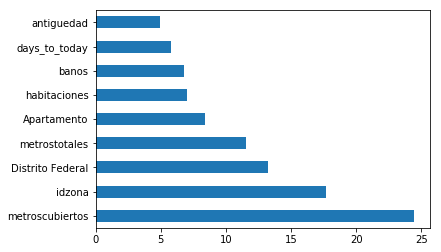

In [107]:
feat_importances = pd.Series(cb_model.best_estimator_.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')